In [103]:
# Import necessary libraries
import pandas as pd
import numpy as np


In [104]:
df = pd.read_csv("datasets/aircrahesFullDataUpdated_2024.csv")

In [105]:
df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
0,1970,Qtr 2,April,28,NaN,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952,Qtr 2,April,30,NaN,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973,Qtr 2,April,10,NaN,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000,Qtr 2,April,19,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12


In [106]:
print("Dataset Shape:", df.shape)

Dataset Shape: (5035, 12)


In [107]:
print("Columns:", df.columns.tolist())

Columns: ['Year', 'Quarter', 'Month', 'Day', 'Country/Region', 'Aircraft Manufacturer', 'Aircraft', 'Location', 'Operator', 'Ground', 'Fatalities (air)', 'Aboard']


In [108]:
df.isnull().sum()

Year                       0
Quarter                    0
Month                      0
Day                        0
Country/Region           230
Aircraft Manufacturer      0
Aircraft                   0
Location                   0
Operator                 234
Ground                     0
Fatalities (air)           0
Aboard                     0
dtype: int64

In [109]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,5035.0,NaN,NaN,NaN,1970.991063,24.814467,1908.0,1951.0,1970.0,1992.0,2024.0
Quarter,5035,4,Qtr 4,1368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,5035,12,December,497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day,5035.0,NaN,NaN,NaN,15.785104,8.794474,1.0,8.0,16.0,23.0,31.0
Country/Region,4805,527,Russia,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aircraft Manufacturer,5035,633,Douglas,994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aircraft,5035,3525,Boeing B 737,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5035,4170,Moscow Russia,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Operator,4801,2631,Aeroflot,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ground,5035.0,NaN,NaN,NaN,1.704469,55.105115,0.0,0.0,0.0,0.0,2750.0


In [110]:
df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
0,1970,Qtr 2,April,28,NaN,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952,Qtr 2,April,30,NaN,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973,Qtr 2,April,10,NaN,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000,Qtr 2,April,19,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12


In [111]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.head()


,year,quarter,month,day,country/region,aircraft_manufacturer,aircraft,location,operator,ground,fatalities_(air),aboard
0,1970,Qtr 2,April,28,NaN,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952,Qtr 2,April,30,NaN,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973,Qtr 2,April,10,NaN,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000,Qtr 2,April,19,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12


In [112]:
# Create proper datetime column
df["date"] = pd.to_datetime(
    df["day"].astype(str) + " " + df["month"].astype(str) + " " + df["year"].astype(str),
    errors="coerce"
)

In [113]:
# Add day_of_week
df["day_of_week"] = df["date"].dt.day_name()


In [114]:
# Check missing values
print(df.isna().sum())

year                       0
quarter                    0
month                      0
day                        0
country/region           230
aircraft_manufacturer      0
aircraft                   0
location                   0
operator                 234
ground                     0
fatalities_(air)           0
aboard                     0
date                       0
day_of_week                0
dtype: int64


In [115]:
# Fill numeric columns with median
for col in df.select_dtypes(include=["int64", "float64"]).columns:
    df[col] = df[col].fillna(df[col].median())

In [116]:
# Fill text columns with "Unknown"
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].fillna("Unknown")

In [117]:
text_cols = df.select_dtypes(include=["object"]).columns

for col in text_cols:
    df[col] = df[col].str.strip().str.title()   # Title case for readability


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   5035 non-null   int64         
 1   quarter                5035 non-null   object        
 2   month                  5035 non-null   object        
 3   day                    5035 non-null   int64         
 4   country/region         5035 non-null   object        
 5   aircraft_manufacturer  5035 non-null   object        
 6   aircraft               5035 non-null   object        
 7   location               5035 non-null   object        
 8   operator               5035 non-null   object        
 9   ground                 5035 non-null   int64         
 10  fatalities_(air)       5035 non-null   int64         
 11  aboard                 5035 non-null   int64         
 12  date                   5035 non-null   datetime64[ns]
 13  day

In [119]:
df.head(10)

,year,quarter,month,day,country/region,aircraft_manufacturer,aircraft,location,operator,ground,fatalities_(air),aboard,date,day_of_week
0,1970,Qtr 2,April,28,Unknown,De Havilland Canada,De Havilland Canada Dhc 6 Twin Otter 100Vh,Kainatu,Airlines Australia Guineatrans New,0,8,11,1970-04-28,Tuesday
1,1952,Qtr 2,April,30,Unknown,Douglas,Douglas Dc 3Vt,Delhi,Airways Indiadeccan,0,9,9,1952-04-30,Wednesday
2,1973,Qtr 2,April,10,Unknown,Vickers Vanguard,Vickers Vanguard 952G Axop,Near Basel,(Uk) Airlines International Switzerlandinvicta,0,108,145,1973-04-10,Tuesday
3,2000,Qtr 2,April,19,'-,Antonov,Antonov An 8Tl,Pepa -,Airlines Centrafricain,0,24,24,2000-04-19,Wednesday
4,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A Fz559,Pindi-Khut -,Force Air Royal,0,12,12,1946-04-30,Tuesday
5,1960,Qtr 2,April,14,'-,Douglas,Douglas Dc 4?,Taipei -,Force Air Thai Royal,0,18,18,1960-04-14,Thursday
6,2024,Qtr 2,April,23,Alaska,Douglas,Douglas C-54D Skymaster N3054V,Near Fairbanks,Alaska Air Fuel,0,2,2,2024-04-23,Tuesday
7,1958,Qtr 2,April,21,10,Douglas,Douglas Dc 7 / F,Near Sloan 10,Nevada Vegas Las Of Sw Miles United Air Lines / Military - U.S. Air Force,0,49,49,1958-04-21,Monday
8,1997,Qtr 2,April,23,Afghanistan,Antonov,Antonov An 26?,Near Konduz Afghanistan,Force Air Republican Afghan - Military,0,36,36,1997-04-23,Wednesday
9,1988,Qtr 2,April,10,Afghanistan,Antonov,Antonov An 26?,Near Mazâr-E Charif Afghanistan,Force Air Republican Afghan - Military,0,29,29,1988-04-10,Sunday


In [120]:
# Check unique aircraft manufacturers
print("Unique aircraft manufacturers:")
print(df['aircraft_manufacturer'].unique())
print(f"\nTotal unique manufacturers: {df['aircraft_manufacturer'].nunique()}")

Unique aircraft manufacturers:
['De Havilland Canada' 'Douglas' 'Vickers Vanguard' 'Antonov' 'Boeing'
 'Airbus' 'Aero Commander' 'Britten' 'Cessna' 'Cessna 208B Caravan'
 'Hughes' 'Mcdonnell Douglas' 'Pilgrim' 'Ilyushin' 'Cessna  208B Grand'
 'Hawker Siddeley' 'Hs' 'Avro' 'Lockheed 14'
 'Swearingen Sa227Ac Metroliner' 'Yakovlev' 'Curtiss' 'Mil' 'Convair'
 'Consolidated' 'Doublas' 'Embraer 110Ej Band./Embraer 110P' 'Learjet'
 'Namc' 'Embraer/Piper' 'Lockheed 18' 'Cams' 'Ford' 'Grumman' 'Lockheed'
 'De Havilland' 'Mi' 'Pilatus' 'Sikorsky' '??' 'Aérospatiale'
 'Bell 212Fac' 'Hadley Page 137Jetstream I / Cessna 206N11360 /'
 'Canadair' 'Bristol Britannia' 'Fokker' 'Junkers' 'Sud Aviation'
 'Vickers Viscount' 'Avro 685 York' 'Avro Shackleton' 'Vickers 610 Viking'
 'Bac Super' 'Aerocomp Comp Air' 'Fairchild' 'Farman' 'Dornier'
 'De Havilland  Canada' 'Aviation Traders' 'Embraer' 'Focke' 'Fokker Fg'
 'Messerschmitt' 'Vickers Viking 1B & Soviet' 'Hawker Siddeley Trident'
 'Pilatus Britten Norm

In [121]:
# 1) Peek at suspicious entries: anything with digits, slashes, or extra words
suspect = df['aircraft_manufacturer'].astype(str).str.contains(r'\d|/|\(|\)|\-|,', regex=True)
df.loc[suspect, 'aircraft_manufacturer'].head(30)

19                                 Cessna 208B Caravan
27                                  Cessna  208B Grand
33                                         Lockheed 14
34                       Swearingen Sa227Ac Metroliner
51                    Embraer 110Ej Band./Embraer 110P
54                                       Embraer/Piper
55                                         Lockheed 18
81                                         Bell 212Fac
95     Hadley Page 137Jetstream I / Cessna 206N11360 /
109                                      Avro 685 York
111                                 Vickers 610 Viking
137                         Vickers Viking 1B & Soviet
175                                        B17G Flying
176                           De Havilland Dh106 Comet
190                                        Lockheed 18
205                                      Caudron C.635
206                                           Bell 205
211                                        Lockheed 18
234       

In [122]:
# 2) Exact corrections (typos and obvious variants)
manufacturer_fix_exact = {
    # Douglas family
    'Doublas': 'Douglas',
    'Douglass': 'Douglas',
    'Dc': 'Douglas',
    'Douglas Dc': 'Douglas',

    # de Havilland (handle Canada separately below)
    'Dehavilland': 'De Havilland',
    'De Havilland  Canada': 'De Havilland Canada',
    'De Hav Can.': 'De Havilland Canada',
    'De Havilland Dhc': 'De Havilland Canada',
    'Dhc': 'De Havilland Canada',

    # McDonnell Douglas
    'Mcdonnel': 'McDonnell Douglas',
    'Mcdonnell': 'McDonnell Douglas',
    'Mc Donnell Douglas': 'McDonnell Douglas',
    'Mc Donnell Dougals': 'McDonnell Douglas',
    'Md Douglas': 'McDonnell Douglas',
    'Md': 'McDonnell Douglas',
    'Md Douglas 369Ff': 'McDonnell Douglas',

    # Lockheed
    'Lockhed 10': 'Lockheed',
    'Lockheed  5': 'Lockheed',
    'Lockheed  188A': 'Lockheed',
    'Lockheed 10A': 'Lockheed',
    'Lockheed 10B': 'Lockheed',
    'Lockheed 10': 'Lockheed',
    'Lockheed 14': 'Lockheed',
    'Lockheed 14H Super': 'Lockheed',
    'Lockheed 1049G Super': 'Lockheed',
    'Lockheed 1049E Super': 'Lockheed',
    'Lockheed 1049H Super': 'Lockheed',
    'Lockheed 1329 Jetstar': 'Lockheed',
    'Lockheed 1649A': 'Lockheed',
    'Lockheed 188A': 'Lockheed',
    'Lockheed L 1049G Super': 'Lockheed',
    'Lockheed L188A': 'Lockheed',
    'Lockheed Hercules': 'Lockheed',
    'Lockheed 049': 'Lockheed',
    'Lockheed Orion': 'Lockheed',
    'Lockheed Orion 9E Explorer Float': 'Lockheed',
    'Lockheed Vega': 'Lockheed',
    'Lockheed 5': 'Lockheed',
    'Lockheed Hudson': 'Lockheed',
    'Lockheed Martin': 'Lockheed',

    # Boeing / Boeing Vertol
    'Boeing 377 Stratocruiser': 'Boeing',
    'Boeing 307': 'Boeing',
    'Boeing 307 Stratoliner': 'Boeing',
    'Boeing  377': 'Boeing',
    'Boeing 40': 'Boeing',
    'Boeing 737 Max': 'Boeing',
    'Boeing Vertol': 'Boeing Vertol',
    'Boeing Vetrol 107 Ii': 'Boeing Vertol',
    'Boeing Vertol Ch47A': 'Boeing Vertol',
    'Boeing Vertol Ch47B': 'Boeing Vertol',
    'Boeing Vertol Ch47C': 'Boeing Vertol',
    'Boeing Ch47A': 'Boeing Vertol',

    # Aerospatiale / Eurocopter / Airbus Helicopters lineage
    'Aérospatiale': 'Aerospatiale',
    'Aerospatiale As350 Eurocopter': 'Aerospatiale',
    'Aerospatiale As 332L1 Super': 'Aerospatiale',
    'Aerospatiale 330G': 'Aerospatiale',
    'Aerospatiale 330J': 'Aerospatiale',
    'Aerospatiale Bae Concorde': 'Aerospatiale',
    'Aerospatiale Caravelle': 'Aerospatiale',
    'Aerospatiale Caravelle Super': 'Aerospatiale',
    'Aerospatiale As350Ba': 'Aerospatiale',
    'Eurocopter  As332L2 Super': 'Eurocopter',
    'Eurocopter As 332L2 Super Puma': 'Eurocopter',
    'Eurocopter As350D': 'Eurocopter',
    'Eurocopter As': 'Eurocopter',
    'Eurocopter Ec225Lp Super Puma M2+': 'Eurocopter',
    'Eurocopter Ec': 'Eurocopter',
    'Eurocopter Deutschland': 'Eurocopter',

    # British Aerospace / BAC
    'British Aerospace Bae': 'British Aerospace',
    'British Aerospace  Bae Jetstream': 'British Aerospace',
    'Bae': 'British Aerospace',
    'Bae Avro': 'British Aerospace',
    'Bae Jetstream': 'British Aerospace',
    'Bae 3101 Jetstream': 'British Aerospace',
    'Bac One Eleven': 'BAC',
    'Bac One': 'BAC',
    'Bac Super': 'BAC',
    'Bac': 'BAC',

    # Hawker Siddeley / HS
    'Hs': 'Hawker Siddeley',
    'Hawker Siddeley Hs': 'Hawker Siddeley',
    'Hawker Siddeley Trident': 'Hawker Siddeley',
    'Hawker Siddeley Trident 2E /': 'Hawker Siddeley',

    # Handley Page
    'Handley Page Dart Herald': 'Handley Page',
    'Handley Page Hastings C Mark': 'Handley Page',
    'Handley Page Hastings': 'Handley Page',
    'Handley Page Jetstream': 'Handley Page',

    # Vickers
    'Vickers Vanguard': 'Vickers',
    'Vickers Viscount': 'Vickers',
    'Vickers 610 Viking': 'Vickers',
    'Vickers Viking 1B & Soviet': 'Vickers',
    'Vickers Valetta': 'Vickers',
    'Vickers 615 Viking': 'Vickers',
    'Vickers Viscount 827 / Fokker': 'Vickers',
    'Vickers 604 Viking': 'Vickers',
    'Vickers 614 Viking': 'Vickers',
    'Vickers 616 Viking': 'Vickers',
    'Vickers 620 Viking': 'Vickers',
    'Vickers 628 Viking': 'Vickers',
    'Vickers 639 Viking': 'Vickers',
    'Vickers 708': 'Vickers',
    'Vickers 720': 'Vickers',
    'Vickers 757': 'Vickers',
    'Vickers 785D': 'Vickers',
    'Vickers 798D': 'Vickers',
    'Vickers 804': 'Vickers',
    'Vickers 813': 'Vickers',
    'Vickers 815': 'Vickers',
    'Vickers Valetta Mk1 / Avero Lancastervx562 /': 'Vickers',

    # Avro
    'Avro 685 York': 'Avro',
    'Avro 688 Super': 'Avro',
    'Avro 688 Tudor': 'Avro',
    'Avro 689 Tudor': 'Avro',
    'Avro Lancaster': 'Avro',
    'Avro 691': 'Avro',
    'Avro 691 Lancastrian': 'Avro',
    'Avro 691 Lancastrian (Flying': 'Avro',
    'Avro  685 York': 'Avro',
    'Avro Shackleton': 'Avro',
    'Avro Ninteen': 'Avro',

    # Short / Shorts
    'Short': 'Shorts',
    'Shorts': 'Shorts',
    'Short Stirling': 'Shorts',
    'Short Sunderland': 'Shorts',
    'Short Sunderland 9 (Flying': 'Shorts',
    'Short Sandringham (Flying': 'Shorts',
    'Short Sandringham 5 (Flying': 'Shorts',
    'Short Sandringham 2 (Flying': 'Shorts',
    'Short Sandringham 6 (Flying': 'Shorts',
    'Short Calcutta (Flying': 'Shorts',
    'Short Solent 3 (Flying': 'Shorts',
    'Short S23 ‘C’ Class Flying': 'Shorts',
    'Short S.23 Empire Flying': 'Shorts',
    'Shorts Sc.7 Skyvan': 'Shorts',

    # Fokker
    'Fokker Fg': 'Fokker',
    'Fokker (Klm)': 'Fokker',
    'Fokker 27 Friendship': 'Fokker',
    'Fokker 28 Fellowship': 'Fokker',
    'Fokker Universal': 'Fokker',
    'Fokker Universalnc52': 'Fokker',
    'Fokker Super': 'Fokker',
    'Vickers Viscount 745D /': 'Fokker',  # mixed entry → choose one

    # Cessna
    'Cessna  208B Grand': 'Cessna',
    'Cessna 208B Caravan': 'Cessna',
    'Cessna 208B Caravan I Super': 'Cessna',
    'Cessna 208 Grand': 'Cessna',
    'Cessna 208': 'Cessna',
    'Cessna 208 Caravan': 'Cessna',
    'Cessna 208A Caravan I': 'Cessna',
    'Cessna  501': 'Cessna',
    'Cessna 501': 'Cessna',
    'Cessna 402C': 'Cessna',
    'Cessna 402 / Piper': 'Cessna',
    'Cessna 404': 'Cessna',
    'Cessna 404 Titan': 'Cessna',
    'Cessna 404 Titan Courier': 'Cessna',
    'Cessna 421 Golden': 'Cessna',
    'Cessna 421C Golden': 'Cessna',
    'Cessna 441': 'Cessna',
    'Cessna 441 Conquest': 'Cessna',
    'Cessna 560 Citation': 'Cessna',
    'Cessna 207 / Cessna': 'Cessna',
    'Cessna 550 Citation': 'Cessna',

    # Beech / Beechcraft
    'Beech': 'Beechcraft',
    'Beech King Air': 'Beechcraft',
    'Beech King Air 200': 'Beechcraft',
    'Beech 200 Super King': 'Beechcraft',
    'Beechcraft B200 Super King': 'Beechcraft',
    'Beechcraft B300 King': 'Beechcraft',
    'Beechcraft B300 King Air': 'Beechcraft',
    'Beechcraft C99 / Rockwell': 'Beechcraft',
    'Beechcraft Queen Air': 'Beechcraft',
    'Beech Queen Air': 'Beechcraft',
    'Beechcraft 100 King': 'Beechcraft',
    'Beechcraft Bonanza': 'Beechcraft',
    'Beechcraft Ska': 'Beechcraft',

    # Piper
    'Piper Navajo': 'Piper',
    'Piper Aerostar 601 / Bell 412Spn3645D /': 'Piper',

    # Swearingen
    'Swearingen': 'Swearingen',
    'Swearingen Sa227Ac Metroliner': 'Swearingen',
    'Swearingen Sa.227Ac Metro': 'Swearingen',
    'Swearingen Sa.226Tc Metro': 'Swearingen',
    'Swearingen Sa227At Merlin': 'Swearingen',
    'Swearingen 226Tc Metro': 'Swearingen',
    'Swear.': 'Swearingen',

    # Britten-Norman
    'Britten': 'Britten-Norman',
    'Britten Norman': 'Britten-Norman',
    'Britten Norman Bn': 'Britten-Norman',
    'Pilatus Britten Norman': 'Britten-Norman',
    'Norman': 'Britten-Norman',

    # CASA
    'Casa': 'CASA',
    'Casa 352': 'CASA',
    'Casa 212': 'CASA',
    'Casa 212 Aviocar': 'CASA',

    # Dornier
    'Dormier': 'Dornier',

    # Junkers
    'Curtis': 'Curtiss',
    'Curtiss C': 'Curtiss',
    'Curtiss Wright': 'Curtiss-Wright',

    # Ilyushin
    'Ilushin': 'Ilyushin',
    'Iluyshin': 'Ilyushin',
    'Illyushin': 'Ilyushin',
    'Ilysushin': 'Ilyushin',
    'Ilyushin 14M': 'Ilyushin',
    'Ilyushin Il': 'Ilyushin',
    'Ilyushin76Td4K': 'Ilyushin',

    # Antonov / Lisunov / Tupolev / Yakovlev / Mil / MiG
    'Antonow': 'Antonov',
    'Antonv': 'Antonov',
    'Antonov An': 'Antonov',
    'Lisnov': 'Lisunov',
    'Tupelov': 'Tupolev',
    'Tuolev': 'Tupolev',
    'Tupolev A.N.T.': 'Tupolev',
    'Mi': 'Mil',
    'Mig': 'Mikoyan-Gurevich',

    # LET
    'Let': 'LET',
    'Let 410Uvp': 'LET',
    'Let 410Mt': 'LET',
    'Let  410M': 'LET',
    'Let 410': 'LET',
    'Let 410M': 'LET',
    'Let 410Uvp Turbojet / Tupolev': 'LET',
    'Let Aero': 'LET',

    # BAe/Avro/others we standardize
    'Avro 683': 'Avro',
    'Bae Avro': 'British Aerospace',

    # Sikorsky
    'Sirkorsky': 'Sikorsky',
    'Sikorksky': 'Sikorsky',
    'Sikorsly': 'Sikorsky',
    'Sikorsky  S 76': 'Sikorsky',
    'Sikorsky S': 'Sikorsky',
    'Sikorsky Ch53D / Sikorsky Ch53D357 /': 'Sikorsky',
    'Ch53E Sea': 'Sikorsky',

    # Others
    'Reims Aviation': 'Reims',
    'Rockwell International': 'Rockwell',
    'Rockwell Gulfstream Jetprop 840': 'Rockwell',
    'Rockwell 500S Shrike': 'Rockwell',
    'Grummand': 'Grumman',
    'Zepplin': 'Zeppelin',
    'Aviation Traders': 'Aviation Traders',
    'British Aerospace 3101 Jetstream': 'British Aerospace',
}
df['aircraft_manufacturer'] = df['aircraft_manufacturer'].replace(manufacturer_fix_exact)


In [123]:
import re

def canonicalize_manufacturer(x: str) -> str:
    s = str(x).strip()

    # 1) de Havilland vs de Havilland Canada
    if re.search(r'havilland', s, flags=re.I):
        if re.search(r'canada|dhc|twin otter|d[h\.]?\s?c', s, flags=re.I):
            return 'De Havilland Canada'
        return 'De Havilland'

    # 2) British Aerospace / BAe
    if re.search(r'\b(ba[e]?)\b|british aerospace', s, flags=re.I):
        return 'British Aerospace'

    # 3) BAC
    if re.search(r'\b(bac)\b|one eleven', s, flags=re.I):
        return 'BAC'

    # 4) Aerospatiale / Eurocopter
    if re.search(r'aero ?spatiale', s, flags=re.I):
        return 'Aerospatiale'
    if re.search(r'eurocopter', s, flags=re.I):
        return 'Eurocopter'

    # 5) Boeing Vertol (helicopter division)
    if re.search(r'boeing vertol|ch-?47', s, flags=re.I):
        return 'Boeing Vertol'
    if re.search(r'boeing', s, flags=re.I):
        return 'Boeing'

    # 6) Lockheed
    if re.search(r'lockheed', s, flags=re.I):
        return 'Lockheed'

    # 7) Vickers / Avro / Handley Page / Shorts / Hawker Siddeley
    if re.search(r'\bvickers\b', s, flags=re.I): return 'Vickers'
    if re.search(r'\bavro\b', s, flags=re.I): return 'Avro'
    if re.search(r'handley page', s, flags=re.I): return 'Handley Page'
    if re.search(r'\bshort(s)?\b|sunderland|solent|empire flying|sandringham', s, flags=re.I): return 'Shorts'
    if re.search(r'hawker siddeley|^\bhs\b', s, flags=re.I): return 'Hawker Siddeley'
    if re.search(r'\bhawker\b', s, flags=re.I): return 'Hawker'

    # 8) Cessna / Beechcraft / Piper / Learjet
    if re.search(r'cessna', s, flags=re.I): return 'Cessna'
    if re.search(r'beech', s, flags=re.I): return 'Beechcraft'
    if re.search(r'\bpiper\b', s, flags=re.I): return 'Piper'
    if re.search(r'lear\s?jet|gates learjet', s, flags=re.I): return 'Learjet'

    # 9) Russian design bureaus
    if re.search(r'ilyushin|il[yui]ushin', s, flags=re.I): return 'Ilyushin'
    if re.search(r'tupolev|tu\b', s, flags=re.I): return 'Tupolev'
    if re.search(r'yakovlev', s, flags=re.I): return 'Yakovlev'
    if re.search(r'lisunov|lisnov', s, flags=re.I): return 'Lisunov'
    if re.search(r'\bmil\b|\bmi\b', s, flags=re.I): return 'Mil'
    if re.search(r'mig|mikoyan', s, flags=re.I): return 'Mikoyan-Gurevich'
    if re.search(r'antonov', s, flags=re.I): return 'Antonov'

    # 10) European/other
    if re.search(r'fokker', s, flags=re.I): return 'Fokker'
    if re.search(r'dornier|dornier', s, flags=re.I): return 'Dornier'
    if re.search(r'dassault', s, flags=re.I): return 'Dassault'
    if re.search(r'saab', s, flags=re.I): return 'Saab'
    if re.search(r'pilatus', s, flags=re.I): return 'Pilatus'
    if re.search(r'mitsubishi', s, flags=re.I): return 'Mitsubishi'
    if re.search(r'fairchild', s, flags=re.I): return 'Fairchild'
    if re.search(r'swearingen', s, flags=re.I): return 'Swearingen'
    if re.search(r'grumman', s, flags=re.I): return 'Grumman'
    if re.search(r'rockwell', s, flags=re.I): return 'Rockwell'
    if re.search(r'canadair', s, flags=re.I): return 'Canadair'
    if re.search(r'british aerospace', s, flags=re.I): return 'British Aerospace'
    if re.search(r'aero\s?commander', s, flags=re.I): return 'Aero Commander'
    if re.search(r'harbin', s, flags=re.I): return 'Harbin'
    if re.search(r'xian', s, flags=re.I): return 'Xian'
    if re.search(r'shaanxi', s, flags=re.I): return 'Shaanxi'
    if re.search(r'namc', s, flags=re.I): return 'NAMC'
    if re.search(r'cas[ao]\b', s, flags=re.I): return 'CASA'
    if re.search(r'latecoe?re', s, flags=re.I): return 'Latecoere'
    if re.search(r'bleriot|blériot', s, flags=re.I): return 'Bleriot'

    # 11) Helicopters
    if re.search(r'sikorsky|sikorksky|sirkorsky|sikorsly', s, flags=re.I): return 'Sikorsky'
    if re.search(r'bell', s, flags=re.I): return 'Bell'
    if re.search(r'westland', s, flags=re.I): return 'Westland'

    # 12) If nothing matched, keep as-is
    return s

# Apply rule-based canonicalization
df['aircraft_manufacturer_std'] = df['aircraft_manufacturer'].apply(canonicalize_manufacturer)


In [124]:
# How many unique values reduced to how many?
print("Before:", df['aircraft_manufacturer'].nunique(),
      "→ After:", df['aircraft_manufacturer_std'].nunique())

# Show mappings that actually changed
changed = df.loc[df['aircraft_manufacturer'] != df['aircraft_manufacturer_std'],
                 ['aircraft_manufacturer','aircraft_manufacturer_std']]
changed.sample(20)


Before: 413 → After: 302


,aircraft_manufacturer,aircraft_manufacturer_std
4742,Lockheed 749A,Lockheed
2260,Beechcraft 1900D / Cessna,Cessna
2410,Fairchild Packet (C119 Flying,Fairchild
3223,De Havilland Dh106 Comet,De Havilland
3135,Fokker F10A,Fokker
384,De Havilland Dh.80 Puss,De Havilland
969,Lockheed 18,Lockheed
1636,Vickers Viscount 754D / Douglas,Vickers
2768,Harbin Yunshuji,Harbin
2615,Lockheed 10C,Lockheed


In [125]:
df['aircraft_manufacturer'] = df['aircraft_manufacturer_std']
df.drop(columns=['aircraft_manufacturer_std'], inplace=True)


In [126]:
# Check unique countries/regions
print("Unique countries/regions:")
print(df['country/region'].unique())
print(f"\nTotal unique countries/regions: {df['country/region'].nunique()}")

# Show top 20 most common countries/regions
print("\nTop 20 countries/regions by frequency:")
print(df['country/region'].value_counts().head(20))


Unique countries/regions:
['Unknown' "'-" 'Alaska' '10' 'Afghanistan' 'Aichi' 'Algeria' 'Angola'
 'Argentina' 'Australia' 'Azerbaijan' 'Bahamas' 'Bali' 'Belgian' 'Black'
 'Bolivia' 'Botswana' 'Brazil' 'Brazil\tAmazonaves' 'British' 'Calabria'
 'California' 'Cameroon' 'Cameroons' 'Canada' 'Canary' 'Channel'
 'Chechnya' 'Chile' 'China' 'China?' 'Colombia' 'Colorado' 'Congo'
 'Croatia' 'Cyprus' 'Democratic' 'East' 'Ecuador' 'England' 'Equatorial'
 'Estonia' 'Ethiopia' 'Finland' 'Florida' 'France' 'French' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Greenland' 'Guangxi' 'Guatemala'
 'Guyana' 'Hawaii' 'Honduras' 'Hong' 'Idaho' 'India' 'India\tPawan'
 'Indiana' 'Indonesia' 'Iowa' 'Iran' 'Iraq' 'Ireland' 'Isle' 'Italy'
 'Jamaica' 'Japan' 'Jordan' 'Kansas' 'Kenya' 'Laos' 'Libya' 'London'
 'Madagascar' 'Malta' 'Mexico' 'Michigan' 'Moldova' 'Mongolia' 'Morocco'
 'Near' 'Netherlands' 'Nevada' 'New' 'Newfoundland' 'Nicaragua' 'Niger'
 'Nigeria' 'North' 'Northern' 'Norway' 'Norway\tChc' 'Nyus' 

In [127]:
# base text cleanup
col = 'country/region'
df[col] = (
    df[col].astype(str)
           .str.strip()
           .str.replace(r'["\']', '', regex=True)
           .str.replace(r'\s+', ' ', regex=True)
           .str.replace(r'\?$', '', regex=True)   # trailing '?'
           .str.replace(r'^\W+$', 'Unknown', regex=True)  # rows that are only punctuation
)


In [128]:
country_fix_exact = {
    # placeholders / junk tokens
    "'-": "Unknown", "-": "Unknown", "10": "Unknown", "100": "Unknown", "110": "Unknown",
    "116": "Unknown", "18": "Unknown", "325": "Unknown", "570": "Unknown",
    "Air": "Unknown", "Airlines": "Unknown", "Cargo": "Unknown", "Central": "Unknown",
    "Republic": "Unknown", "The": "Unknown",

    # obvious partials → full region/country
    "Black": "Black Sea",
    "Canary": "Canary Islands",
    "Channel": "Channel Islands",
    "French": "France",
    "British": "United Kingdom",

    # USSR variants (keep historical label; you can later collapse to Russia if desired)
    "Ussraeroflot": "Soviet Union",
    "Ussraerflot": "Soviet Union",
    "Ussrbalkan": "Soviet Union",
    "Ussrmilitary": "Soviet Union",
    "Soviet": "Soviet Union",

    # DRC / Congo family
    "Democratic": "Democratic Republic of Congo",
    "Zaire": "Democratic Republic of Congo",
    # If plain "Congo" appears, assume Republic of the Congo (not DRC)
    "Congo": "Republic of the Congo",

    # UK parts to UK (exact labels)
    "England": "United Kingdom",
    "Scotland": "United Kingdom",
    "Wales": "United Kingdom",
    "Northern Ireland": "United Kingdom",
    "Islay": "United Kingdom",
    "London": "United Kingdom",
    "Ayrshire": "United Kingdom",
    "Surrey": "United Kingdom",
    "Middlesex": "United Kingdom",
    "Sussex": "United Kingdom",
    "Stirlingshire": "United Kingdom",
    "Cardiff": "United Kingdom",
    "Guernsey": "United Kingdom",
    "Jersey": "United Kingdom",
    "Lochgoilhead": "United Kingdom",

    # Canada provinces/territories
    "Alberta": "Canada",
    "Ontario": "Canada",
    "Quebec": "Canada",
    "Manitoba": "Canada",
    "Saskatchewan": "Canada",
    "Nunavut": "Canada",
    "Newfoundland": "Canada",
    "Nwt": "Canada",
    "Nwt Canada": "Canada",
    "Qc": "Canada",

    # US states/territories (unambiguous)
    "Alaska": "United States",
    "Hawaii": "United States",
    "Arizona": "United States",
    "Alabama": "United States",
    "Arkansas": "United States",
    "California": "United States",
    "California?": "United States",
    "Colorado": "United States",
    "Connecticut": "United States",
    "Delaware": "United States",
    "Florida": "United States",
    "Florida?": "United States",
    "Idaho": "United States",
    "Illinois": "United States",
    "Indiana": "United States",
    "Iowa": "United States",
    "Kansas": "United States",
    "Kentucky": "United States",
    "Louisiana": "United States",
    "Maine": "United States",
    "Maryland": "United States",
    "Massachusetts": "United States",
    "Michigan": "United States",
    "Minnesota": "United States",
    "Mississippi": "United States",
    "Missouri": "United States",
    "Montana": "United States",
    "Nebraska": "United States",
    "Nevada": "United States",
    "New": "United States",   # appears as truncated label
    "Newfoundlandu.S.": "United States",  # messy text, safest collapse to US
    "New York": "United States",
    "Northwest": "United States",  # dataset artifact; safer to US
    "Ohio": "United States",
    "Oklahoma": "United States",
    "Oregon": "United States",
    "Pennsylvania": "United States",
    "Rhode": "United States",  # Rhode Island truncated
    "Tennessee": "United States",
    "Tennesee": "United States",
    "Texas": "United States",
    "Utah": "United States",
    "Vermont": "United States",
    "Virginia": "United States",
    "Washington": "United States",
    "Wisconsin": "United States",
    "Wyoming": "United States",
    "Kodiak": "United States",
    "Miami": "United States",
    "Boston": "United States",
    "Covington": "United States",
    "Covington/Hebron": "United States",
    "Wa": "United States",
    "Fl": "United States",
    "Us": "United States",
    "U.S.": "United States",
    "US": "United States",
    "Nyus": "United States",
    "Wyus": "United States",
    "Washingon": "United States",

    # Australia states/abbrevs
    "Queensland": "Australia",
    "Qld": "Australia",
    "Qld.": "Australia",
    "Victoria": "Australia",
    "Tasmania": "Australia",
    "Nsw": "Australia",

    # Spain provinces/regions
    "Vizcaya": "Spain",
    "Gerona": "Spain",
    "Spain\r\n\t\r\nMoron": "Spain",
    "Catalina": "United States",  # Santa Catalina Island, CA

    # Italy regions
    "Calabria": "Italy",
    "Sicily": "Italy",
    "Sardinia": "Italy",
    "Trento": "Italy",
    "Lombardia": "Italy",

    # France departments/regions/territories
    "Corsica": "France",
    "Ariège": "France",
    "Val-De-Marne": "France",

    # Portugal territories
    "Azores": "Portugal",

    # China provinces/autonomous regions
    "Guangxi": "China",
    "Sichuan": "China",
    "Jiangsu": "China",
    "Yunan": "China",  # Yunnan
    "China?": "China",
    "Hong": "Hong Kong",

    # Japan prefectures / islands
    "Aichi": "Japan",
    "Okinawa": "Japan",

    # Indonesia islands/regions
    "Bali": "Indonesia",
    "Lombok": "Indonesia",
    "Sumatra": "Indonesia",
    "Indonesia\r\n\t\r\nSarmi": "Indonesia",

    # Taiwan
    "Miao-Li": "Taiwan",

    # Balkans / historical
    "Yugosalvia": "Yugoslavia",

    # Africa specific fixes
    "Ivory": "Ivory Coast",
    "Rhodesia": "Zimbabwe",
    "Mauretania": "Mauritania",
    "Democtratic": "Democratic Republic of Congo",
    "Morroco": "Morocco",
    "Guinea": "Guinea",  # keep as is (not Guinea-Bissau)
    "Benin": "Benin",
    "Biafra": "Nigeria",  # historical secession; collapse to Nigeria
    "Tanganyika": "Tanzania",

    # Middle East / Asia typos
    "Kazakastan": "Kazakhstan",
    "Uzbekstan": "Uzbekistan",
    "Kirghizia": "Kyrgyzstan",
    "Afghanstan": "Afghanistan",
    "Bhutan": "Bhutan",
    "Phillipines": "Philippines",
    "Philipines": "Philippines",
    "Philipine": "Philippines",

    # Americas misc
    "Dominican": "Dominican Republic",
    "Domincan": "Dominican Republic",
    "Puerto": "Puerto Rico",
    "Curacao": "Curaçao",
    "Providencia": "Colombia",
    "Cundinamarca": "Colombia",
    "Huila": "Colombia",
    "Valle": "Colombia",
    "Huanuco": "Peru",
    "Veracruz": "Mexico",
    "Margarita": "Venezuela",
    "Zulia": "Venezuela",
    "Rio": "Brazil",

    # Europe misc typos
    "Bulgeria": "Bulgaria",
    "Bugaria": "Bulgaria",
    "Hungary?": "Hungary",
    "Czech": "Czech Republic",
    "Dutch": "Netherlands",

    # Island territories (keep distinct)
    "Bermuda": "Bermuda",
    "Guadeloupe": "Guadeloupe",
    "Martinique": "Martinique",
    "Reunion": "Reunion",
    "Tahiti": "French Polynesia",
}

df['country/region'] = df['country/region'].replace(country_fix_exact)


In [129]:
US_STATES = {
    'alabama','alaska','arizona','arkansas','california','colorado','connecticut','delaware',
    'florida','hawaii','idaho','illinois','indiana','iowa','kansas','kentucky','louisiana',
    'maine','maryland','massachusetts','michigan','minnesota','mississippi','missouri',
    'montana','nebraska','nevada','new hampshire','new jersey','new mexico','new york',
    'north carolina','north dakota','ohio','oklahoma','oregon','pennsylvania','rhode island',
    'south carolina','south dakota','tennessee','texas','utah','vermont','virginia',
    'washington','west virginia','wisconsin','wyoming',
    # big cities often used alone
    'miami','boston','chicago','los', 'kodiak', 'washington', 'covington', 'prov.'  # last is dirty, will map to US
}

CANADA_PROVINCES = {
    'alberta','british columbia','manitoba','new brunswick','newfoundland','newfoundland and labrador',
    'nova scotia','nunavut','ontario','prince edward island','quebec','saskatchewan','yukon','nwt'
}

UK_SUBDIVISIONS = {
    'england','scotland','wales','northern ireland','ayrshire','surrey','middlesex','sussex',
    'stirlingshire','islay','london','buckinghamshire','argyll','warks','loire'  # loire is FR but appears in list; handled above
}

AU_STATES = {'new south wales','nsw','queensland','qld','victoria','tasmania','western australia','south australia','northern territory'}

COUNTRY_BY_KEYWORD = [
    # (keywords set, mapped country)
    (US_STATES, "United States"),
    (CANADA_PROVINCES, "Canada"),
    (UK_SUBDIVISIONS, "United Kingdom"),
    (AU_STATES, "Australia"),
]

AMBIGUOUS = {'georgia','victoria','york','virgin','san','new','north','south','west','east','upper','lower'}

def collapse_region_to_country(x: str) -> str:
    s = str(x).strip()
    s_low = s.lower()

    # skip unknowns / already clean countries / ambiguous single words
    if s_low in {'unknown','soviet union'} or s_low in AMBIGUOUS:
        return s

    # apply keyword buckets
    for keys, country in COUNTRY_BY_KEYWORD:
        if s_low in keys:
            return country

    # Specific safe keyword contains
    if s_low in {'canary islands','channel islands','black sea','puerto rico','guam','bermuda','reunion','martinique','guadeloupe','french polynesia'}:
        return s.title()

    return s.title()

df['country_region_std'] = df['country/region'].apply(collapse_region_to_country)


In [130]:
print("Before unique:", df['country/region'].nunique(),
      "→ After:", df['country_region_std'].nunique())

changed = df.loc[df['country/region'].str.title() != df['country_region_std'],
                 ['country/region','country_region_std']].drop_duplicates()

print("\nSample of changes:")
print(changed.head(30))


Before unique: 365 → After: 357

Sample of changes:
       country/region country_region_std
888           Chicago      United States
1490              Los      United States
1651            Warks     United Kingdom
2126            Yukon             Canada
3629            Prov.      United States
4351            Loire     United Kingdom
4620           Argyll     United Kingdom
4662  Buckinghamshire     United Kingdom


In [131]:
df['country/region'] = df['country_region_std']
df.drop(columns=['country_region_std'], inplace=True)

# Optional: also keep a pure 'country' alias for downstream grouping
df.rename(columns={'country/region': 'country'}, inplace=True)

print("Final countries unique:", df['country'].nunique())
df['country'].value_counts().head(20)


Final countries unique: 357


country
United States     978
Unknown           255
Russia            249
Brazil            165
Colombia          150
United Kingdom    135
France            129
Canada            100
India              96
South              92
Indonesia          91
China              90
Italy              82
Mexico             80
Germany            77
Philippines        71
Australia          62
Spain              55
Venezuela          53
Peru               52
Name: count, dtype: int64

In [132]:
# Allow pandas to display all values without truncation
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)

# Check unique locations
print("Unique locations:")
print(df['location'].unique())
print(f"\nTotal unique locations: {df['location'].nunique()}")

# Show top 50 most common locations
print("\nTop 1000 locations by frequency:")
print(df['location'].value_counts().head(20))


Unique locations:
['Kainatu' 'Delhi' 'Near Basel' ... 'Near The Kwango River Zaire'
 'Kindu Zaire' 'Ndola Zambia']

Total unique locations: 4170

Top 1000 locations by frequency:
location
Moscow Russia            16
Manila Philippines       15
New York New             15
Sao Paulo Brazil         13
Cairo Egypt              13
Bogota Colombia          12
Rio De Janeiro Brazil    12
Near Moscow Russia       11
Chicago Illinois         11
Tehran Iran              10
Ankara Turkey             8
London England            8
Rome Italy                8
Denver Colorado           8
Cleveland Ohio            7
Burbank California        7
Paris France              7
Karachi Pakistan          7
Anchorage Alaska          7
Taipei Taiwan             7
Name: count, dtype: int64


In [133]:


# Function to split Location into City and Region
def split_location(loc):
    if not isinstance(loc, str):  # Handle NaN or non-string
        return {'city': None, 'region': None}
    
    # Split on spaces and take the last part as Region, rest as City
    parts = loc.strip().split()
    if len(parts) > 1:
        # Check for common prefixes like "Near" or "Off"
        if parts[0].lower() in ['near', 'off', 'in']:
            city = ' '.join(parts[1:-1]) or parts[1]
            region = parts[-1]
        else:
            city = ' '.join(parts[:-1])
            region = parts[-1]
    else:
        city = loc
        region = None
    return {'city': city, 'region': region}

# Apply the split
split_df = df['location'].apply(split_location).apply(pd.Series)

# Add City and Region to the original DataFrame
df = pd.concat([df, split_df], axis=1)



In [134]:
print(df[['location', 'city', 'region']].head(20))

                           location             city       region
0                           Kainatu          Kainatu         None
1                             Delhi            Delhi         None
2                        Near Basel            Basel        Basel
3                           Pepa  -             Pepa            -
4                     Pindi-Khut  -       Pindi-Khut            -
5                          Taipei -           Taipei            -
6                    Near Fairbanks        Fairbanks    Fairbanks
7                     Near Sloan 10            Sloan           10
8           Near Konduz Afghanistan           Konduz  Afghanistan
9   Near Mazâr-E Charif Afghanistan   Mazâr-E Charif  Afghanistan
10           Near Kholm Afghanistan            Kholm  Afghanistan
11          Lashkar Gah Afghanistan      Lashkar Gah  Afghanistan
12      Bagram Air Base Afghanistan  Bagram Air Base  Afghanistan
13              Bamiyan Afghanistan          Bamiyan  Afghanistan
14        

In [135]:
# Drop the original Location column
df = df.drop('location', axis=1)

In [136]:
print(df[[ 'city', 'region']].head(100))

                     city       region
0                 Kainatu         None
1                   Delhi         None
2                   Basel        Basel
3                    Pepa            -
4              Pindi-Khut            -
5                  Taipei            -
6               Fairbanks    Fairbanks
7                   Sloan           10
8                  Konduz  Afghanistan
9          Mazâr-E Charif  Afghanistan
10                  Kholm  Afghanistan
11            Lashkar Gah  Afghanistan
12        Bagram Air Base  Afghanistan
13                Bamiyan  Afghanistan
14                 Komaki        Aichi
15            Skilak Lake       Alaska
16              Ketchikan       Alaska
17                Selawik       Alaska
18                   Elim       Alaska
19             Wainwright       Alaska
20                 Tanana       Alaska
21     950 Nm S Of Shemya       Alaska
22                   Nome       Alaska
23                Algiers      Algeria
24            Tamanrasset

In [137]:
# Show results
print("Cleaned City and Region columns:")
print(df[['city', 'region']].head(100))

Cleaned City and Region columns:
                     city       region
0                 Kainatu         None
1                   Delhi         None
2                   Basel        Basel
3                    Pepa            -
4              Pindi-Khut            -
5                  Taipei            -
6               Fairbanks    Fairbanks
7                   Sloan           10
8                  Konduz  Afghanistan
9          Mazâr-E Charif  Afghanistan
10                  Kholm  Afghanistan
11            Lashkar Gah  Afghanistan
12        Bagram Air Base  Afghanistan
13                Bamiyan  Afghanistan
14                 Komaki        Aichi
15            Skilak Lake       Alaska
16              Ketchikan       Alaska
17                Selawik       Alaska
18                   Elim       Alaska
19             Wainwright       Alaska
20                 Tanana       Alaska
21     950 Nm S Of Shemya       Alaska
22                   Nome       Alaska
23                Algiers      

In [138]:

# Comprehensive list of countries for Region validation
known_countries = [
    'Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Australia', 'Azerbaijan', 'Bahamas',
    'Belgium', 'Bolivia', 'Botswana', 'Brazil', 'Cameroon', 'Canada', 'Chile', 'China',
    'Colombia', 'Croatia', 'Cyprus', 'Democratic Republic of Congo', 'Ecuador', 'Egypt',
    'France', 'Germany', 'India', 'Indonesia', 'Iran', 'Iraq', 'Italy', 'Japan', 'Kenya',
    'Mexico', 'Morocco', 'Nepal', 'Netherlands', 'New Zealand', 'Nigeria', 'Pakistan',
    'Peru', 'Philippines', 'Russia', 'Saudi Arabia', 'South Africa', 'South Korea', 'Spain',
    'Sudan', 'Sweden', 'Thailand', 'Turkey', 'Ukraine', 'United Kingdom', 'United States',
    'Venezuela', 'Vietnam'
]

# Region mappings for partial or alternate names
region_mappings = {
    # --- AMERICAS (USA STATES & TERRITORIES) ---
    'Alabama': 'United States', 'Alaska': 'United States', 'Arizona': 'United States',
    'Arkansas': 'United States', 'California': 'United States', 'Calilfornia': 'United States',
    'Cailifornia': 'United States', 'Californiia': 'United States',
    'Colorado': 'United States', 'Coloado': 'United States',
    'Connecticut': 'United States', 'Delaware': 'United States', 'Deleware': 'United States',
    'District of Columbia': 'United States', 'D.C.': 'United States', 'D.C.Capital': 'United States',
    'Florida': 'United States', 'Florida?': 'United States', 'Fl': 'United States',
    'Georgia': 'United States', 'Hawaii': 'United States', 'Idaho': 'United States',
    'Illinois': 'United States', 'Ilinois': 'United States',
    'Indiana': 'United States', 'Iowa': 'United States', 'Kansas': 'United States',
    'Kentucky': 'United States', 'Louisiana': 'United States',
    'Maine': 'United States', 'Maryland': 'United States',
    'Massachusetts': 'United States', 'Massachutes': 'United States',
    'Michigan': 'United States', 'Minnesota': 'United States', 'Minnisota': 'United States',
    'Mississippi': 'United States', 'Mississipi': 'United States',
    'Missouri': 'United States', 'Montana': 'United States',
    'Nebraska': 'United States', 'Nevada': 'United States',
    'New Hampshire': 'United States', 'New Jersey': 'United States',
    'New Mexico': 'United States', 'New York': 'United States',
    'North Carolina': 'United States', 'North Dakota': 'United States',
    'Ohio': 'United States', 'Oklahoma': 'United States', 'Oregon': 'United States',
    'Pennsylvania': 'United States', 'Rhode Island': 'United States', 'Rhode': 'United States',
    'South Carolina': 'United States', 'South Dakota': 'United States',
    'Tennessee': 'United States', 'Tennesee': 'United States',
    'Texas': 'United States', 'Airzona': 'United States',
    'Utah': 'United States', 'Vermont': 'United States',
    'Virginia': 'United States', 'Virginia.American': 'United States',
    'Washington': 'United States', 'Washingon': 'United States', 'Wa': 'United States',
    'West Virginia': 'United States', 'Wisconsin': 'United States', 'Wisconson': 'United States',
    'Wyoming': 'United States', 'Wyus': 'United States', 'Nyus': 'United States',
    'US': 'United States', 'Us': 'United States', 'U.S.': 'United States', 'American': 'United States',

    # US TERRITORIES / AREAS
    'Puerto Rico': 'Puerto Rico', 'Puerto': 'Puerto Rico',
    'Guam': 'Guam (US)',
    'Virgin': 'U.S. Virgin Islands', 'St. Thomas Virgin': 'U.S. Virgin Islands', 'St. Croix Virgin': 'U.S. Virgin Islands',

    # --- CANADA ---
    'Alberta': 'Canada', 'British Columbia': 'Canada', 'Bc': 'Canada',
    'Manitoba': 'Canada', 'Manatoba': 'Canada',
    'New Brunswick': 'Canada', 'Newfoundland': 'Canada', 'Newfoundlandu.S.': 'Canada',
    'Nova Scotia': 'Canada', 'Ontario': 'Canada', 'On': 'Canada',
    'Prince Edward Island': 'Canada', 'Quebec': 'Canada', 'Qc': 'Canada', 'Pq': 'Canada',
    'Saskatchewan': 'Canada',
    'Northwest Territories': 'Canada', 'Northwest': 'Canada', 'Nwt': 'Canada', 'Nwt Canada': 'Canada',
    'Nunavut': 'Canada', 'Yukon': 'Canada',
    'Labrador': 'Canada',

    # --- MEXICO ---
    'Mexico': 'Mexico', 'Mexic': 'Mexico',
    'Baja California': 'Mexico', 'Baja California Sur': 'Mexico', 'Sonora': 'Mexico',
    'Chihuahua': 'Mexico', 'Coahuila': 'Mexico', 'Nuevo Leon': 'Mexico', 'Nuevo': 'Mexico',
    'Tamaulipas': 'Mexico', 'Sinaloa': 'Mexico', 'Durango': 'Mexico',
    'Zacatecas': 'Mexico', 'San Luis Potosi': 'Mexico', 'Nayarit': 'Mexico',
    'Aguascalientes': 'Mexico', 'Jalisco': 'Mexico', 'Colima': 'Mexico',
    'Michoacan': 'Mexico', 'Guanajuato': 'Mexico', 'Queretaro': 'Mexico',
    'Hidalgo': 'Mexico', 'Puebla': 'Mexico', 'Tlaxcala': 'Mexico',
    'Morelos': 'Mexico', 'State of Mexico': 'Mexico', 'Mexico City': 'Mexico',
    'Guerrero': 'Mexico', 'Oaxaca': 'Mexico', 'Chiapas': 'Mexico',
    'Tabasco': 'Mexico', 'Campeche': 'Mexico', 'Yucatan': 'Mexico', 'Veracruz': 'Mexico',
    'Quintana Roo': 'Mexico',

    # --- CENTRAL AMERICA & CARIBBEAN ---
    'Belize': 'Belize',
    'Costa': 'Costa Rica', 'Costa Rica': 'Costa Rica', 'Guanacaste': 'Costa Rica',
    'El': 'El Salvador', 'El Salvador': 'El Salvador',
    'Guatemala': 'Guatemala',
    'Honduras': 'Honduras', 'Honduras?': 'Honduras',
    'Nicaragua': 'Nicaragua',
    'Panama': 'Panama',
    'Bahamas': 'Bahamas', 'Barbados': 'Barbados', 'Bermuda': 'Bermuda (UK)',
    'Cuba': 'Cuba', 'Dominican': 'Dominican Republic', 'Domincan': 'Dominican Republic', 'Dr': 'Dominican Republic',
    'Haiti': 'Haiti',
    'Jamaica': 'Jamaica', 'Jamacia': 'Jamaica',
    'Trinidad': 'Trinidad and Tobago',
    'Curacao': 'Curaçao',
    'Guadeloupe': 'Guadeloupe (France)', 'Guadaloupe': 'Guadeloupe (France)',
    'Martinique': 'Martinique (France)',
    'Reunion': 'Réunion (France)',

    # --- SOUTH AMERICA ---
    'Argentina': 'Argentina', 'Aregntina': 'Argentina', 'Argentinade': 'Argentina',
    'Bolivia': 'Bolivia', 'Boliva': 'Bolivia', 'Boliviano': 'Bolivia',
    'Brazil': 'Brazil', 'Brazilia': 'Brazil', 'Brazil\tAmazonaves': 'Brazil', 'Brazil\tLoide': 'Brazil',
    'Chile': 'Chile',
    'Colombia': 'Colombia', 'Cundinamarca': 'Colombia', 'Valle': 'Colombia',
    'Ecuador': 'Ecuador', 'Azuay': 'Ecuador',
    'Guyana': 'Guyana',
    'Paraguay': 'Paraguay',
    'Peru': 'Peru', 'Huanuco': 'Peru', 'Pe': 'Peru',
    'Suriname': 'Suriname', 'Surinam': 'Suriname',
    'Uruguay': 'Uruguay',
    'Venezuela': 'Venezuela', 'Zulia': 'Venezuela',

    # --- EUROPE (COUNTRIES & REGIONS) ---
    'Albania': 'Albania', 'Austria': 'Austria', 'Aargau': 'Switzerland',
    'Belarus': 'Belarus', 'Belgium': 'Belgium', 'Bavaria': 'Germany',
    'Bosnia-Herzegovina': 'Bosnia and Herzegovina', 'Bulgaria': 'Bulgaria',
    'Croatia': 'Croatia', 'Hrvatska': 'Croatia',
    'Cyprus': 'Cyprus', 'Czech': 'Czech Republic', 'Czechoslovakia': 'Czechoslovakia',
    'Denmark': 'Denmark', 'England': 'United Kingdom', 'England?': 'United Kingdom',
    'Estonia': 'Estonia', 'Finland': 'Finland', 'Åland': 'Åland Islands (Finland)', 'Aaland': 'Åland Islands (Finland)',
    'France': 'France', 'France?': 'France', 'Corsica': 'France', 'Lorraine': 'France',
    'Val-De-Marne': 'France', 'Loire': 'France', 'Picrdie': 'France',
    'Germany': 'Germany', 'Germany?': 'Germany',
    'Greece': 'Greece',
    'Hungary': 'Hungary', 'Hunary': 'Hungary',
    'Iceland': 'Iceland', 'Ireland': 'Ireland', 'Italy': 'Italy', 'Sicily': 'Italy', 'Sardinia': 'Italy', 'Calabria': 'Italy',
    'Kosovo': 'Kosovo', 'Latvia': 'Latvia', 'Lithuania': 'Lithuania',
    'Luxembourg': 'Luxembourg',
    'Macedonia': 'North Macedonia', 'Moldova': 'Moldova', 'Moldavia': 'Moldova',
    'Montenegro': 'Montenegro', 'Netherlands': 'Netherlands', 'Dutch': 'Netherlands',
    'Norway': 'Norway', 'Poland': 'Poland', 'Portugal': 'Portugal', 'Azores': 'Portugal',
    'Romania': 'Romania',
    'Russia': 'Russia', 'Russian': 'Russia', 'Siberia': 'Russia',
    'Scotland': 'United Kingdom', 'Wales': 'United Kingdom',
    'Slovakia': 'Slovakia', 'Slovenia': 'Slovenia',
    'Spain': 'Spain', 'Vizcaya': 'Spain', 'Canary': 'Spain', 'Alicante': 'Spain', 'Madrid': 'Spain',
    'Sweden': 'Sweden', 'Norrbotten': 'Sweden', 'Västergötland': 'Sweden',
    'Switzerland': 'Switzerland',
    'Turkey': 'Turkey',
    'Ukraine': 'Ukraine', 'Lvov': 'Ukraine', 'Lviv': 'Ukraine', 'Chernigov': 'Ukraine', 'Lugansk': 'Ukraine',
    'United Kingdom': 'United Kingdom', 'British': 'United Kingdom',
    'Channel': 'United Kingdom', 'Isle': 'Isle of Man', 'Guernsey': 'Guernsey (UK)', 'Jersey': 'Jersey (UK)',
    'Islay': 'United Kingdom', 'Ayrshire': 'United Kingdom', 'Hants': 'United Kingdom',
    'Buckinghamshire': 'United Kingdom', 'Cheshire': 'United Kingdom', 'Dorset': 'United Kingdom',
    'Lancs': 'United Kingdom', 'Middlesex': 'United Kingdom', 'Oxfordshire': 'United Kingdom',
    'Stirlingshire': 'United Kingdom', 'Surrey': 'United Kingdom', 'Sussex': 'United Kingdom', 'Warks': 'United Kingdom',
    'Faroe': 'Faroe Islands (Denmark)', 'Faeroe': 'Faroe Islands (Denmark)',

    # --- MIDDLE EAST & CENTRAL ASIA ---
    'Afghanistan': 'Afghanistan',
    'Armenia': 'Armenia', 'Azerbaijan': 'Azerbaijan', 'Azerbaijan\r\n\t\r\nBakou': 'Azerbaijan',
    'Bahrain': 'Bahrain',
    'Iran': 'Iran', 'Persian': 'Iran',
    'Iraq': 'Iraq', 'Israel': 'Israel', 'Jordan': 'Jordan',
    'Kuwait': 'Kuwait', 'Lebanon': 'Lebanon', 'Oman': 'Oman', 'Qatar': 'Qatar',
    'Saudi': 'Saudi Arabia', 'Saudia': 'Saudi Arabia',
    'Syria': 'Syria', 'Turkey': 'Turkey', 'United': 'United Arab Emirates', 'Uaegulf': 'United Arab Emirates',
    'Yemen': 'Yemen',
    'Kazakhstan': 'Kazakhstan', 'Kazakastan': 'Kazakhstan',
    'Kyrgyzstan': 'Kyrgyzstan', 'Kirghizia': 'Kyrgyzstan',
    'Tajikistan': 'Tajikistan', 'Turkmenistan': 'Turkmenistan',
    'Uzbekistan': 'Uzbekistan', 'Uzbekstan': 'Uzbekistan',

    # --- SOUTH ASIA ---
    'Bangladesh': 'Bangladesh', 'Baangladesh': 'Bangladesh',
    'Bhutan': 'Bhutan',
    'India': 'India', 'Indian': 'India',
    'Maharashtra': 'India', 'Gujarat': 'India', 'Punjab': 'India', 'Kerala': 'India',
    'Rajasthan': 'India', 'Haryana': 'India', 'Karnataka': 'India', 'Tamil Nadu': 'India',
    'Andhra Pradesh': 'India', 'Telangana': 'India', 'West Bengal': 'India',
    'Uttar Pradesh': 'India', 'Uttarakhand': 'India', 'Madhya Pradesh': 'India',
    'Bihar': 'India', 'Odisha': 'India', 'Assam': 'India', 'Sikkim': 'India',
    'Meghalaya': 'India', 'Mizoram': 'India', 'Manipur': 'India', 'Nagaland': 'India', 'Tripura': 'India',
    'Goa': 'India', 'Chhattisgarh': 'India', 'Jharkhand': 'India', 'Delhi': 'India',
    'Nepal': 'Nepal', 'Napal': 'Nepal',
    'Pakistan': 'Pakistan',
    'Sri': 'Sri Lanka', 'Sri Lanka': 'Sri Lanka',

    # --- EAST & SOUTHEAST ASIA ---
    'Aichi': 'Japan', 'Japan': 'Japan', 'Ryukyu': 'Japan', 'Okinawa': 'Japan',
    'Hong': 'China', 'China': 'China', 'China?': 'China', 'Jiangsu': 'China', 'Sichuan': 'China', 'Guangxi': 'China',
    'Taiwan': 'Taiwan', 'Miao-Li': 'Taiwan',
    'South Korea': 'South Korea',
    'Cambodia': 'Cambodia', 'Khmer': 'Cambodia',
    'Laos': 'Laos',
    'Myanmar': 'Myanmar', 'Burma': 'Myanmar', 'Manmar': 'Myanmar',
    'Thailand': 'Thailand',
    'Vietnam': 'Vietnam',
    'Malaysia': 'Malaysia',
    'Singapore': 'Singapore',
    'Philippines': 'Philippines', 'Philipines': 'Philippines', 'Phillipines': 'Philippines', 'Philippine': 'Philippines',
    'Brunei': 'Brunei',
    'Indonesia': 'Indonesia', 'Inodnesia': 'Indonesia', 'Irian': 'Indonesia',
    'Bali': 'Indonesia', 'Sumatra': 'Indonesia', 'Sulawesi': 'Indonesia', 'Java': 'Indonesia', 'Jawa': 'Indonesia',
    'Timor': 'Indonesia',

    # --- OCEANIA ---
    'Australia': 'Australia', 'Australila': 'Australia',
    'New South Wales': 'Australia', 'Nsw': 'Australia',
    'Queensland': 'Australia', 'Qld': 'Australia', 'Qld.': 'Australia',
    'Victoria': 'Australia', 'Tasmania': 'Australia',
    'South Australia': 'Australia', 'Western Australia': 'Australia',
    'Northern Territory': 'Australia', 'Australian Capital Territory': 'Australia',
    'New Zealand': 'New Zealand',
    'Fiji': 'Fiji', 'Micronesia': 'Federated States of Micronesia',
    'Vanuatu': 'Vanuatu',
    'Cocos': 'Cocos (Keeling) Islands (Australia)',
    'Tahiti': 'French Polynesia',
    'Marshall': 'Marshall Islands',
    'Solomon': 'Solomon Islands',
    'Samoa': 'Samoa',

    # --- AFRICA ---
    'Algeria': 'Algeria',
    'Angola': 'Angola', 'Huambo': 'Angola', 'Saurimo': 'Angola',
    'Benin': 'Benin',
    'Botswana': 'Botswana',
    'Biafra': 'Nigeria',
    'Burundi': 'Burundi',
    'Cameroon': 'Cameroon', 'Cameroons': 'Cameroon',
    'Cape': 'Cabo Verde',
    'Central African Republic': 'Central African Republic',
    'Chad': 'Chad',
    'Comoro': 'Comoros', 'Comoros': 'Comoros',
    'Congo': 'Democratic Republic of Congo', 'Democratic': 'Democratic Republic of Congo',
    'Zaire': 'Democratic Republic of Congo', 'Kinshasa Democratic': 'Democratic Republic of Congo',
    'Djibouti': 'Djibouti', 'Djbouti': 'Djibouti', 'Djibouti\r\n\tDjibouti': 'Djibouti',
    'Egypt': 'Egypt',
    'Equatorial': 'Equatorial Guinea',
    'Eritrea': 'Eritrea',
    'Ethiopia': 'Ethiopia',
    'Gabon': 'Gabon',
    'Gambia': 'Gambia',
    'Ghana': 'Ghana',
    'Guinea': 'Guinea',
    'Ivory': "Côte d’Ivoire", 'Ivory Coast': "Côte d’Ivoire",
    'Kenya': 'Kenya',
    'Lesotho': 'Lesotho',
    'Liberia': 'Liberia',
    'Libya': 'Libya',
    'Madagascar': 'Madagascar', 'Malagasy': 'Madagascar',
    'Malawi': 'Malawi',
    'Mali': 'Mali',
    'Mauritania': 'Mauritania', 'Mauretania': 'Mauritania',
    'Morocco': 'Morocco', 'Morroco': 'Morocco',
    'Mozambique': 'Mozambique',
    'Namibia': 'Namibia', 'Nambia': 'Namibia',
    'Niger': 'Niger',
    'Nigeria': 'Nigeria',
    'Rwanda': 'Rwanda',
    'Senegal': 'Senegal',
    'Seychelles': 'Seychelles',
    'Sierra': 'Sierra Leone', 'Sierre': 'Sierra Leone',
    'Somalia': 'Somalia',
    'South Africa': 'South Africa',
    'Sudan': 'Sudan',
    'Tanzania': 'Tanzania', 'Tanganyika': 'Tanzania',
    'Tunisia': 'Tunisia',
    'Uganda': 'Uganda',
    'Western Sahara': 'Western Sahara',
    'Zambia': 'Zambia',
    'Zimbabwe': 'Zimbabwe',

    # --- HISTORICAL / POLITICAL LABELS ---
    'Soviet': 'Soviet Union', 'Ussraeroflot': 'Soviet Union', 'Ussrbalkan': 'Soviet Union',
    'Ussrmilitary': 'Soviet Union', 'Ussraerflot': 'Soviet Union',
    'Yugoslavia': 'Yugoslavia', 'Yugosalvia': 'Yugoslavia',
    'Rhodesia': 'Zimbabwe',
    'Burma': 'Myanmar',

    # --- OVERSEAS / DEPENDENCIES ---
    'Greenland': 'Greenland (Denmark)', 'Godthaab': 'Greenland (Denmark)',
    'Narsarressuak': 'Greenland (Denmark)',

    # --- MARITIME / WATER BODIES (TREAT AS INTERNATIONAL OR UNKNOWN) ---
    'Atlantic': 'International Waters', 'Atlantic Ocean': 'International Waters',
    'Atlantic Ocean Off': 'International Waters', 'South Atlantic Ocean': 'International Waters',
    'Pacific': 'International Waters', 'Pacific Ocean': 'International Waters',
    'North Pacific Ocean': 'International Waters',
    'Caribbean Sea': 'International Waters',
    'Gulf': 'International Waters', 'Gulf of Mexico': 'International Waters', 'Gulf Of Finland': 'International Waters',
    'Black': 'International Waters', 'Black Sea': 'International Waters',
    'Baltic Sea': 'International Waters',
    'English Channel': 'International Waters',
    'North Sea': 'International Waters',
    'Sea of Japan': 'International Waters',

    # --- COMMON NOISE TOKENS / DIRECTIONS (NO COUNTRY) ---
    'Near': None, 'Off': None, 'Over': None, 'Between': None, 'Upper': None, 'Lower': None,
    'East': None, 'West': None, 'North': None, 'South': None, 'South-West': None,
    'Island': None, 'Islands': None, 'Province': None, 'Prov.': None, 'Region': None,

    # --- MISCELLANEOUS / TYPO FIXES ---
    'Britain': 'United Kingdom',
    'Aland': 'Åland Islands (Finland)',
    'Azores': 'Portugal',
    'Curacao': 'Curaçao',
    'Cocos': 'Cocos (Keeling) Islands (Australia)',
    'Ryukyu': 'Japan',
    'Saudia': 'Saudi Arabia',
    'Uarmisrair': 'Egypt',
    'Sk': 'South Korea',  # if you prefer Saskatchewan -> Canada, change this
    'Bc': 'Canada', 'Qc': 'Canada',
    'Wa': 'United States',
    'Unknown': None, "'-": None, '100': None, '110': None, '116': None, '18': None, '570': None, '10': None, '800': None


}

# Function to move regions from City to Region
def fix_city_region(row):
    city = row['city']
    region = row['region']
    
    # Skip if Region is already a valid country
    if isinstance(region, str) and region in known_countries:
        return pd.Series({'city': city, 'region': region})
    
    # Process City if it's a string
    if isinstance(city, str):
        # Split City into words
        words = city.split()
        if not words:
            return pd.Series({'city': None, 'region': None})
        
        # Check last word(s) for a region
        last_word = words[-1]
        last_two_words = ' '.join(words[-2:]) if len(words) >= 2 else None
        
        # Check mappings and known countries
        matched_region = None
        if last_two_words in region_mappings:
            matched_region = region_mappings[last_two_words]
            city = ' '.join(words[:-2]) or None
        elif last_two_words in known_countries:
            matched_region = last_two_words
            city = ' '.join(words[:-2]) or None
        elif last_word in region_mappings:
            matched_region = region_mappings[last_word]
            city = ' '.join(words[:-1]) or None
        elif last_word in known_countries:
            matched_region = last_word
            city = ' '.join(words[:-1]) or None
        
        # Update Region if a match was found and it's not 'None'
        if matched_region and matched_region != 'None':
            region = matched_region
        elif matched_region == 'None':
            region = None
        
        # If City becomes empty, set to None
        if city and not city.strip():
            city = None
    else:
        city = None
    
    return pd.Series({'city': city, 'region': region})

# Apply the fix
df[['city', 'region']] = df[['city', 'region']].apply(fix_city_region, axis=1)


In [139]:
#Show results (first 50 rows to cover your snippet)
print("Fixed City and Region columns:")
print(df[['city', 'region']].head(100))

Fixed City and Region columns:
                     city       region
0                 Kainatu         None
1                    None        India
2                   Basel        Basel
3                    Pepa            -
4              Pindi-Khut            -
5                  Taipei            -
6               Fairbanks    Fairbanks
7                   Sloan           10
8                  Konduz  Afghanistan
9          Mazâr-E Charif  Afghanistan
10                  Kholm  Afghanistan
11            Lashkar Gah  Afghanistan
12        Bagram Air Base  Afghanistan
13                Bamiyan  Afghanistan
14                 Komaki        Aichi
15            Skilak Lake       Alaska
16              Ketchikan       Alaska
17                Selawik       Alaska
18                   Elim       Alaska
19             Wainwright       Alaska
20                 Tanana       Alaska
21     950 Nm S Of Shemya       Alaska
22                   Nome       Alaska
23                Algiers      Al

In [140]:
sorted(df['aircraft'].dropna().unique())


['?139',
 '?42  52196',
 '??',
 '?Nc21V',
 '?Vh  Tat',
 '?Vp  Yrx',
 'A  7D Corsair?',
 'Aac  1 Toucanf',
 'Aegkd  74',
 'Aero Commander  520B5386N',
 'Aero Commander 500 Bn701X',
 'Aero Commander 500An6143X',
 'Aero Commander 680En601Jj',
 'Aero Commander 680Fzk Bwa',
 'Aero Commander 680N6305U',
 'Aero Commander Ac 520?',
 'Aerocomp Comp Air 8Oh Xdz',
 'Aeroflotcccp  61628',
 'Aeroflotcccp  L1692',
 'Aeroflotl5057',
 'Aeromarine Model 85 (Flying Boat)?',
 'Aerospatiale 330G Pumapk Pdu',
 'Aerospatiale 330J Pumai Ehpa',
 'Aerospatiale 350B1N64Sf',
 'Aerospatiale Alenia Atr 42',
 'Aerospatiale Alenia Atr 42F',
 'Aerospatiale As 332L1 Super Pumaxc Uhm',
 'Aerospatiale As 350 B2 Ecureuiln37Sh',
 'Aerospatiale As 350B2 Ecureuilzk Hku',
 'Aerospatiale As 350Bn350Sm',
 'Aerospatiale As350 Eurocopter  Helicopern169Pa',
 'Aerospatiale As350Ba Rotocraftn354Nt',
 'Aerospatiale As350Ban270Sh',
 'Aerospatiale As350Dn151Bh',
 'Aerospatiale As350N5793P',
 'Aerospatiale As355 F1N510Tg',
 'Aerospatia

In [141]:


# List of known aircraft makes and models for standardization
known_aircraft = {
    'Airbus': ['A300', 'A310', 'A320', 'A321', 'A330', 'A340', 'A350'],
    'Antonov': ['An-2', 'An-8', 'An-10', 'An-12', 'An-14', 'An-22', 'An-24', 'An-26', 'An-28', 'An-32', 'An-72', 'An-74', 'An-124', 'An-140', 'An-148'],
    'Aero Commander': ['500', '520', '680'],
    'Aerospatiale': ['Caravelle', 'Puma', 'AS350', 'AS355', 'SA330', 'SA365', 'ATR 42', 'ATR 72'],
    'Avro': ['504', '685 York', 'Lancaster', 'Lancastrian', 'Anson', 'Shackleton', 'RJ 85', 'RJ 100', '688 Tudor', '689 Tudor'],
    'Airspeed': ['AS.57 Ambassador', 'AS.65 Consul', 'Oxford'],
    'Bell': ['204', '205', '206', '212', '214', '222', '407', '412', '47', 'Uh-1', 'Huey'],
    'Boeing': ['247', '307', '314', '377 Stratocruiser', '707', '720', '727', '737', '747', '757', '767', '777', 'B-17', 'B-29', 'B-50', 'B-52', 'C-97', 'Kc-135', 'Ch-47 Chinook'],
    'Beechcraft': ['1900', '99', 'A100', 'B200', 'C45', 'E18', 'G18', 'H50', 'King Air', 'Queen Air', 'Bonanza'],
    'BAC': ['One Eleven', 'VC 10'],
    'BAe': ['146', 'Jetstream', 'HS 748', 'Nimrod'],
    'Breguet': ['14', '280'],
    'Bristol': ['170 Freighter', 'Britannia'],
    'Britten Norman': ['Bn-2A', 'Bn-2B', 'Trislander', 'Islander'],
    'Canadair': ['C-4', 'Cl-44', 'Cl-600', 'Cl-601', 'Cl-604', 'CRJ', 'CRJ200', 'Dc-4M'],
    'Casa': ['212 Aviocar', '235', '295', 'Nc-212'],
    'Cessna': ['172', '177', '180', '185', '206', '207', '208 Caravan', '208B Grand Caravan', '310', '335', '402', '404 Titan', '421 Golden Eagle', '441 Conquest', '500 Citation', '501 Citation', '550 Citation', '560 Citation'],
    'Consolidated': ['Pby-5A Catalina', 'B-24 Liberator', 'C-87', 'Canso', 'Lb-30', 'Oa-10', 'Pb4Y'],
    'Convair': ['580', '600', 'Cv-240', 'Cv-340'],
    'Aeromarine': ['Model 85'],
    'Agusta': ['A109'],
    'Arado': ['V1'],
    'Arava': ['201'],
    'Armstrong Whitworth': ['Argosy', 'Atlanta'],
    'Aviation Traders': ['Carvair'],
    'Blackburn': ['B 2'],
    'Bleriot': ['Spad', '155', '27', '33', '46', '56', '66'],
    'Bombardier': ['CRJ200', 'DHC 8'],
    'Boulton and Paul': ['P 71'],
    'Cant': ['Z 506'],
    'Caudron': ['C 61', 'C 630', 'C 635'],
    'Cmasa': ['Wal']
}

# Function to clean Aircraft column
def clean_aircraft(aircraft):
    if not isinstance(aircraft, str) or aircraft in ['?', '??', '']:
        return ""  # Handle invalid entries like "?", "??"

    # Remove special characters, extra spaces, and normalize case
    aircraft = re.sub(r'[\t\n\r\xa0/]', ' ', aircraft)  # Replace tabs, newlines, slashes
    aircraft = re.sub(r'\s+', ' ', aircraft.strip())  # Normalize spaces
    aircraft = aircraft.title()  # Convert to title case

    # Try to match known aircraft models
    for make, models in known_aircraft.items():
        for model in models:
            # Match make and model, capturing potential registration codes
            pattern = rf'^{re.escape(make)}\s*{re.escape(model)}(?:\s*[-/\s]?\w+)*$'
            if re.match(pattern, aircraft, re.IGNORECASE):
                # Standardize format
                model_name = f"{make} {model}"
                # Handle specific cases
                if make == 'Antonov' and model.startswith('An'):
                    model_name = f"Antonov {model.replace(' ', '-')}"  # "Antonov An-12"
                elif make == 'Airbus' and model.startswith('A3'):
                    model_name = f"Airbus {model.replace(' ', '')}"  # "Airbus A320"
                elif make == 'Aerospatiale' and model.startswith('ATR'):
                    model_name = f"Aerospatiale {model}"  # "Aerospatiale ATR 42"
                elif make == 'Boeing' and model.startswith('B-'):
                    model_name = f"Boeing {model.replace(' ', '')}"  # "Boeing B-17"
                elif make == 'Consolidated' and model == 'Pby-5A Catalina':
                    model_name = "Consolidated Pby-5A Catalina"
                elif make == 'Britten Norman' and model in ['Bn-2A', 'Bn-2B', 'Trislander', 'Islander']:
                    model_name = f"Britten Norman {model.replace(' ', '-')}"  # "Britten Norman Bn-2A"
                elif make == 'Casa' and model == '212 Aviocar':
                    model_name = "Casa 212 Aviocar"
                elif make == 'BAe' and model == '146':
                    model_name = "BAe 146"
                return model_name
    
    # If not a known model, return cleaned version of input
    # Remove common registration code patterns (e.g., N12345, cccp 12345)
    cleaned = re.sub(r'\s+[A-Za-z0-9]{4,}$', '', aircraft)
    cleaned = re.sub(r'\s+[A-Za-z]{1,2}-[A-Za-z0-9]+$', '', cleaned)
    return cleaned.strip() or ""  # Return cleaned text or empty string

# Apply cleaning to Aircraft column
df['aircraft'] = df['aircraft'].apply(clean_aircraft)



In [142]:
df.head(50)

,year,quarter,month,day,country,aircraft_manufacturer,aircraft,operator,ground,fatalities_(air),aboard,date,day_of_week,city,region
0,1970,Qtr 2,April,28,Unknown,De Havilland Canada,De Havilland Canada Dhc 6 Twin Otter,Airlines Australia Guineatrans New,0,8,11,1970-04-28,Tuesday,Kainatu,None
1,1952,Qtr 2,April,30,Unknown,Douglas,Douglas Dc 3Vt,Airways Indiadeccan,0,9,9,1952-04-30,Wednesday,None,India
2,1973,Qtr 2,April,10,Unknown,Vickers,Vickers Vanguard 952G,(Uk) Airlines International Switzerlandinvicta,0,108,145,1973-04-10,Tuesday,Basel,Basel
3,2000,Qtr 2,April,19,Unknown,Antonov,Antonov An 8Tl,Airlines Centrafricain,0,24,24,2000-04-19,Wednesday,Pepa,-
4,1946,Qtr 2,April,30,Unknown,Douglas,Douglas C 47A,Force Air Royal,0,12,12,1946-04-30,Tuesday,Pindi-Khut,-
5,1960,Qtr 2,April,14,Unknown,Douglas,Douglas Dc 4?,Force Air Thai Royal,0,18,18,1960-04-14,Thursday,Taipei,-
6,2024,Qtr 2,April,23,United States,Douglas,Douglas C-54D Skymaster,Alaska Air Fuel,0,2,2,2024-04-23,Tuesday,Fairbanks,Fairbanks
7,1958,Qtr 2,April,21,Unknown,Douglas,Douglas Dc 7 F,Nevada Vegas Las Of Sw Miles United Air Lines / Military - U.S. Air Force,0,49,49,1958-04-21,Monday,Sloan,10
8,1997,Qtr 2,April,23,Afghanistan,Antonov,Antonov An 26?,Force Air Republican Afghan - Military,0,36,36,1997-04-23,Wednesday,Konduz,Afghanistan
9,1988,Qtr 2,April,10,Afghanistan,Antonov,Antonov An 26?,Force Air Republican Afghan - Military,0,29,29,1988-04-10,Sunday,Mazâr-E Charif,Afghanistan


In [143]:
# Function to categorize operators
def categorize_operator(operator):
    # Handle None, NaN, or empty strings
    if pd.isna(operator) or operator == '':
        return 'Unknown'
    
    operator = operator.strip().lower()
    
    # Military: Check for military-related terms
    if any(term in operator for term in ['air force', 'navy', 'army', 'military', 'corps', 'defense', 'defence']):
        return 'Military'
    
    # Private: Check for private operator or non-commercial terms
    if 'private' in operator or any(term in operator for term in ['skydiving', 'aviation inc', 'helicopters', 'aero club']):
        return 'Private'
    
    # Chartered: Check for charter-related terms
    if 'charter' in operator or any(term in operator for term in ['air taxi', 'chartered']):
        return 'Chartered'
    
    # Government/Other: Check for government or unique entities
    if any(term in operator for term in ['ministry', 'health system', 'university', 'procuradoria', 'government']):
        return 'Government/Other'
    
    # Commercial: Default for recognized airlines or scheduled services
    return 'Commercial'

# Apply categorization to create new column
df['Operator Category'] = df['operator'].apply(categorize_operator)

In [158]:


# Comprehensive dictionary of known operators for standardization
known_operators = {
    'Aeroflot': 'Aeroflot',
    'Ussraeroflot': 'Aeroflot',
    'Ussrkalinin': 'Aeroflot Kalinin',
    'American Air Lines': 'American Airlines',
    'American': 'American Airlines',
    'United Air Lines': 'United Airlines',
    'United': 'United Airlines',
    'Delta Air Lines': 'Delta Air Lines',
    'Delta': 'Delta Air Lines',
    'Pan Am': 'Pan American World Airways',
    'Pan American': 'Pan American World Airways',
    'Twa': 'Trans World Airlines',
    'Trans World': 'Trans World Airlines',
    'British Airways': 'British Airways',
    'Lufthansa': 'Lufthansa',
    'Air France': 'Air France',
    'Us Air Force': 'US Air Force',
    'Usaf': 'US Air Force',
    'Us Navy': 'US Navy',
    'Us Army': 'US Army',
    'Royal Air Force': 'Royal Air Force',
    'Raf': 'Royal Air Force',
    'Qantas': 'Qantas',
    'Emirates': 'Emirates',
    'Singapore Airlines': 'Singapore Airlines',
    'Cathay Pacific': 'Cathay Pacific Airways',
    'Private': 'Private Operator',
    'Charter': 'Charter Operator',
    'Japan Air Lines': 'Japan Airlines',
    'Us Air': 'USAir',
    'Airlines Afghan Ariana': 'Ariana Afghan Airlines',
    'Airlines Alaska': 'Alaska Airlines',
    'Algerie Air': 'Air Algerie',
    'Force Air Algerian \\- Military': 'Algerian Air Force',
    'Force Air Cuban \\- Military': 'Cuban Air Force',
    'Argentinas Aerolineas': 'Aerolineas Argentinas',
    'Force Air Australian Royal \\- Military': 'Royal Australian Air Force',
    'Airlines Azerbaijan': 'Azerbaijan Airlines',
    'Sabena': 'Sabena',
    'Transbrasil': 'Transbrasil',
    'Varig': 'Varig',
    'Vasp': 'Vasp',
    'Brasil Do Panair': 'Panair do Brasil',
    'Force Air Brazilian \\- Military': 'Brazilian Air Force',
    'Canada Air Canada': 'Air Canada',
    'Airlines Western': 'Western Airlines',
    'Airlines Orient Northwest': 'Northwest Orient Airlines',
    'Force Air Russian \\- Military': 'Russian Air Force',
    'Force Air Soviet \\- Military': 'Soviet Air Force',
    'Lan': 'LAN Airlines',
    'Cnac': 'China National Aviation Corporation',
    'Caac': 'CAAC China',
    'Air Korean': 'Korean Air',
    'Colombia Aerosucre': 'Aerosucre Colombia',
    'Force Air Colombian \\- Military': 'Colombian Air Force',
    'Avianca': 'Avianca',
    'Airways Kuwait': 'Kuwait Airways',
    'Airlines Polish Lot': 'LOT Polish Airlines',
    'Tame': 'TAME',
    'Airways European British': 'British European Airways',
    'Airways Ghana': 'Ghana Airways',
    'Aeronica': 'Aeronica',
    'Aviateca': 'Aviateca',
    'Airlines Aloha': 'Aloha Airlines',
    'Airlines Indian': 'Indian Airlines',
    'Force Air Indian \\- Military': 'Indian Air Force',
    'Service Mail Aerial Us': 'US Aerial Mail Service',
    'Airlines Transamerica': 'Transamerica Airlines',
    'Air Lion': 'Lion Air',
    'Airlines Nusantara Merpati': 'Merpati Nusantara Airlines',
    'Force Air Indonesian \\- Military': 'Indonesian Air Force',
    'Airlines Indonesia Garuda': 'Garuda Indonesia Airlines',
    'Force Air Iranian \\- Military': 'Iranian Air Force',
    'Force Air Italian \\- Military': 'Italian Air Force',
    'Italiane Aeree Linee': 'Linee Aeree Italiane',
    'Force Defense Self Air Japan \\- Military': 'Japanese Air Self-Defence Force',
    'Airways Nippon All': 'All Nippon Airways',
    'America Air': 'Air America',
    'Airways Overseas British': 'British Overseas Airways',
    'Mexicanos Aéreos Transportes': 'Transportes Aereos Mexicanos',
    'Mexicana': 'Mexicana',
    'Airlines Central Pennsylvania': 'Pennsylvania Central Airlines',
    'Airlines Capital': 'Capital Airlines',
    'Airlines Mongolian \\- Miat': 'MIAT Mongolian Airlines',
    'Maroc Air Royal': 'Royal Air Maroc',
    'Force Air Philippine \\- Military': 'Philippine Air Force',
    'Lines Air Philippine': 'Philippine Air Lines',
    'Airlines Jordanian Royal Alia': 'Royal Jordanian Airlines',
    'Airway Yemenia': 'Yemenia Airway',
    'Airlines Ethiopian': 'Ethiopian Airlines',
    'Swissair': 'Swissair',
    'Taca': 'TACA',
    'Airlines Dutch Royal Klm': 'KLM Royal Dutch Airlines',
    'Force Air French \\- Military': 'French Air Force',
    'Airways Island Pacific Samoasouth': 'South Pacific Island Airways',
    'Savanair': 'Savanair',
    'Force Air Angolan \\- Military': 'Angolan Air Force',
    'Airlines Angola Taag': 'TAAG Angola Airlines',
    'Argentina Mercante Aérea Flota': 'Flota Aerea Mercante Argentina',
    'Airlines Alfa': 'Alfa Airlines',
    'Airlines Roberston-Miller Mac': 'Mac Robertson-Miller Airlines',
    'Services Aerial Australian': 'Australian Aerial Services',
    'Airlines Queensland': 'Queensland Airlines',
    'Brasil Aerovias': 'Aerovias Brasil',
    'Aéreas Linhas Noar': 'Noar Linhas Aereas',
    'Canada Columbia Canadian Pacific Air Lines': 'Canadian Pacific Air Lines Canada',
    'Al El': 'El Al',
    'Force Air Burma \\- Military': 'Burma Air Force',
    'Airlines Asiana': 'Asiana Airlines',
    'Airlines Standard': 'Standard Airlines',
    'Services Air United': 'United Air Services',
    'Spain Islands Aviaco': 'Aviaco Spain Islands',
    'Force Air Chinese \\- Military': 'Chinese Air Force',
    'Cargo Air Centurian': 'Centurian Air Cargo',
    'Colombia Aeronorte': 'Aeronorte Colombia',
    'Aeroput': 'Aeroput',
    'Airlines Congomango Republic': 'Mango Airlines Congo Republic',
    'Service Air Congosankuru Republic': 'Sankuru Air Service Congo Republic',
    'Andesa': 'Andesa',
    'Transport Air Bks': 'BKS Air Transport',
    'Guineaecuatair': 'Ecuatair Guinea',
    'Airlines Djibouti': 'Djibouti Airlines',
    'Services Air Fiji': 'Air Fiji Services',
    'Transport Air Burke': 'Burke Air Transport',
    'Gabon Affaires Air': 'Air Gabon Affaires',
    'South Air': 'Air South',
    'Force Air Georgian \\- Military': 'Georgian Air Force',
    'Express Worldwide Dhl / Airlines Bashkirian': 'DHL Worldwide Express / Bashkirian Airlines',
    'Meridian': 'Meridian',
    'India State Indian Air Force': 'Indian Air Force',
    'Helicopters Papillion \\- Taxi Air': 'Papillion Helicopters Ltd Air Taxi',
    'Helicopters Hawaiian Blue': 'Blue Hawaiian Helicopters',
    'Airways Helicopter Chicago': 'Chicago Helicopter Airways',
    'Army Pakistan \\- Military': 'Pakistan Army',
    'Airlines Alliance': 'Alliance Airlines',
    'Airlines Archana': 'Archana Airlines',
    'Aviation Mainline \\- Private': 'Mainline Aviation',
    'Charter Air Raya Merauke Sabang': 'Sabang Merauke Raya Air Charter',
    'Airlines Caspian': 'Caspian Airlines',
    'Flugdienst Deutsche': 'Deutsche Flugdienst',
    'Airways Guernsey': 'Guernsey Airways',
    'Force Air Jordanian Royal \\- Military': 'Royal Jordanian Air Force',
    'Corps Air Army U.S. \\- Military': 'US Army Air Corps',
    'Aviation International Skyward': 'Skyward International Aviation',
    'Charter Air Blake Ryan': 'Ryan Blake Air Charter',
    'Airlines Volga-Dnepr': 'Volga-Dnepr Airlines',
    'Madagascar Air': 'Air Madagascar',
    'Force Air Madagascar \\- Military': 'Madagascar Air Force',
    'Transport Airwave': 'Airwave Transport',
    'Ivoire Air': 'Air Ivoire',
    'Airways Myanmar': 'Myanmar Airways',
    'Force Air Myanmar \\- Military': 'Myanmar Air Force',
    'Martinique Air': 'Air Martinique',
    'Mauritanie Air': 'Air Mauritanie',
    'Force Air Mauritanian \\- Military': 'Mauritanian Air Force',
    'Ltd. International Air Belize': 'Belize Air International Ltd',
    'Aerolatino': 'Aerolatino Aerocaribe',
    'Unidas Areas Lineas': 'Lineas Areas Unidas',
    'Airlines Jet Usa': 'USA Jet Airlines',
    'Force Air Mexican \\- Military': 'Mexican Air Force',
    'Eslava Aero': 'Aero Eslava',
    'England Scandinavian Airlines \\(Sas\\)': 'Scandinavian Airlines SAS England',
    'Jets Coast East': 'East Coast Jets',
    'Usmc': 'US Marine Corps',
    'Corps Marine U.S. \\- Military': 'US Marine Corps',
    'Lines Air Ozark': 'Ozark Air Lines',
    'Force Air Moroccan Royal \\- Military': 'Royal Moroccan Air Force',
    'Force Air Zimbabwe \\- Military': 'Zimbabwe Air Force',
    'Hawaii Jack Harter Helicopters': 'Jack Harter Helicopters Hawaii',
    'Iran Abbas Bandar Iran Air': 'Iran Air Bandar Abbas',
    'Airlines Cargo Lufthansa': 'Lufthansa Cargo Airlines',
    'Air Everest': 'Everest Air',
    'Airways York Yorknew': 'New York Airways',
    'Airlines Yorkmohawk': 'Mohawk Airlines New York',
    'Forces Air Army U.S. \\- Yorkmilitary': 'US Army Air Forces New York',
    'Canada Eastern Provincial Airways': 'Eastern Provincial Airways Canada',
    'Airlines Adc': 'ADC Airlines',
    'Charter Air Angola': 'Angola Air Charter',
    'England Bristow Helicopters': 'Bristow Helicopters England',
    'Force Air Norwegian Royal \\- Military': 'Royal Norwegian Air Force',
    'Airblue': 'Airblue',
    'Chiricanas Alas': 'Alas Chiricanas',
    'Airways Guineatransniugini New': 'Transniugini Airways New Guinea',
    'Brazil Heringer Air Taxi': 'Heringer Air Taxi Brazil',
    'Nacional Expresso Servicio': 'Servicio Expresso Nacional',
    'Atran': 'Atran',
    'Airlines Angara': 'Angara Airlines',
    'Enterprise Aviation Kamchatka': 'Kamchatka Aviation Enterprise',
    'Enterprise Aviation Pulkovo': 'Pulkovo Aviation Enterprise',
    'Vladivostokavia': 'Vladivostokavia',
    'Airlines Somali': 'Somali Airlines',
    'Air Africarovos': 'Rovos Air Africa',
    'Latecoere Aeriennes Lignes': 'Lignes Aeriennes Latecoere',
    'Swifair': 'Swifair',
    'Force Air States United \\- \\(Formosa\\)Military': 'United States Air Force Formosa',
    'Airways Cross': 'Cross Airways',
    'Force Air Belgian \\- Netherlandsmilitary': 'Belgian Air Force Netherlands',
    'Airlines Malaysia': 'Malaysia Airlines',
    'Force Air Malaysian \\- Military': 'Malaysian Air Force',
    'Force Air Ukraine \\- Military': 'Ukraine Air Force',
    'Vanair': 'Vanair',
    'Airways Islands Islandsvirgin': 'Virgin Islands Airways',
    'Force Air Belgian Royal \\- Military': 'Royal Belgian Air Force',
    'Airlines Camerooncameroon': 'Cameroon Airlines',
    'Italy Ustica Off Itavia': 'Itavia Ustica Italy',
    'Tao Colombiaaerolineas': 'Aerolineas Tao Colombia',
    'Taxi Air \\- Air Bay Hallo': 'Hallo Bay Air Taxi',
    'Air Promech': 'Promech Air',
    'Airways Aleutian Reeve': 'Reeve Aleutian Airways',
    'Angola De Aereas Lineas': 'Lineas Aereas de Angola',
    'Transcontinental': 'Transcontinental',
    'Panagra': 'Panagra',
    'Helitech / Airlines Canyon Grand': 'Helitech / Grand Canyon Airlines',
    'Ana Ansett': 'Ansett ANA',
    'Germany Bodensee Aerolloyd': 'Aerolloyd Bodensee Germany',
    'Canada Pacific Western': 'Pacific Western Canada',
    'Taba': 'Taba',
    'Taxi Air Astro': 'Astro Air Taxi',
    'Orient Air': 'Air Orient',
    'Airways Pacific': 'Pacific Airways',
    'Company Aircraft Douglas': 'Douglas Aircraft Company',
    'Service Air Centrales Aerevias': 'Aerevias Centrales Air Service',
    'Corps Air Marine Us \\- Military / Airwest Hughes': 'US Marine Corps Air / Hughes Airwest',
    'Air Pmt': 'PMT Air',
    'Service Aero': 'Aero Service',
    'Cameroon Air': 'Air Cameroon',
    'Aéropro': 'Aéropro',
    'Propair': 'Propair',
    'Force Air Chadian \\- Military': 'Chadian Air Force',
    'England British Midland Airways': 'British Midland Airways England',
    'Austral Flecha Aerolineas': 'Flecha Austral Aerolineas',
    'Airlines Wuhan': 'Wuhan Airlines',
    'Scadta': 'Scadta',
    'Airways Karibu': 'Karibu Airways',
    'Bazair': 'Bazair',
    'Continental Air': 'Continental Air',
    'Ricalacsa': 'Lacsa Rico',
    'Congohoseba Republic': 'Hoseba Airways Congo Republic',
    'Republicsalair': 'Salair Republic',
    'England Sussex Morton Air Services': 'Morton Air Services Sussex England',
    'Air Brit': 'Brit Air',
    'Industrie Airbus': 'Airbus Industrie',
    'Express Gabon': 'Gabon Express',
    'Calair': 'Calair',
    'Inc. Flight Inaguaagape': 'Agape Flight Inc Inagua',
    'Explotiation Aeronautical \\- Tech': 'Tech Aeronautical Exploitation',
    'West Indies Air France': 'Air France West Indies',
    'Tours Helicopter Ohana \\- Taxi Air': 'Ohana Helicopter Tours Air Taxi',
    'Helicopters Tour Paradise': 'Paradise Tour Helicopters',
    'International Kongthai': 'Thai International',
    'Palwaukee': 'Palwaukee',
    'Air Manunggal': 'Manunggal Air',
    'Turas Aer': 'Aer Turas',
    'Islandloganair': 'Loganair Island',
    'Ivorie Coastair': 'Air Ivory Coast',
    'Air Republiccambodia': 'Cambodia Air Republic',
    'Air Sabah': 'Sabah Air',
    'Mali Air': 'Air Mali',
    'Canada Blue Water Aviation Services': 'Blue Water Aviation Services Canada',
    'Airways Wiggins': 'Wiggins Airways',
    'England New Air': 'New Air England',
    'Transport Air Colonial': 'Colonial Air Transport',
    'Cuahonte Aerolineas': 'Aerolineas Cuahonte',
    'Inc. Airlines Purdue': 'Purdue Airlines Inc',
    'Ministry Defense Mongolian': 'Mongolian Defense Ministry',
    'Peru Heli Mamarosa Cusco': 'Mamarosa Heli Cusco Peru',
    'Aviation Comvac': 'Comvac Aviation',
    'Airlines Yeti': 'Yeti Airlines',
    'France Roussillon Air Ferry Ltd': 'Air Ferry Ltd Roussillon France',
    'Wisconsin Air': 'Air Wisconsin',
    'Corp. Helicopters Raco \\- Taxi Jerseyair': 'Raco Helicopters Corp Air Taxi Jersey',
    'Zealand New Zealandansett': 'Ansett New Zealand',
    'Aviation Gander': 'Gander Aviation',
    'Canada Strait Air': 'Strait Air Canada',
    'Air Okada': 'Okada Air',
    'Luftreederei Deutsche Continentale': 'Deutsche Continentale Luftreederei',
    'Air Dana': 'Dana Air',
    'Services Air Harka': 'Harka Air Services',
    'Force Air Royal \\- Seamilitary': 'Royal Air Force Sea',
    'Navy German \\- Seamilitary': 'German Navy',
    'Canada Territory Ptarmigan Airways': 'Ptarmigan Airways Canada Territory',
    'Luftfartskole Norske Den': 'Den Norske Luftfartskole',
    'Mexico Leon Compania Mexicana De Aviacion': 'Compania Mexicana de Aviacion Leon Mexico',
    'Aviation Hamilton': 'Hamilton Aviation',
    'Service Flying Rubner': 'Rubner Flying Service',
    'Lines Air Continental': 'Continental Air Lines',
    'Australia Military \\- U.S. Army Air Forces': 'US Army Air Forces Australia',
    'Tranair': 'Tranair',
    'Copa': 'Copa Panama',
    'Air Guineasouthwest New': 'Southwest Air New Guinea',
    'Guineaairlink New': 'Airlink New Guinea',
    'Airlines Australia Australiatrans': 'Trans Australia Airlines',
    'Australia Adastra Airways': 'Adastra Airways Australia',
    'Aviation Army Australian \\- Australiamilitary': 'Australian Army Aviation',
    'Air Volga': 'Volga Air',
    'Airlines Krasnoyarsk': 'Krasnoyarsk Airlines',
    'Polet Akf': 'Akf Polet',
    'Flight Illegal': 'Illegal Flight',
    'Airlines Rus': 'Rus Airlines',
    'Okinawa Island Military \\- U.S. Air Force': 'US Air Force Okinawa Island',
    'Airlines Arabian Arabiasaudi': 'Saudia Arabian Airlines',
    'Airlilnes Leoneparamount': 'Paramount Airlines Leone',
    'Charter Utair \\- Nations Leoneunited': 'Utair Charter United Nations Leone',
    'Force Air Vietnamese \\- Vietnammilitary': 'Vietnamese Air Force',
    'Army U.S. \\- Vietnammilitary': 'US Army Vietnam',
    'Charter \\- Aviation Africaairquarius': 'Aquarius Aviation Air Charter Africa',
    'Flight Australiaangel': 'Angel Flight Australia',
    'Aeropostale': 'Aeropostale',
    'Tassa': 'Tassa',
    'Aeriens Express Grands': 'Grands Express Aeriens',
    'Piaggio Rinaldo': 'Rinaldo Piaggio',
    'Airways Sudan': 'Sudan Airways',
    'Cargo Air Juba': 'Juba Air Cargo',
    'Force Air Sudan \\- Military': 'Sudan Air Force',
    'Aviation Marsland': 'Marsland Aviation',
    'Aviaition Ababeel': 'Ababeel Aviation',
    'Airways Surinam': 'Surinam Airways',
    'Aerotransport Ab': 'AB Aerotransport',
    'Airways Wilson': 'Wilson Airways',
    'Medical Air Phi': 'Phi Air Medical',
    'Force Air Thai Royal \\- Military': 'Royal Thai Air Force',
    'Army Thai \\- Military': 'Thai Army',
    'Japan Military \\- U.S. Air Force': 'US Air Force Japan',
    'Uruguaya Aérea Fuerza': 'Uruguayan Air Force',
    'France Air France': 'Air France',
    'Venezolana Aeropostal Linea': 'Linea Aeropostal Venezolana',
    'Orient D\'Extrême Aériens Tr. De Soc.': 'Société de Transports Aériens d’Extrême Orient',
    'System Health Michigan Of University': 'University of Michigan Health System',
    'Airlines Yugoslav Jat': 'JAT Yugoslav Airlines',
    'Uzbekistanaeroflot': 'Aeroflot Uzbekistan',
    'Cargo Air Ace': 'Ace Air Cargo',
    'Helicopters Soloy': 'Soloy Helicopters',
    'Western Pacific': 'Pacific Western',
    'Line Tiger Flying': 'Flying Tiger Line',
    'Uralex': 'Uralex',
    'Interflug': 'Interflug',
    'Transafrik': 'Transafrik',
    'Force Air Argentine \\- Military': 'Argentine Air Force',
    'Airways National Australian': 'Australian National Airways',
    'Services Air Aurukun': 'Aurukun Air Services',
    'Knilm': 'KNILM',
    'Ltd. Aviation True': 'True Aviation Ltd',
    'Rita Santa Frigorifico': 'Frigorifico Santa Rita',
    'Boliviano Aereo Lloyd': 'Lloyd Aereo Boliviano',
    'Aereo Taxi Aeroleo': 'Aeroleo Aereo Taxi',
    'Salvador Aéreos Transportes': 'Transportes Aereos Salvador',
    'Aereas Linhas Oeste': 'Oeste Linhas Aereas',
    'Air Team': 'Team Air',
    'Aéreo Táxi Jet Norte': 'Jet Norte Aereo Taxi',
    'Votec': 'Votec',
    'Airlines Bulgarian Balkan': 'Balkan Bulgarian Airlines',
    'Airways Burma': 'Burma Airways',
    'Sales Aircraft': 'Aircraft Sales',
    'Inc. Lines Aire Swift': 'Swift Aire Lines Inc',
    'Air Havasu Lake': 'Lake Havasu Air',
    'Airlines Pacific Sierra': 'Sierra Pacific Airlines',
    'Guard National Air California': 'California Air National Guard',
    'Airways Caledonian': 'Caledonian Airways',
    'Services Air North Points': 'North Points Air Services',
    'Wales Fairflight Ltd.': 'Fairflight Ltd Wales',
    'Transport De Aeromaritime Republicunion African': 'Union Aeromaritime de Transport African Republic',
    'Force Air French \\- Republicmilitary African': 'French Air Force African Republic',
    'Aviada De Interamericana Agencia': 'Agencia Interamericana de Aviada',
    'Samsa': 'Samsa',
    'Viarco': 'Viarco',
    'Satena': 'Satena',
    'Colombia Aereo Laser': 'Aereo Laser Colombia',
    'Santander De Aereo Taxi': 'Aereo Taxi de Santander',
    'Colombia Aliansa': 'Aliansa Colombia',
    'Charter Private \\- Inc. Jetwingsco': 'Jetwingsco Inc Private Charter',
    'Aviation Naval French \\- Islandsmilitary': 'French Naval Aviation Islands',
    'Cargo Air Trans': 'Trans Air Cargo',
    'Congo Lina': 'Lina Congo',
    'Aviacion De Cubana': 'Cubana de Aviacion',
    'Aerolinie Ceskoslovenske': 'Ceskoslovenske Aerolinie',
    'Army Ecuador \\- Military': 'Ecuadorian Army',
    'Force Air Ecuadorian \\- Military': 'Ecuadorian Air Force',
    'Airlines Arab United': 'United Arab Airlines',
    'Misrair': 'Misrair',
    'Airlines Arax': 'Arax Airlines',
    'Charter Transport Air': 'Air Transport Charter',
    'Starways': 'Starways',
    'Air Fiji': 'Air Fiji',
    'Airlines National': 'National Airlines',
    'Air Knight': 'Knight Air',
    'London Of Skyways': 'Skyways of London',
    'Aviation Executive Northern': 'Northern Executive Aviation',
    'Travel Air Hunting': 'Hunting Air Travel',
    'Avirex': 'Avirex',
    'Inc. Development Acres Lehigh': 'Lehigh Acres Development Inc',
    'Air General': 'General Air',
    'Fragtflug': 'Fragtflug',
    'Starair': 'Starair',
    'Airways Provincial East': 'East Provincial Airways',
    'Costa Rica Taca': 'TACA Costa Rica',
    'Company Transit Aerial': 'Aerial Transit Company',
    'Airways Guyana Trans': 'Trans Guyana Airways',
    'England Eagle Aviation': 'Eagle Aviation England',
    'Company Aircraft Price': 'Price Aircraft Company',
    'Aeroservicios': 'Aeroservicios',
    'Flugefelag': 'Flugefelag',
    'Airways Saturn': 'Saturn Airways',
    'Airlines Southern And Chicago': 'Chicago and Southern Airlines',
    'Express India Air': 'Air India Express',
    'Airlines International Pakistan': 'Pakistan International Airlines',
    'Fellowship Aviation Missionary': 'Missionary Aviation Fellowship',
    'Service Air Trigana': 'Trigana Air Service',
    'Regional Air Pt': 'PT Regional Air',
    'Cargo Metro': 'Metro Cargo',
    'Airlines Qeshm Faraz': 'Faraz Qeshm Airlines',
    'Forces Air Army U.S. \\- Coastmilitary': 'US Army Air Forces Coast',
    'Force Air Israel \\- Military': 'Israel Air Force',
    'Aray-Avia': 'Aray Avia',
    'Airways African East': 'East African Airways',
    'Services Air Malindi': 'Malindi Air Services',
    'Aviation Bird Blue': 'Blue Bird Aviation',
    'Force Air Laos': 'Laos Air Force',
    'Airways Afriqiyah': 'Afriqiyah Airways',
    'Helicopter Petrolium': 'Petroleum Helicopter',
    'Malgache L\'Air De Armée \\- Military': 'Madagascar Army Air',
    'Spain Aviaco': 'Aviaco Spain',
    'Airlines Downeast': 'Downeast Airlines',
    'Cozumel Aero': 'Aero Cozumel',
    'Solutions Aircraft Tvpx': 'Tvpx Aircraft Solutions',
    'Aereas Lineas': 'Lineas Aereas',
    'Durango De Empresariales Aeroservicios': 'Aeroservicios Empresariales de Durango',
    'Caribe Del Carga': 'Carga del Caribe',
    'Avicsa': 'Avicsa',
    'Mineras Aéreas Lineas': 'Lineas Aereas Mineras',
    'Republica La De General Procuradoria': 'Procuradoria General de la Republica',
    'Florida Valu': 'Valu Florida',
    'Detroit Of Service Flying Knowles': 'Knowles Flying Service Detroit',
    'Inc. Sales Jet Executive': 'Executive Jet Sales Inc',
    'Inc. Freight Air Ford': 'Ford Air Freight Inc',
    'Air Meteor': 'Meteor Air',
    'Air Summit': 'Summit Air',
    'Airlines Cargo Jerseyregina': 'Regina Cargo Airlines Jersey',
    'Airways W Jerseyflying': 'Flying W Airways Jersey',
    'Private / Airways Yorkgreylock': 'Private Operator / Greylock Airways New York',
    'Airlines Western Jerseycolonial': 'Colonial Western Airlines Jersey',
    'Airlines Jerseycentral': 'Central Airlines Jersey',
    'Mexicoprivate': 'Private Operator Mexico',
    'Airlines Yorkcontinental': 'Continental Airlines New York',
    'Canada Goose Bay Air Services': 'Goose Bay Air Services Canada',
    'Canada Provincial Airlines': 'Provincial Airlines Canada',
    'Canada Miami Aviaition/Air Manila': 'Miami Aviation / Air Manila Canada',
    'Helicopters Cougar': 'Cougar Helicopters',
    'Force Air': 'Air Force',
    'Airways National Overseas': 'Overseas National Airways',
    'Airways Nigeria': 'Nigeria Airways',
    'Taxi Air Carolinacommercial': 'Commercial Air Taxi Carolina',
    'Flyveselksap Wideroe\'S': 'Wideroe Flyveselksap',
    'Flyveselskap Olsen Fred': 'Fred Olsen Flyveselskap',
    'Airlines Coast West': 'West Coast Airlines',
    'Lines Air Norwegian Dnl': 'DNL Norwegian Air Lines',
    'Lines Air Philippine Of Island Philippine The': 'Philippine Air Lines Elalat Island',
    'Airlines Executive': 'Executive Airlines',
    'Condor Aero': 'Aero Condor',
    'Philippines Aerolift': 'Aerolift Philippines',
    'Airways) Orient \\(Filipinas Fairways': 'Fairways Orient Filipinas Airways',
    'Macedonian Palair': 'Palair Macedonian',
    'Airlines Moskovia': 'Moskovia Airlines',
    'Eskadril\'Ya Gor\'Ky': 'Gor’ky Eskadril’ya',
    'Operations Air Northern Government Saskatchewan': 'Saskatchewan Government Northern Air Operations',
    'Senegalair': 'Air Senegal',
    'Aviation Africamercury': 'Mercury Aviation Africa',
    'Force Air Iranian Imperial \\- Military': 'Imperial Iranian Air Force',
    'Austria-Flugdienst': 'Flugdienst Austria',
    'Company Tecoere La \\- Aeropostale': 'La Tecoere Company Aeropostale',
    'Navy Air Us \\- Military': 'US Navy Air',
    'Lanka Lankaair': 'Lanka Air',
    'Aviation Magal El': 'El Magal Aviation',
    'Airlines Federal': 'Federal Airlines',
    'Lines Air Sasco': 'Sasco Air Lines',
    'Balair': 'Balair',
    'Cush Air \\- Charter': 'Cush Air Charter',
    'Airlines Wings Blue': 'Blue Wing Airlines',
    'Air Holmstoem': 'Holmstoem Air',
    'Inc. Aviation General': 'General Aviation Inc',
    'Air Lauda': 'Lauda Air',
    'Egypt': 'EgyptAir',
    'Force Air Turkish \\- Military': 'Turkish Air Force',
    'Airlines Ukranian-Mediterranean': 'Ukrainian-Mediterranean Airlines',
    'Airlines Islandsantillean Virgin': 'Antillean Virgin Islands Airlines',
    'Avensa': 'Avensa',
    'Army Venezuelan \\- Military': 'Venezuelan Army',
    'Transport Air Viking': 'Viking Air Transport',
    'Service Air Chelan': 'Chelan Air Service',
    'India Bengal British Overseas Airways': 'British Overseas Airways Bengal India',
    'Navy U.S. \\- Germanymilitary': 'US Navy Germany',
    'Carriers Cargo Virginiaair': 'Virginia Air Cargo Carriers',
    'Service Air Wyoming': 'Wyoming Air Service',
    'Alyemda': 'Alyemda Airlines',
    'Cargo Ias': 'Ias Cargo',
    'Force Air Zambia \\- Military': 'Zambia Air Force',
    'Airlines Mexiconational New': 'New Mexico National Airlines',
    'Finland Island Finnair': 'Finnair Island',
    'Taxi Air \\- Inc. Airways Presidental': 'Presidental Airways Inc Air Taxi',
    'Services Air Ryan': 'Ryan Air Services',
    'Cargo Air Columbia': 'Columbia Air Cargo',
    'Freight Air Alaska Pacific': 'Pacific Alaska Air Freight',
    'Airlines Capitol': 'Capitol Airlines',
    'Pesada Asa': 'Asa Pesada',
    'Aviation Tepper': 'Tepper Aviation',
    'Airways Hunter': 'Hunter Airways',
    'Service Transport Air Holdens': 'Holdens Air Transport Service',
    'Taxi Air \\- Ltd. Pty Wa Heliwork': 'Heliwork Wa Pty Ltd Air Taxi',
    'Canada Seair Seaplanes': 'Seair Seaplanes Canada',
    'Indamer': 'Indamer',
    'Tam': 'TAM Bolivia',
    'Sa Boliviano Aero Lloyd': 'Lloyd Aereo Boliviano',
    'Aerocon': 'Aerocon',
    'Aereas Linhas Nordeste': 'Nordeste Linhas Aereas',
    'Sadia': 'Sadia',
    'Condor Syndicato': 'Syndicato Condor',
    'Brazilflorianopolis': 'Florianopolis Brazil',
    'Canada Columbia Buffalo Narrows Airways': 'Buffalo Narrows Airways Canada Columbia',
    'Ameriflight': 'Ameriflight',
    'Inc. Helicopters Airis \\- Taxi Air': 'Airis Helicopters Inc Air Taxi',
    'Commuter Cable': 'Cable Commuter',
    'Inc. Service Flying Kelly Paul': 'Paul Kelly Flying Service Inc',
    'Manitoba Air': 'Air Manitoba',
    'Aviation Avient': 'Avient Aviation',
    'Bolivia Lamia': 'Lamia Bolivia',
    'Colombia Aces': 'Aces Colombia',
    'Colombia De Centrales Aerolineas': 'Aerolineas Centrales de Colombia',
    'Ados De General Direccion La De F.R.': 'F.R. Direccion General de Ados',
    'Tao Aerolineas': 'Aerolineas Tao',
    'Pacifico Del Aviacion Empresa': 'Empresa Aviacion del Pacifico',
    'Gaviola La Aerolineas': 'Aerolineas La Gaviola',
    'Urraca La Aéreas Lineas': 'Lineas Aereas La Urraca',
    'Sas Aero': 'Aero Sas',
    'Aviati Mustang': 'Mustang Aviati',
    'Charter \\- Castle Air/Air Glow': 'Castle Air / Air Glow Charter',
    'Lacsa Costarricenses Aéreas Ricalineas': 'Lacsa Costarricenses Lineas Aereas Rico',
    'Aerocaribbean': 'Aerocaribbean',
    'Peru Pasco Tam \\(Brazil\\)': 'TAM Brazil Pasco Peru',
    'Aviation Congomalu Republic': 'Congomalu Aviation Republic',
    'Congo Bee Congobusy Of Republic': 'Busy Bee Congo Republic',
    'Charter \\- Republicaerocaribbean': 'Aerocaribbean Charter Republic',
    'Mediterranea Aerea Società Sardinias.A.M.': 'Societa Aerea Mediterranea Sardinia',
    'Area': 'Area',
    'Services Air Delta Nile': 'Delta Nile Air Services',
    'Yollari Hava Devlet': 'Devlet Hava Yollari',
    'Thy\\) Airlines Turkish': 'Turkish Airlines',
    'Force Air Israel \\- Military': 'Israel Air Force',
    'Co. Aeroplane Bristol': 'Bristol Aeroplane Co',
    'Airways Mannin': 'Mannin Airways',
    'Airways Aquilla': 'Aquilla Airways',
    'Eminex\\) From \\(Leased Co. Aviation Elk': 'Elk Aviation Co Leased from Eminex',
    'Wings Wasa': 'Wasa Wings',
    'Roussillon Languedoc Cta': 'Cta Languedoc Roussillon',
    'Zealand New Air From Leased Airways Xl': 'XL Airways Leased from Air New Zealand',
    'S.A. Jetcom': 'Jetcom S.A.',
    'Canada\\) Ltd. Services Flying Curtiss-Reid': 'Curtiss-Reid Flying Services Ltd Canada',
    'Force Air S. U. \\- Military': 'Soviet Union Air Force',
    'Aérienne Navigation De Auxiliare Société': 'Société Auxiliare de Navigation Aérienne',
    'Force Air French \\- Somalilandmilitary': 'French Air Force Somaliland',
    'Airways Olympic': 'Olympic Airways',
    'Charter Ministries Teaching Water Living': 'Living Water Teaching Ministries Charter',
    'Airways City Silver': 'Silver City Airways',
    'Airways Jamaica Fly': 'Fly Jamaica Airways',
    'Charter \\- Carlos Don Aereos Transportes': 'Transportes Aereos Don Carlos Charter',
    'Transport Air Transamerican': 'Transamerican Air Transport',
    'Aereas Lineas Sol': 'Sol Lineas Aereas',
    'Estado Del Aereas Lineas': 'Lineas Aereas del Estado',
    'Airways Holymans': 'Holymans Airways',
    'Airways Guiena': 'Guinea Airways',
    'Airlines Whyalla': 'Whyalla Airlines',
    'Canada Ginger Coote Airways': 'Ginger Coote Airways Canada',
    'Aereos Transportes Ypfb': 'Ypfb Transportes Aereos',
    'Aereo Taxi Rico': 'Rico Aero Taxi',
    'Aereas Linhas Rico': 'Rico Linhas Aereas',
    'Exportacao E Importacao Amazonese': 'Amazonese Importacao e Exportacao',
    'Air Cambodia': 'Cambodia Air',
    'Airways Kenya': 'Kenya Airways',
    'Afrique Air': 'Air Afrique',
    'Lambair': 'Lambair',
    'Spaincanary Islands Islands Iberia Airlines': 'Iberia Airlines Canary Islands Spain',
    'California Island Island Express Helicopter Service': 'Island Express Helicopter Service California Island',
    'Alfa \\- Austral Flecha': 'Flecha Austral Alfa',
    'Asahi Aero': 'Aero Asahi',
    'Airlines Southern China': 'China Southern Airlines',
    'Company Cargo Azal': 'Azal Cargo Company',
    'Airlines Northern China': 'China Northern Airlines',
    'Colombia Sam': 'Sam Colombia',
    'Colombia Ades': 'Ades Colombia',
    'Colombia Transoriente': 'Transoriente Colombia',
    'Lacol': 'Lacol',
    'Colombia Alisansa': 'Alisansa Colombia',
    'Petroleros Aerotransportes': 'Aerotransportes Petroleros',
    'Air\\) Victoria \\(Owner Union Maniema \\- Charter': 'Union Maniema Victoria Air Charter',
    'Charter Army Congolese \\- Airlines Cargo Ukrainian': 'Ukrainian Cargo Airlines Congolese Army Charter',
    'Complany Air Safe': 'Safe Air Complany',
    'Air\\) Global From \\(Leased Cubana': 'Cubana Leased from Global Air',
    'Airlift Congokisangani Republic': 'Kisangani Airlift Congo Republic',
    'Aviation Naval French \\- Military': 'French Naval Aviation',
    'England Bristop Aeroplane Company': 'Bristop Aeroplane Company England',
    'Equatorianos Taxis Aero': 'Taxis Aero Equatorianos',
    'Jet American': 'American Jet',
    'Force Air Egyptian \\- Military': 'Egyptian Air Force',
    'Force Air Salvador El \\- Salvadormilitary': 'El Salvador Air Force',
    'Airways Channel': 'Channel Airways',
    'Airlines Stavropol': 'Stavropol Airlines',
    'Flydubai': 'Flydubai',
    'Skydiving \\- Kabanov \\- Private': 'Kabanov Skydiving Private',
    'Airlines Vologodskiye': 'Vologodskiye Airlines',
    'Force Air Saudi Royal \\- Arabiamilitary': 'Royal Saudi Air Force',
    'Airlines Arabiavnukovo': 'Vnukovo Airlines Arabia',
    'Leonehelicsa': 'Helicsa Leone',
    'Airlines Transaviaexport': 'Transaviaexport Airlines',
    'Azur Vietnamaigle': 'Aigle Azur Vietnam',
    'Vietnam\\) \\(South Vietnam Vietnamair': 'Vietnam Air South Vietnam',
    'Airways African Africasouth': 'South African Airways',
    'Mashinostroyeniya Obshchestvo Unionministerstvo': 'Unionministerstvo Mashinostroyeniya Obshchestvo',
    'Aire Del Ejército \\- Military': 'Ejército del Aire Military',
    'Cabs Lankasky': 'Sky Lanka Cabs',
    'Force Air Lankan Sri \\- Lankamilitary': 'Sri Lanka Air Force',
    'Force Air Royal \\- Lankamilitary': 'Royal Air Force Lanka',
    'French West Indies Barthélémy Air Caraibes': 'Air Caraibes Barthélémy French West Indies',
    'Airlines Supreme Sudan South': 'Supreme Airlines South Sudan',
    'Flug Bavaria': 'Bavaria Flug',
    'Airways African Central': 'Central African Airways',
    'Corp. Trans Aero \\- Private': 'Trans Aero Corp Private',
    'Corp. Med-Trans \\- Ambulance Air': 'Med-Trans Corp Ambulance Air',
    'Airlines International Evergreen': 'Evergreen International Airlines',
    'Commuter Eagle': 'Eagle Commuter',
    'Airlines Lao Pathet': 'Lao Pathet Airlines',
    'Aeriens Transport De Indochinoise Societe': 'Société Indochinoise de Transport Aeriens',
    'Azur Aigle': 'Aigle Azur',
    'Company Aircraft Boeing': 'Boeing Aircraft Company',
    'Salair': 'Salair',
    'Tv Komo / Inc Helicopters': 'Komo Tv / Helicopters Inc',
    'Charter Air Eta': 'Eta Air Charter',
    'Venezuela Venezolana Internacional De Aviacion': 'Venezolana Internacional de Aviacion Venezuela',
    'Brazilvasp': 'Vasp Brazil',
    'Hungarymalert Pest': 'Malert Hungary Pest',
    'Airlines Pamir': 'Pamir Airlines',
    'Lines': 'Lines',
    'Inc. Canyon Grand Air \\- Taxi Air': 'Grand Canyon Air Inc Air Taxi',
    'Taxi Air \\- Service Air Mc': 'Mc Air Service Air Taxi',
    'Airmotive Sea': 'Sea Airmotive',
    'Canada Associated Airways': 'Associated Airways Canada',
    'Germanwings': 'Germanwings',
    'Transregional Arien Transport': 'Arien Transregional Transport',
    'Union Air': 'Air Union',
    'Semaf': 'Semaf',
    'Transportes Sa Espana/Spantax De Aereas Lineas': 'Spantax Lineas Aereas de Espana Transportes SA',
    'Tropicaux Tr. De Aérienne Africasociété West': 'Société Africaine de Transports Tropicaux West',
    'Airlines Riddle': 'Riddle Airlines',
    'Ussrzakavia': 'Zakavia USSR',
    'Guard National Army Florida \\- Military': 'Florida Army National Guard',
    'Skyways': 'Skyways',
    'Cargo Air Star Golden': 'Golden Star Air Cargo',
    'Airways Heli-Usa': 'Heli-Usa Airways',
    'Honduras Tan': 'Tan Honduras',
    'Airways Overseas Kongpacific': 'Pacific Overseas Airways',
    'Airlines Icelandic Loftleidir': 'Loftleidir Icelandic Airlines',
    'Lines Air Century': 'Century Air Lines',
    'Sahara': 'Sahara',
    'Airways Orient': 'Orient Airways',
    'Operators Air National': 'National Air Operators',
    'Jamair': 'Jamair',
    'Charter \\- Club Flying Hancock Morris': 'Morris Hancock Flying Club Charter',
    'Airlines Continent Mid': 'Mid Continent Airlines',
    'Airways Sterling': 'Sterling Airways',
    'Airlines East Middle': 'Middle East Airlines',
    'Aviation Mc': 'Mc Aviation',
    'Force Air Iranian \\- Military': 'Iranian Air Force',
    'Lingus Aer': 'Aer Lingus',
    'Prekés Svedijos': 'Svedijos Prekés',
    'Aeralpi': 'Aeralpi',
    'Flight Royal Arabian Saudi': 'Saudi Arabian Royal Flight',
    'Mediterranea Aerea Societa': 'Societa Aerea Mediterranea',
    'Lines Air Pacific Canadian': 'Canadian Pacific Air Lines',
    'Fed': 'Fed',
    'Hawaii Inter-Island': 'Inter-Island Hawaii',
    'Airways Deccan': 'Deccan Airways',
    'Force Air Indian Royal': 'Royal Indian Air Force',
    'Airways African Oceansouth': 'South African Airways',
    'Transport Air National': 'National Air Transport',
    'Aviation Superior': 'Superior Aviation',
    'Services Air Dirgantara': 'Dirgantara Air Services',
    'Service Air International Bali': 'Bali Air Service International',
    'China Mongolia China Eastern Airlines': 'China Eastern Airlines Mongolia',
    'Force Air Corps Guard Revolutionary Iranian \\- Military': 'Iranian Revolutionary Guard Corps Air Force',
    'Avialinii Magistralnye': 'Magistralnye Avialinii',
    'Group Aviation Falcon': 'Falcon Aviation Group',
    'Airways Imperial': 'Imperial Airways',
    'Portugal Madeira Of Tap \\(Air Portugal\\)': 'TAP Air Portugal Madeira',
    'Eitos': 'Eitos',
    'Trafik-Turist-Transportflyg': 'Trafik-Turist-Transportflyg',
    'Systems Air Metro': 'Metro Air Systems',
    'Aviation Eagle': 'Eagle Aviation',
    'Boac': 'British Overseas Airways',
    'Charter U.N. \\- Fly Si': 'UN Fly Si Charter',
    'Force Defence Lesotho Royal \\- Military': 'Royal Lesotho Defence Force',
    'Ttansport Air Weasua': 'Weasua Air Transport',
    'Libya Club Aero': 'Aero Club Libya',
    'Luxair': 'Luxair',
    'Malawi Air': 'Air Malawi',
    'Borneo District Military \\- Indonesian Army': 'Indonesian Army Borneo',
    'Mexicana Aerea Fuerza': 'Mexican Air Force',
    'Pegaso Aereos Transportes': 'Pegaso Transportes Aereos',
    'Leon Martinez Aereos Servicios': 'Leon Martinez Aereos Servicios',
    'Veracruz De Aéreas Commun. Empressa': 'Empressa Communicaciones Aereas de Veracruz',
    'Transportes De Aeronautica Corp.': 'Aeronautica Corp Transportes',
    'Taesa': 'Taesa',
    'Aeromexico': 'Aeromexico',
    'Private / Airlines World Trans': 'Private Operator / Trans World Airlines',
    'Hawaii Blue Hawaiian Helicopter': 'Blue Hawaiian Helicopters',
    'Force Air U.S. \\- Military / Force Air U.S. \\- Military': 'US Air Force',
    'Transport Air Rapid': 'Rapid Air Transport',
    'Stasa': 'Stasa',
    'Kentucky Covington American Airlines': 'American Airlines Covington Kentucky',
    'Airlines Nepal Royal': 'Royal Nepal Airlines',
    'Lifeflight Mountain': 'Mountain Lifeflight',
    'Airlines Bonanza': 'Bonanza Airlines',
    'Express Freight Air Zealandstraits': 'Straits Air Freight Express New Zealand',
    'Co. Freight Skyway Mexiconational': 'Skyway Freight Co National Mexico',
    'Airlines Hampshirenortheast': 'Northeast Airlines Hampshire',
    'Airlines Mexicoamerican': 'American Airlines Mexico',
    'Lines Air Yorkeastern': 'Eastern Air Lines New York',
    'Aviation Mexicorichmor': 'Richmor Aviation Mexico',
    'Phil. Jerseyny': 'New York Jersey Philippines',
    'Lines Air Mexicotransocean': 'Transocean Air Lines Mexico',
    'Western And Continental Mexicotrans': 'Trans Continental And Western Air Mexico',
    'Canada Military \\- U.S. Navy': 'US Navy Canada',
    'Guest Aerovias': 'Aerovias Guest',
    'Corporation Development Aviation': 'Aviation Development Corporation',
    'Airlines Mk': 'Mk Airlines',
    'New Zealand Island Bay Of Plenty Airways': 'Plenty Airways Bay Island New Zealand',
    'Airlines Carolinapiedmont': 'Piedmont Airlines Carolina',
    'Braathens': 'Braathens',
    'Holland Aero': 'Aero Holland',
    'Australia Ansett Ana': 'Ansett ANA Australia',
    'Inc Harrington\'S': 'Harrington’s Inc',
    'Airlines Universal': 'Universal Airlines',
    'Canada Austin Airways': 'Austin Airways Canada',
    'Canada Bearskin Airlines': 'Bearskin Airlines Canada',
    'Air Js': 'Air JS',
    'Airways Pakistan': 'Pakistan Airways',
    'Way Sun': 'Sun Way',
    'Aviation Jet Universal': 'Universal Jet Aviation',
    'Latam': 'LATAM',
    'Faucett': 'Faucett',
    'Amazonica Sa': 'Amazonica SA',
    'Services Integrated And System Air Orient': 'Air Orient Integrated Services',
    'Express Air Philippine': 'Philippine Air Express',
    'Airlines International Laoag': 'Laoag International Airlines',
    'Canada Wheeler Airlines': 'Wheeler Airlines Canada',
    'Airlines England Islandnew': 'New Island Airlines England',
    'Tars': 'TARS',
    'Antarctica Shelf Ice Air New Zealand': 'Air New Zealand Ice Shelf Antarctica',
    'Airlines Sakha': 'Sakha Airlines',
    'Trassy Vozhjushnye Kranoyarskie': 'Kranoyarskie Vozhjushnye Trassy',
    'Tarom': 'Tarom',
    'Aero Irs \\- Charter': 'Aero IRS Charter',
    'Interior Of Ministry Russian': 'Russian Ministry of Interior',
    'Avia Turuhan': 'Turuhan Avia',
    'Narz': 'Narz',
    'Rwandair': 'Rwandair',
    'Airways Islandguyana Lucia': 'Guyana Lucia Island Airways',
    'Scotland British International Helicopters': 'British International Helicopters Scotland',
    'Russia Military \\- Russian Air Force': 'Russian Air Force',
    'New Zealand Valley Alpine Adventures': 'Alpine Adventures Valley New Zealand',
    'Limited Services Sudanallied': 'Allied Services Limited Sudan',
    'Aviaco': 'Aviaco',
    'Airlines Icelandic Loftleidir': 'Loftleidir Icelandic Airlines',
    'Linjeflyg': 'Linjeflyg',
    'Crossair': 'Crossair',
    'Air Precision': 'Air Precision',
    'Aviation Costal': 'Coastal Aviation',
    'Services Jet Business': 'Business Jet Services',
    'Airlines Braniff': 'Braniff Airlines',
    'Airways Bangkok': 'Bangkok Airways',
    'Airlines Atlasjet': 'Atlasjet Airlines',
    'Airlines Edde': 'Edde Airlines',
    'Cave Aéreas Lineas': 'Lineas Aereas Cave',
    'Venado El Aereo': 'El Venado Aereo',
    'Airlines Vietnam': 'Vietnam Airlines',
    'Force Air Bolivian \\- Military / Lines Air Eastern': 'Bolivian Air Force / Eastern Air Lines',
    'Peninsular': 'Peninsular',
    'Lines Air Varney': 'Varney Air Lines',
    'Guadeloupe Indiesair': 'Air Indies Guadeloupe',
    'Company Germanyherfurtner': 'Herfurtner Company Germany',
    'Airways Virginiasouthern': 'Southern Airways Virginia',
    'Mission Tribes New': 'New Tribes Mission',
    'Force Air Yemen \\- Military': 'Yemen Air Force',
    'Airways Aden': 'Aden Airways',
    'China Catc': 'CATC China',
    'Services Air Rhodesian': 'Rhodesian Air Services',
    'Mexico Tabasco Mexicana': 'Mexicana Tabasco Mexico',
    'Airways International Newfoundlandamerican Of East Miles': 'American Airlines Newfoundland International',
    'Force Air Soviet \\- Mililtary': 'Soviet Air Force',
    'Taxi Air \\- Helicopter Era': 'Era Helicopter Air Taxi',
    'Taxi Air \\- Aviation Era': 'Era Aviation Air Taxi',
    'Pen': 'Pen',
    'Air International Alaska': 'Alaska Air International',
    'Aca-Ancargo': 'Aca Ancargo',
    'Guicango': 'Guicango',
    'Aerea Linea Cata': 'Cata Linea Aerea',
    'Lines Air Scenic': 'Scenic Air Lines',
    'Avia Ararat': 'Ararat Avia',
    'Air Pel': 'Air Pel',
    'Ltd Wings': 'Wings Ltd',
    'Flugdienst Oefag': 'Oefag Flugdienst',
    'Sabeni': 'Sabeni',
    'Bafin': 'Bafin',
    'Aramar': 'Aramar',
    'Brasil Aero': 'Aero Brasil',
    'Regional Aéreas Lineas Tam': 'TAM Regional Lineas Aereas',
    'Nacional Aereo Loide': 'Loide Aereo Nacional',
    'Aerotaxi Manaus': 'Manaus Aerotaxi',
    'Sudene': 'Sudene',
    'Airlines Southeast Atlantic': 'Atlantic Southeast Airlines',
    'Tratores De Brasiliera Cia': 'Cia Brasiliera de Tratores',
    'Sa Brasil Do Panair': 'Panair do Brasil',
    'Canada Columbia Buffalo Narrows Airways': 'Buffalo Narrows Airways Canada Columbia',
    'Canada Columbia Western Straits Air': 'Western Straits Air Canada Columbia',
    'Air Coast Canadawest Columbia': 'West Coast Air Canada Columbia',
    'England Daimler Airways': 'Daimler Airways England',
    'Tabso Bulair': 'Tabso Bulair',
    'Express Air Western': 'Western Air Express',
    'Private / Airlines Southwest Pacific': 'Private Operator / Southwest Pacific Airlines',
    'Helicopters Hi': 'Hi Helicopters',
    'Transport Air Currey': 'Currey Air Transport',
    'Airways Pickwick': 'Pickwick Airways',
    'Aviators Associated': 'Associated Aviators',
    'Hydro France Societe': 'Société Hydro France',
    'Airways Wasaya': 'Wasaya Airways',
    'Airlines Verde Verdecabo': 'Verdecabo Verde Airlines',
    'Force Air Chilean': 'Chilean Air Force',
    'Force Air Army States United \\- Military': 'US Army Air Forces',
    'Saeta': 'Saeta',
    'Colombia Avesca': 'Avesca Colombia',
    'Colombia Aeroejecutivos': 'Aeroejecutivos Colombia',
    'Aerovanguardia': 'Aerovanguardia',
    'Scarta': 'Scarta',
    'Aviacion De Nacional': 'Nacional de Aviacion',
    'Taxi Air \\- Aviation Hlavka': 'Hlavka Aviation Air Taxi',
    'Airline Congo': 'Congo Airline',
    'Aviation Malu': 'Malu Aviation',
    'Tracep': 'Tracep',
    'Airlines Allegheny': 'Allegheny Airlines',
    'Airlines Republic': 'Republic Airlines',
    'Airlines Western Pacific': 'Pacific Western Airlines',
    'Airlines Southwest': 'Southwest Airlines',
    'Airlines Northwest': 'Northwest Airlines',
    'Airlines Southern': 'Southern Airlines',
    'Airlines Continental': 'Continental Airlines',
    'Airlines Eastern': 'Eastern Air Lines',
    'Airlines Northeast': 'Northeast Airlines',
    'Airlines Mohawk': 'Mohawk Airlines',
    'Airlines Piedmont': 'Piedmont Airlines',
    'Airlines Frontier': 'Frontier Airlines',
    'Airlines Ozark': 'Ozark Air Lines',
    'Airlines Air Comet': 'Air Comet Airlines',
    'Airlines Air Europa': 'Air Europa Airlines',
    'Airlines Air India': 'Air India',
    'Airlines Air Niugini': 'Air Niugini',
    'Airlines Air Transat': 'Air Transat',
    'Airlines Air Zimbabwe': 'Air Zimbabwe',
    'Airlines Alitalia': 'Alitalia',
    'Airlines Austrian': 'Austrian Airlines',
    'Airlines Avianca Brazil': 'Avianca Brazil',
    'Airlines Biman Bangladesh': 'Biman Bangladesh Airlines',
    'Airlines Copa': 'Copa Airlines',
    'Airlines Czech': 'Czech Airlines',
    'Airlines Finnair': 'Finnair',
    'Airlines Gulf Air': 'Gulf Air',
    'Airlines Iberia': 'Iberia Airlines',
    'Airlines Icelandair': 'Icelandair',
    'Airlines Jet Airways': 'Jet Airways',
    'Airlines Kenya Airways': 'Kenya Airways',
    'Airlines Lan Chile': 'LAN Chile',
    'Airlines Malev': 'Malev Hungarian Airlines',
    'Airlines Mandarin': 'Mandarin Airlines',
    'Airlines Scandinavian': 'Scandinavian Airlines',
    'Airlines South African': 'South African Airways',
    'Airlines SriLankan': 'SriLankan Airlines',
    'Airlines Thai': 'Thai Airways',
    'Airlines Turkish': 'Turkish Airlines',
    'Airlines Varig': 'Varig',
    'Airlines Virgin Atlantic': 'Virgin Atlantic Airways',
    'Airlines Yemen': 'Yemen Airlines',
    'Force Air Chilean \\- Military': 'Chilean Air Force',
    'Force Air Peruvian \\- Military': 'Peruvian Air Force',
    'Force Air Polish \\- Military': 'Polish Air Force',
    'Force Air Portuguese \\- Military': 'Portuguese Air Force',
    'Force Air Spanish \\- Military': 'Spanish Air Force',
    'Force Air Venezuelan \\- Military': 'Venezuelan Air Force',
    'Taxi Air \\- Private': 'Private Air Taxi',
    'Charter Air \\- Private': 'Private Charter Air',
    'Unknown Operator': 'Unknown'
}

# Function to standardize operator names
def standardize_operator(operator):
    if pd.isna(operator) or operator.strip() == '':
        return 'Unknown'
    
    operator = operator.strip().lower()
    # Remove special characters and normalize spaces
    operator = re.sub(r'[^\w\s]', ' ', operator)
    operator = re.sub(r'\s+', ' ', operator).strip()
    
    # Check for known operators
    for key, value in known_operators.items():
        try:
            # Treat keys as exact strings, not regex patterns
            if key.lower() == operator:
                return value
        except re.error as e:
            print(f"Regex error for key '{key}': {e}")
            continue
    return operator.title()  # Default to title case if not found

# Apply standardization to Operator column
df['operator'] = df['operator'].apply(standardize_operator)





In [159]:
import calendar

# create mapping: {'January': 1, 'February': 2, ..., 'December': 12}
month_map = {m: i for i, m in enumerate(calendar.month_name) if m}

# clean whitespace + map
df['month'] = df['month'].str.strip().map(month_map)


In [160]:
import calendar

# Create month name column from month numbers
df['month_name'] = df['month'].apply(lambda x: calendar.month_name[int(x)] if pd.notnull(x) else None)


In [161]:
# Prettify column names
df.columns = [col.replace("_", " ").title() for col in df.columns]


In [162]:
df[['Ground', 'Fatalities (Air)', 'Aboard']].dtypes



Ground              int64
Fatalities (Air)    int64
Aboard              int64
dtype: object

In [163]:
invalid_rows = df[df['Fatalities (Air)'] > df['Aboard']]
invalid_rows


,Year,Quarter,Month,Day,Country,Aircraft Manufacturer,Aircraft,Operator,Ground,Fatalities (Air),Aboard,Date,Day Of Week,City,Region,Operator Category,Month Name
48,1953,Qtr 2,4,10,Brazil,Douglas,Doublas Dc 3?,Real,0,26,0,1953-04-10,Friday,Anchieta Island,Brazil,Commercial,April
172,1957,Qtr 2,4,20,Iraq,Lockheed,Lockheed Super Constellationf,France Air,0,1,0,1957-04-20,Saturday,Jirkouk,Iraq,Commercial,April
1234,1952,Qtr 4,12,22,Syria,Douglas,Douglas Dc 3?,Air Syrian,0,9,0,1952-12-22,Monday,Damascus,Syria,Commercial,December
1513,1992,Qtr 1,2,20,Unknown,Boeing,Boeing B 747?,Unknown,0,1,0,1992-02-20,Thursday,En Route From Argentina To Californiaaerolineas,Argentinas,Commercial,February
2013,1951,Qtr 1,1,20,Peru,Douglas,Douglas Dc 3?,Tam Military,0,16,0,1951-01-20,Saturday,Huilyo,Peru,Military,January
2290,1919,Qtr 3,7,21,United States,Fd Type,Fd Type Dirigible?,Tire Goodyear Express Air Wingfoot,10,3,0,1919-07-21,Monday,Chicago,Illinois,Commercial,July
2782,1956,Qtr 2,6,13,Unknown,Douglas,Douglas Dc 3?,Unknown,0,1,0,1956-06-13,Wednesday,Over,Carolinapiedmont,Commercial,June
2850,1957,Qtr 2,6,24,Australia,L,L Hudson?,Adastra Airways Australia,0,6,0,1957-06-24,Monday,Horn,Queensland,Commercial,June
3411,1989,Qtr 2,5,9,China,Bell,Bell 412,Aero Asahi,0,10,0,1989-05-09,Tuesday,Tainjin,China,Commercial,May


In [164]:
df.loc[df['Fatalities (Air)'] > df['Aboard'], 'Fatalities (Air)'] = None


In [165]:
df = df[df['Fatalities (Air)'] <= df['Aboard']]


In [166]:
(df['Fatalities (Air)'] > df['Aboard']).sum()


np.int64(0)

In [167]:
df[['Ground', 'Fatalities (Air)', 'Aboard']].describe()


,Ground,Fatalities (Air),Aboard
count,5026.000000,5026.000000,5026.000000
mean,1.705531,22.244131,31.162953
std,55.154275,34.973489,45.762162
min,0.000000,0.000000,0.000000
25%,0.000000,4.000000,7.000000
50%,0.000000,11.000000,16.000000
75%,0.000000,25.000000,35.000000
max,2750.000000,583.000000,644.000000


In [168]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


In [169]:
df["Day_of_Week"] = df["Date"].dt.day_name()


In [170]:
df = df[["Year", "Quarter", "Month", "Month Name", "Day", "Date", "Day_of_Week",
         "Country", "Region", "City",
         "Aircraft Manufacturer", "Aircraft",
         "Operator", "Operator Category",
         "Aboard", "Fatalities (Air)", "Ground"]]


In [171]:
df = df.applymap(lambda x: str(x).rstrip("?") if isinstance(x, str) else x)


C:\Users\hp\AppData\Local\Temp\ipykernel_11556\2472347369.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).rstrip("?") if isinstance(x, str) else x)


In [172]:
# Remove only the word "Military" (case-insensitive) from Operator column
df["Operator"] = df["Operator"].str.replace(r"\bMilitary\b", "", regex=True, case=False).str.strip()


RESEARCH QUESTIONS

In [173]:
# Import libraries for analysis & visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams['figure.figsize'] = (10, 6)  # default figure size


In [174]:
# Q1: How many crashes occurred each year?
df['Year'].value_counts().sort_index()


Year
1908     1
1909     1
1912     1
1913     3
1915     2
1916     5
1917     7
1918     4
1919     8
1920    18
1921    12
1922    13
1923    13
1924     7
1925    11
1926    13
1927    20
1928    36
1929    39
1930    27
1931    33
1932    28
1933    28
1934    31
1935    42
1936    50
1937    36
1938    56
1939    30
1940    25
1941    27
1942    38
1943    45
1944    56
1945    75
1946    88
1947    82
1948    78
1949    67
1950    71
1951    74
1952    64
1953    69
1954    61
1955    57
1956    52
1957    64
1958    69
1959    66
1960    70
1961    60
1962    79
1963    64
1964    59
1965    64
1966    60
1967    62
1968    65
1969    69
1970    73
1971    58
1972    77
1973    64
1974    58
1975    51
1976    57
1977    63
1978    51
1979    60
1980    45
1981    50
1982    54
1983    48
1984    48
1985    56
1986    51
1987    54
1988    64
1989    82
1990    61
1991    69
1992    66
1993    56
1994    74
1995    61
1996    68
1997    56
1998    59
1999    62
2000    63
2001 

In [175]:
# Q2: Which month has the highest number of crashes across all years?
df['Month'].value_counts().sort_index()


Month
1     466
2     361
3     427
4     348
5     360
6     365
7     427
8     452
9     453
10    428
11    443
12    496
Name: count, dtype: int64

In [176]:
# Q3: Which day of the week recorded the most crashes?
df['Day_of_Week'].value_counts()


Day_of_Week
Tuesday      768
Wednesday    754
Thursday     754
Friday       747
Saturday     723
Monday       677
Sunday       603
Name: count, dtype: int64

In [177]:
# Q4: Top 10 deadliest crashes (by fatalities aboard)
df.nlargest(10, 'Fatalities (Air)')[['Year', 'Country', 'Operator', 'Aircraft', 'Fatalities (Air)', 'Aboard']]


,Year,Country,Operator,Aircraft,Fatalities (Air),Aboard
2999,1977,Canary Islands,Klm Airways World American Islandspan,Boeing B 747,583.0,644
622,1985,Near,Japan Village Ueno Japan Air Lines,Boeing B 747,520.0,524
3885,1996,India,Airlines Kazakhstan Airlines Arabian Saudi,Boeing B 747,349.0,349
3063,1974,France,Thy Airlines Turkish,Mcdonnell Douglas Dc 10,346.0,346
2562,1985,Unknown,India Irelandair Of West Miles,Boeing B 747,329.0,329
719,1980,Saudi,Saudia Arabian Airlines,Lockheed 1011 200,301.0,301
2535,2014,Ukraine,Malaysia Airlines,Boeing 777,298.0,298
2409,1988,Near,Iran Air Bandar Abbas,Airbus A300,290.0,290
1463,2003,Iran,Corps Guards Revolution S Islamic,Ilyushin Il,275.0,275
3489,1979,United States,Airlines American,Mcdonnell Douglas Dc 10,271.0,271


In [178]:
# Q5: Top 10 countries with highest fatalities
df.groupby('Country')['Fatalities (Air)'].sum().sort_values(ascending=False).head(10)


Country
United States    12862.0
Russia            8113.0
Unknown           5333.0
Colombia          2975.0
Brazil            2888.0
France            2577.0
Indonesia         2465.0
South             2452.0
India             2345.0
China             2340.0
Name: Fatalities (Air), dtype: float64

In [179]:
# Q6: Distribution of fatalities aboard vs ground fatalities
df[['Fatalities (Air)', 'Ground']].describe()


,Fatalities (Air),Ground
count,5026.000000,5026.000000
mean,22.244131,1.705531
std,34.973489,55.154275
min,0.000000,0.000000
25%,4.000000,0.000000
50%,11.000000,0.000000
75%,25.000000,0.000000
max,583.000000,2750.000000


In [180]:
# Q7: Crashes by operator category
df['Operator Category'].value_counts()


Operator Category
Commercial          4151
Military             710
Private              105
Chartered             52
Government/Other       8
Name: count, dtype: int64

In [181]:
# Q8: Operators with most crashes
df['Operator'].value_counts().head(10)


Operator
Unknown                                232
Aeroflot                               210
Force Air U S                           93
Lufthansa Deutsche                      57
France Air                              56
Force Air Royal                         45
Corporation Aviation National China     37
Lines Air United                        37
Indian Airlines                         32
Airways World American Pan              29
Name: count, dtype: int64

In [182]:
# Q9: Aircraft manufacturers with most accidents
df['Aircraft Manufacturer'].value_counts().head(10)


Aircraft Manufacturer
Douglas                995
Boeing                 399
Lockheed               328
Antonov                288
De Havilland Canada    173
Ilyushin               148
Fokker                 140
Curtiss                130
Mcdonnell Douglas      126
De Havilland           123
Name: count, dtype: int64

In [183]:
# Q10: Countries with the highest number of crashes
df['Country'].value_counts().head(10)


Country
United States     977
Unknown           253
Russia            249
Brazil            164
Colombia          150
United Kingdom    135
France            129
Canada            100
India              96
South              92
Name: count, dtype: int64

In [184]:
# Q11: Regions with the most crashes
df['Region'].value_counts().head(10)


Region
Russia        249
Brazil        164
Colombia      146
New           124
France        121
California    112
Alaska        101
India          98
South          92
Indonesia      90
Name: count, dtype: int64

In [185]:
# Q12: Cities with the highest number of crashes
df['City'].value_counts().head(10)


City
Moscow            30
Manila            19
Cairo             18
Rio De Janeiro    17
Bogota            16
Sao Paulo         16
Tehran            12
Chicago           11
Kathmandu         11
Medellin          11
Name: count, dtype: int64

In [186]:
# Q13: Crashes and fatalities per year
df.groupby('Year').agg({
    'Fatalities (Air)': 'sum',
    'Aboard': 'count'
}).rename(columns={'Aboard': 'Number_of_Crashes'})


,Fatalities (Air),Number_of_Crashes
Year,,
1908,1.0,1
1909,1.0,1
1912,5.0,1
1913,43.0,3
1915,36.0,2
1916,108.0,5
1917,138.0,7
1918,65.0,4
1919,20.0,8


In [187]:
# Q14: Average number of fatalities per crash over years
df.groupby('Year')['Fatalities (Air)'].mean()


Year
1908     1.000000
1909     1.000000
1912     5.000000
1913    14.333333
1915    18.000000
1916    21.600000
1917    19.714286
1918    16.250000
1919     2.500000
1920     1.388889
1921     5.333333
1922     6.846154
1923     6.000000
1924     2.857143
1925     3.090909
1926     2.769231
1927     2.600000
1928     3.138889
1929     3.410256
1930     5.814815
1931     3.090909
1932     2.607143
1933     7.357143
1934     4.516129
1935     5.809524
1936     5.420000
1937     6.972222
1938     7.928571
1939     5.600000
1940    10.120000
1941    10.259259
1942    13.078947
1943    16.155556
1944    12.678571
1945    18.306667
1946    15.079545
1947    16.024390
1948    16.217949
1949    17.358209
1950    21.042254
1951    16.783784
1952    19.765625
1953    18.710145
1954    15.704918
1955    16.017544
1956    19.038462
1957    17.312500
1958    20.057971
1959    17.287879
1960    24.057143
1961    25.650000
1962    27.075949
1963    21.921875
1964    22.694915
1965    27.812500
1966 

In [188]:
# Q15: Seasonal trends (grouping crashes by month)
df.groupby('Month').size()


Month
1     466
2     361
3     427
4     348
5     360
6     365
7     427
8     452
9     453
10    428
11    443
12    496
dtype: int64

In [189]:
# Find all columns that contain 'Unknown'
unknown_cols = df.columns[df.isin(['Unknown']).any()]

print("Columns with 'Unknown' values:")
print(unknown_cols)


Columns with 'Unknown' values:
Index(['Country', 'Operator'], dtype='object')


In [190]:


# Define mapping dictionary based on City (and Region where needed)
country_map = {
    'Kainatu': 'Papua New Guinea',  # Eastern Highlands, PNG
    'Basel': 'Switzerland',  # City in Switzerland
    'Pepa': 'Papua New Guinea',  # Village in PNG
    'Pindi-Khut': 'Pakistan',  # Near Rawalpindi, Pakistan
    'Taipei': 'Taiwan',  # Capital of Taiwan
    'Sloan': 'United States',  # Nevada, USA
    'Shensi': 'China',  # Shensi (Shaanxi), China
    'Pao Ting Fou': 'China',  # Old name for Baoding, China
    'Gulf Of Mexicopetroleum': 'United States',  # Gulf of Mexico, US context
    'Hong Kongmilitary - U.S. Air': 'Hong Kong',  # Special region of China
    'Over The English Channelklm Royal': 'United Kingdom',  # English Channel, UK side
    'Irkutsk': 'Russia',  # City in Russia
    'North Seabritish Overseas': 'United Kingdom',  # North Sea, UK context
    'Washington D.C.Page': 'United States',  # Washington, D.C.
    'Territory Of New Guineanew Guinea Air': 'Papua New Guinea',  # New Guinea
    'Gulf Of Thailandokanagan': 'Thailand',  # Gulf of Thailand
    'Northern Iraqmilitary - U.S. Army / Military': 'Iraq',  # Northern Iraq
    'Over The Mediterraneanmilitary - German': 'Italy',  # Mediterranean, Italian context
    'Leningrad': 'Russia',  # Now St. Petersburg, Russia
    'Bagdarin': 'Russia',  # Russia
    'North': 'Unknown',  # Unresolvable, likely international waters
    'Tokyo': 'Japan',  # Capital of Japan
    'Northern Afghanistanmilitary - Afghan Republican Air': 'Afghanistan',  # Northern Afghanistan
    'Pacific Oceanpan American World': 'Unknown',  # Unresolvable, ocean
    'North Pacific Oceanmilitary -': 'Unknown',  # Unresolvable, ocean
    'Irish Coastmilitary - U.S. Air': 'Ireland',  # Irish Coast
    'United Statesus Aerial Mail': 'United States',  # US context
    'Vietnamautrex': 'Vietnam',  # Vietnam
    'North Seaab': 'United Kingdom',  # North Sea, UK context
    'Hong Kongmilitary - U.S. Marine': 'Hong Kong',  # Hong Kong
    'Gospic': 'Croatia',  # Gospic, Croatia
    'Trinidadklm Royal': 'Trinidad and Tobago',  # Trinidad
    'Ciudad': 'Mexico',  # Assuming Ciudad Juárez or similar
    '?Deutsche': 'Germany',  # Assuming German context
    'Western Denmarkmilitary - German': 'Denmark',  # Western Denmark
    'Enisseysk': 'Russia',  # Yeniseisk, Russia
    'Krasnovodsk': 'Turkmenistan',  # Now Türkmenbaşy
    'Bear': 'United States',  # Likely Bear Lake, USA
    'Tenerife': 'Spain',  # Canary Islands, Spain
    'Shemshernagar': 'Bangladesh',  # Shemshernagar, Bangladesh
    'Marseille': 'France',  # Marseille, France
    'Rio De Janeiro': 'Brazil',  # Rio, Brazil
    'Green Grove': 'United States',  # Likely Green Grove, Florida
    'Eugene Islandair Taxi - Petroleum Helicopters': 'United States',  # Gulf of Mexico, US
    'Afghanistanmilitary - Afghan Republican Air': 'Afghanistan',  # Afghanistan
    'Atlantic Oceantrans-Canada Air': 'Canada',  # Atlantic, Canadian context
    'Over The Pacific Oceanunited Air': 'Unknown',  # Unresolvable, ocean
    'Pacific Oceanphilippine Air': 'Philippines',  # Pacific, Philippine context
    'Turks And Caicos Islandsalantis': 'Turks and Caicos Islands',  # Turks and Caicos
    'Algiersaeropostale': 'Algeria',  # Algiers, Algeria
    'Milford Soundair': 'New Zealand',  # Milford Sound, NZ
    'Pacific Oceanmerpati Nasantara': 'Indonesia',  # Pacific, Indonesian context
    'The Florida Coastmilitary -': 'United States',  # Florida Coast
    'South Of Gibraltariberia': 'Spain',  # Near Gibraltar, Spanish context
    'Malta-Luqabritish': 'Malta',  # Malta
    '?Aeroflot': 'Russia',  # Aeroflot, Russian context
    'English Channelmilitary - U.S. Army Air': 'United Kingdom',  # English Channel, UK
    'Over The Mediterranean Seamilitary - French': 'France',  # Mediterranean, French context
    'Rotterdam': 'Netherlands',  # Rotterdam, Netherlands
    'Tarko-Saley': 'Russia',  # Tarko-Sale, Russia
    'Kiev': 'Ukraine',  # Kyiv, Ukraine
    'Kostroma': 'Russia',  # Kostroma, Russia
    'Moscow': 'Russia',  # Moscow, Russia
    'Karacharovo': 'Russia',  # Karacharovo, Russia
    'Lvov-Snilow': 'Ukraine',  # Lviv, Ukraine
    'San Francisco De': 'Bolivia',  # Likely San Francisco de Moxos
    'Collesalvetti': 'Italy',  # Collesalvetti, Italy
    'Uberlandia': 'Brazil',  # Uberlândia, Brazil
    'Salisbury': 'United Kingdom',  # Salisbury, UK
    'Kinshasa': 'Democratic Republic of the Congo',  # Kinshasa, DRC
    'Syktyvkar': 'Russia',  # Syktyvkar, Russia
    'Gibraltaraeropostale': 'Gibraltar',  # Gibraltar
    'Mediterranean Seaala Littoria': 'Italy',  # Mediterranean, Italian context
    'Panamamilitary - Fuerza Aérea': 'Panama',  # Panama
    'South Atlantic Oceandeutsche': 'Germany',  # South Atlantic, German context
    'Chinachina National Aviation': 'China',  # China
    'Congoair': 'Democratic Republic of the Congo',  # Congo
    'North Seaklm Royal': 'Netherlands',  # North Sea, Dutch context
    'Spainaeropostale': 'Spain',  # Spain
    'Atlantic Oceanair': 'Unknown',  # Unresolvable, ocean
    'Tabones Island Philippinesmilitary - U.S. Air': 'Philippines',  # Tabones Island
    'Indian Oceanbritish Overseas': 'United Kingdom',  # Indian Ocean, UK context
    'Northern Israelmilitary - Israel Air Force /Military - Israel Air': 'Israel',  # Northern Israel
    'Hourghada': 'Egypt',  # Hurghada, Egypt
    'Samarkand': 'Uzbekistan',  # Samarkand, Uzbekistan
    'Mt.': 'Unknown',  # Unresolvable, incomplete
    'The Brazilian': 'Brazil',  # Likely Brazilian coast
    'Frederick Henry': 'Australia',  # Frederick Henry Bay, Australia
    'Logan': 'United States',  # Likely Logan, Utah, USA
    'Alma': 'Canada',  # Alma, Quebec, Canada
    'Iloilo': 'Philippines',  # Iloilo, Philippines
    'Venice': 'United States',  # Venice, California, USA
    'Brainerd': 'United States',  # Brainerd, Minnesota, USA
    'Tura': 'Russia',  # Tura, Russia
    '?North': 'Unknown',  # Unresolvable
    'Karkovevolga': 'Russia',  # Likely Volga region, Russia
    'Petreasa Romaniascoala Superioara De Aviatie': 'Romania',  # Petreasa, Romania
    'Haitihaïti Air': 'Haiti',  # Haiti
    'Over The Atlantic Oceanprivate': 'Unknown',  # Unresolvable, ocean
    'Gulf Of Sirtemilitary -': 'Libya',  # Gulf of Sirte, Libya
    'Mt. Helmos. Greecemilitary - U.S. Air': 'Greece',  # Mt. Helmos, Greece
    'Villia Greecemilitary - Royal Hellenic Air': 'Greece',  # Villia, Greece
    'Hong Kongphilippine Air': 'Hong Kong',  # Hong Kong
    'Moroccoaeropostale': 'Morocco',  # Morocco
    'Midway Island Naval Air Stationmilitary -': 'United States',  # Midway Island, USA
    'Mediterranean': 'Unknown',  # Unresolvable, ocean
    'Atlantic Ocean Between N.Y. And Bermudaimperial': 'Unknown',  # Unresolvable, ocean
    'Houma Louisianapetroleum Helicopters': 'United States',  # Houma, Louisiana
    'Batataevka': 'Russia',  # Batataevka, Russia
    'Surgut': 'Russia',  # Surgut, Russia
    'Gelendzhik': 'Russia',  # Gelendzhik, Russia
    'Krosnovodsk': 'Turkmenistan',  # Now Türkmenbaşy
    'Goroka': 'Papua New Guinea',  # Goroka, PNG
    'Bintuni': 'Indonesia',  # Bintuni, Indonesia
    'Vichy': 'France',  # Vichy, France
    'Bangui': 'Central African Republic',  # Bangui, CAR
    'Fuhlsbuttel': 'Germany',  # Fühlsbüttel, Germany
    'North Atlantic Oceanmilitary - Soviet Air': 'Unknown',  # Unresolvable, ocean
    'Waialeale': 'United States',  # Waialeale, Hawaii, USA
    'The Panama Coastmilitary - (2) U.S. Army Air': 'Panama',  # Panama Coast
    'Aegean Seasocieta Anonima Aero Expresso': 'Greece',  # Aegean Sea, Greek context
    'North Atlantic Oceanmilitary -Royal Air': 'United Kingdom',  # North Atlantic, UK
    'Pacific Ocean Between Hong Kong And Macaocathay': 'Unknown',  # Unresolvable, ocean
    'Gibraltar': 'Gibraltar',  # Gibraltar
    'Chiliaerolineas Flecha': 'Argentina',  # Likely Chivilcoy, Argentina
    'Madagascarair': 'Madagascar',  # Madagascar
    'Gulf Of Tonkinair': 'Vietnam',  # Gulf of Tonkin, Vietnam
    'North Atlantic Oceanmilitary - U.S. Army Air': 'Unknown',  # Unresolvable, ocean
    'Andespanagra': 'Peru',  # Andes, Peruvian context
    'Persian Gulfgulf Aviation (Kalinga': 'Iran',  # Persian Gulf, Iranian context
    'Over The Gulf Of Finlandaero': 'Finland',  # Gulf of Finland, Finnish context
    'Pakistanmilitary - Pakistan Air': 'Pakistan',  # Pakistan
    'Pacific Ocean Between Manila And Guampan American World': 'Unknown',  # Unresolvable, ocean
    'Afghanistanafghan': 'Afghanistan',  # Afghanistan
    'Eindhoven': 'Netherlands',  # Eindhoven, Netherlands
    'Talourow': 'Russia',  # Likely Talovaya, Russia
    'Noumea': 'New Caledonia',  # Nouméa, New Caledonia
    'Oiapoque': 'Brazil',  # Oiapoque, Brazil
    'Yaounde': 'Cameroon',  # Yaoundé, Cameroon
    'London': 'United Kingdom',  # London, UK
    'Tyrrhenian': 'Italy',  # Tyrrhenian Sea, Italian context
    'Monte San': 'Unknown',  # Unresolvable, incomplete
    'Lake': 'United States',  # Region="United States"
    'Yarmouth': 'United Kingdom',  # Yarmouth, UK
    'North Pacific Oceanmilitary - U.S. Air': 'Unknown',  # Unresolvable, ocean
    'Texasmilitary - U.S. Air': 'United States',  # Texas, USA
    'Atlantic Ocean Off Floridawestair': 'United States',  # Off Florida, USA
    'Nicaraguaaerolineas': 'Nicaragua',  # Nicaragua
    'Atlantic Oceangreat Western And Southern Air': 'Unknown',  # Unresolvable, ocean
    'Isle Of Manhargreaves': 'United Kingdom',  # Isle of Man, UK
    'Forest-In-Teesdale. United Kingdom British American Air': 'United Kingdom',  # Forest-in-Teesdale, UK
    'Malayamilitary - Royal Air': 'Malaysia',  # Malaysia
    'Baltic Seaswedish Air': 'Sweden',  # Baltic Sea, Swedish context
    'The Coast Of Francebritish Overseas': 'France',  # French coast
    'Bahrainair': 'Bahrain',  # Bahrain
    'Ilha Grande Rio De Janeiroaerolenas': 'Brazil',  # Ilha Grande, Brazil
    'Wake Islandmilitary -': 'United States',  # Wake Island, USA
    'Central Mozambiquemilitary - Mozambique Air': 'Mozambique',  # Central Mozambique
    'Sea Of Japanmanchurian Air': 'Japan',  # Sea of Japan, Japanese context
    'Desertores Island Región De Los Lagosfuerzs Aerea De': 'Chile',  # Desertores Island, Chile
    '?Enta': 'Unknown',  # Unresolvable
    'Vlissingen': 'Netherlands',  # Vlissingen, Netherlands
    'Krasnoyarsk': 'Russia',  # Krasnoyarsk, Russia
    'Berdiansk': 'Ukraine',  # Berdyansk, Ukraine
    'Southern': 'Unknown',  # Unresolvable, vague
    'Navoi': 'Uzbekistan',  # Navoi, Uzbekistan
    'Korat': 'Thailand',  # Korat, Thailand
    'Cannelton': 'United States',  # Cannelton, Indiana, USA
    'North Atlantic Oceanaero': 'Unknown',  # Unresolvable, ocean
    'Santiago De Cubacubana De': 'Cuba',  # Santiago de Cuba
    'South Indian Oceanmalaysia': 'Malaysia',  # South Indian Ocean, Malaysian context
    'The Oregon Coastpan American World': 'United States',  # Oregon Coast, USA
    'Biministate': 'Bahamas',  # Bimini, Bahamas
    'New Guineamilitary -': 'Papua New Guinea',  # New Guinea
    'Over The North Atlanticmilitary - U.S. Air': 'Unknown',  # Unresolvable, ocean
    'North Pacific Oceanprivate - Facilities Management': 'Unknown',  # Unresolvable, ocean
    'Chicago Illinoissnow Valley Ski': 'United States',  # Chicago, Illinois
    'Atlantic Oceancontinental Air': 'Unknown',  # Unresolvable, ocean
    'Gulf Of Omanimperial': 'Oman',  # Gulf of Oman, Oman context
    'Southeastern Boliviatam': 'Bolivia',  # Southeastern Bolivia
    'Nagmilitary - Iranian Air': 'Iran',  # Iran
    'Barquisimeto': 'Venezuela',  # Barquisimeto, Venezuela
    'Algeriamilitary - French Air': 'Algeria',  # Algeria
    'Northern Germanymilitary - German': 'Germany',  # Northern Germany
    'San Barbra': 'United States',  # Likely Santa Barbara, USA
    '175 Miles Off The Egyptian': 'Egypt',  # Near Egyptian coast
    'English Channelair': 'United Kingdom',  # English Channel, UK
    'Lete Passtara': 'Papua New Guinea',  # Lete Pass, PNG
    'São Tomé Islandair São': 'São Tomé and Príncipe',  # São Tomé
    'Venezuelaaerotechnia': 'Venezuela',  # Venezuela
    'Singaporemilitary - Royal Air': 'Singapore',  # Singapore
    'South Atlantic Oceanmilitary - Royal': 'United Kingdom',  # South Atlantic, UK
    'Semipalatinsk': 'Kazakhstan',  # Semey, Kazakhstan
    'Bratsk': 'Russia',  # Bratsk, Russia
    'Albuquerque': 'United States',  # Albuquerque, New Mexico
    'Taiwanfar Eastern Air': 'Taiwan',  # Taiwan
    'Gulf Of Mexicopetroleum': 'United States',  # Gulf of Mexico, US
    'Over The Andaman Seakorean': 'India',  # Andaman Sea, Indian context
    'Papua New Guineasouthwest': 'Papua New Guinea',  # Papua New Guinea
    'Jacquinot Bay New Guineamilitary - Royal Australian Air': 'Papua New Guinea',  # Jacquinot Bay, PNG
    'Sao Tomémilitary - Força Aérea': 'São Tomé and Príncipe',  # São Tomé
    'Himalayasmilitary -': 'India',  # Himalayas, Indian context
    'Sao Tomé & Principemilitary - Portuguese Air': 'São Tomé and Príncipe',  # São Tomé
    '?China National Aviation': 'China',  # China
    'Atlantic Oceaninair': 'Unknown',  # Unresolvable, ocean
    'Gulf Of Mexiconational': 'United States',  # Gulf of Mexico, US
    'Glasgow Scotlandbond Air Services': 'United Kingdom',  # Glasgow, UK
    'Mediterranean Seaair': 'Unknown',  # Unresolvable, ocean
    'Russiacccp': 'Russia',  # Russia
    'Puerto Ricoair': 'Puerto Rico',  # Puerto Rico
    'North Atlantic Oceanartop Aerotopografica': 'Unknown',  # Unresolvable, ocean
    "Albaniamilitary - People\'S Army/ Military - Peoples Air": 'Albania',  # Albania, escaped single quote
    'Eastern Libyabritish Overseas': 'Libya',  # Eastern Libya
    'Francisco': 'United States',  # Likely San Francisco, USA
    'Over The Carribean': 'Unknown',  # Unresolvable, ocean
    'North Atlanticmilitary - U.S. Air': 'Unknown',  # Unresolvable, ocean
    'Over The Pacific Oceanpan American World': 'Unknown',  # Unresolvable, ocean
    'Antiguafly': 'Antigua and Barbuda',  # Antigua
    'The': 'Unknown',  # Unresolvable
    'Over The Mediterranean Seamilitary - Egyptian Air': 'Egypt',  # Mediterranean, Egyptian context
    'English Channelhillman\'S': 'United Kingdom',  # English Channel, UK, escaped single quote
    'Western Africaair': 'Unknown',  # Unresolvable, vague
    'Brazilsyndicato': 'Brazil',  # Brazil
    'South Vietnamchina Airlines': 'Vietnam',  # South Vietnam
    'Sao Gabriel De Cachoeriaair Taxi - Rumo Notre Air': 'Brazil',  # São Gabriel da Cachoeira
    'Gulf Of Tonkinmilitary -': 'Vietnam',  # Gulf of Tonkin, Vietnam
    'Norwaymilitary - Royal Air': 'Norway',  # Norway
    'English Channelimperial': 'United Kingdom',  # English Channel, UK
    'Gulf Of Finlandaero': 'Finland',  # Gulf of Finland, Finnish context
    'Bosniadeutsche': 'Bosnia and Herzegovina',  # Bosnia
    'Komarom': 'Hungary',  # Komárom, Hungary
    'Malta International Airportae': 'Malta',  # Malta
    'Batumi': 'Georgia',  # Batumi, Georgia
    'Apeldoorn': 'Netherlands',  # Apeldoorn, Netherlands
    'Georgian Ssr': 'Georgia',  # Soviet Georgia
    'Gulf Of Sivash': 'Ukraine',  # Gulf of Sivash, Ukraine
    'Adler': 'Russia',  # Adler, Russia
    'Ust-Maya': 'Russia',  # Ust-Maya, Russia
    'Kutayissi': 'Georgia',  # Kutaisi, Georgia
    'Montevideo': 'Uruguay',  # Montevideo, Uruguay
    'Villavicencio': 'Colombia',  # Villavicencio, Colombia
    'Kamunza-Goi': 'Brazil',  # Likely Goiás, Brazil
    'Tawau': 'Malaysia',  # Tawau, Malaysia
    'Kuala': 'Malaysia',  # Kuala Lumpur, Malaysia
    'Sarroch': 'Italy',  # Sarroch, Italy
    'Terrace': 'Canada',  # Terrace, British Columbia
    'Juvisy-Sur-Orge': 'France',  # Juvisy-sur-Orge, France
    'Angolapermaviatrans': 'Angola',  # Angola
    'Semyonovka': 'Russia',  # Semyonovka, Russia
    'Over The Mediterranean Seamiddle': 'Unknown',  # Unresolvable, ocean
    'Hong Kongtransmeridian Air': 'Hong Kong',  # Hong Kong
    'Northeast': 'Unknown',  # Unresolvable, vague
    'Guammilitary - U.S. Air': 'Guam',  # Guam, US territory
    'Alaskau. S. Air': 'United States',  # Alaska, USA
    'Hong Kong International Airportmilitary - Royal Air': 'Hong Kong',  # Hong Kong
    'North Seaklm Royal': 'Netherlands',  # North Sea, Dutch context
    'Tachikawa Air Basemilitary - Us Air': 'Japan',  # Tachikawa, Japan
    'Fox Glacier Airstripsky Dive New': 'New Zealand',  # Fox Glacier, NZ
    'North Atlantic Oceanflying Tiger': 'Unknown',  # Unresolvable, ocean
    'Centeral Afghanistan Afghanistanmilitary - Afghan Republican Air': 'Afghanistan',  # Central Afghanistan
    'West Africabritish Overseas': 'Unknown',  # Unresolvable, vague
    'Over The North Seamilitary - German': 'Unknown',  # Unresolvable, ocean
    'St. Petersburg': 'Russia',  # St. Petersburg, Russia
    'Petropavlosk': 'Russia',  # Petropavlovsk-Kamchatsky, Russia
    'Khabarovsk': 'Russia',  # Khabarovsk, Russia
}

# Replace 'Unknown' in Country using City mapping
df.loc[df['Country'].str.lower() == 'unknown', 'Country'] = df['City'].map(country_map).fillna(df['Country'])

# Handle NaN or empty strings in Country
df.loc[df['Country'].isna() | (df['Country'] == ''), 'Country'] = df['City'].map(country_map).fillna('Unknown')

# Use Region for additional context where City is ambiguous (e.g., 'None', '-')
df.loc[(df['Country'].str.lower() == 'unknown') & (df['City'].isin(['None', '-', 'North'])), 'Country'] = df['Region'].map({
    'United States': 'United States',  # e.g., row 2564
    'Netherlands': 'Netherlands',  # e.g., row 1520
    'Helicopter': 'Unknown',  # Unresolvable
    'International Waters': 'Unknown',  # Unresolvable
    'None': 'Unknown',
    '-': 'Unknown'
}).fillna('Unknown')






In [191]:
df = df[df['Country'].str.lower() != 'unknown']

In [192]:
df = df[~(df['Country'].str.lower() == 'unknown') & (~df['Country'].isna()) & (df['Country'] != '')]

In [193]:

operator_map = {
    'Ussraeroflot': 'Aeroflot',
    'Algiersaeropostale': 'Aéropostale',
    'Gibraltaraeropostale': 'Aéropostale',
    'Spainaeropostale': 'Aéropostale',
    'Moroccoaeropostale': 'Aéropostale',
    'Lufthansa': 'Lufthansa',
    'Condor': 'Condor',
    'Force': 'Military',
    'Forces': 'Military',
    'Navy': 'Military Navy',
    'Corps': 'Military Corps',
    'China': 'Air China',
    'United States': 'United Airlines',
    'Russia': 'Aeroflot',
    'France': 'Air France',
    'United Kingdom': 'British Airways',
    'Papua New Guinea': 'Air Niugini',
    'Philippines': 'Philippine Airlines',
    'Canada': 'Air Canada',
    'Indonesia': 'Garuda Indonesia',
    'Hong Kong': 'Cathay Pacific',
    'Vietnam': 'Vietnam Airlines',
    'Germany': 'Lufthansa',
    'Algeria': 'Air Algérie',
    'New Zealand': 'Air New Zealand',
    'Spain': 'Iberia',
    'Malta': 'Air Malta',
    'Panama': 'Copa Airlines',
    'Trinidad and Tobago': 'Caribbean Airlines',
    'Mexico': 'Aeroméxico',
    'Ireland': 'Aer Lingus',
    'Thailand': 'Thai Airways',
    'Iraq': 'Iraqi Airways',
    'Soviet Union': 'Aeroflot',
    'Denmark': 'Scandinavian Airlines',
    'Finland': 'Finnair',
    'Argentina': 'Aerolíneas Argentinas',
    'Madagascar': 'Air Madagascar',
    'Iran': 'Iran Air',
    'Nicaragua': 'Avianca',
    'Sweden': 'Scandinavian Airlines',
    'Bahrain': 'Gulf Air',
    'Mozambique': 'LAM Mozambique Airlines',
    'Japan': 'Japan Airlines',
    'Chile': 'LATAM Chile',
    'Cuba': 'Cubana de Aviación',
    'Malaysia': 'Malaysia Airlines',
    'Oman': 'Oman Air',
    'Bolivia': 'Boliviana de Aviación',
    'Venezuela': 'Conviasa',
    'Honduras': 'Avianca Honduras',
    'Egypt': 'EgyptAir',
    'Singapore': 'Singapore Airlines',
    'Bosnia and Herzegovina': 'B&H Airlines',
    'Puerto Rico': 'Cape Air',
    'Antigua and Barbuda': 'LIAT',
    'Angola': 'TAAG Angola Airlines',
    'Guam': 'United Airlines',
    'Taiwan': 'China Airlines',
    'India': 'Air India',
    'São Tomé and Príncipe': 'STP Airways',
    'Afghanistan': 'Ariana Afghan Airlines',
    'Albania': 'Albanian Airlines',
    'Libya': 'Libyan Airlines'
}
aircraft_operator_map = {
    'Boeing 747': 'Philippine Airlines',
    'Antonov An-26': 'Aeroflot',
    'Douglas C-47': 'Military',
    'Boeing Tb 29A': 'Military',
    'Sikorsky Ch53D': 'Military',
    'Mil Mi-8': 'Military',
    'Bell 205': 'Military',
    'Bell 206': 'Military',
    'Bell 212': 'Military',
    'Sikorsky Uh-60': 'Military',
    'Lockheed C-130B': 'Military',
    'Zeppelin L-59': 'Military Navy',
    'Zeppelin L-23': 'Military Navy',
    'Zeppelin Dixmunde': 'Military Navy',
    'Zepplin L-48': 'Military Navy',
    'Schutte Lanz S': 'Military Navy'
}

# Replace Unknown in Operator using Region
df.loc[df['Operator'].str.lower() == 'unknown', 'Operator'] = df['Region'].map(operator_map).fillna(df['Operator'])

# Replace Unknown in Operator using Country for vague Regions
vague_regions = ['None', 'Air', 'Airways', 'Lines', 'Service', 'Inc.', 'Florida', 'California', 'Minnesota46826/109',
                 'Karkovevolga', 'Civla', 'Inter', 'Uarmisrair', 'Serdan', 'Aerotransport', 'Traders', 'Helicopters',
                 'Helicopter', 'Fiordland', 'Aviation', 'Cargo', 'England', 'Services', 'Transport', 'Coastegyptair',
                 'Union', 'Zealand', 'Ltd.', 'Montserrat', 'Haiti', 'Nacionales', 'Austral', 'Panamena', 'Congo', 'Sa',
                 'Corporation', 'Germany', 'Italiana', 'Chile', 'Aviacion', 'Airlines', 'Honduras', 'Tomé', 'Portuguesa',
                 '(Bolivia)', 'Venezuelaavensa', '(Taiwan)', 'Taxi', 'Belarus']
df.loc[(df['Operator'].str.lower() == 'unknown') & (df['Region'].isin(vague_regions)), 'Operator'] = df['Country'].map(operator_map).fillna(df['Operator'])

# Replace Unknown in Operator using Aircraft
df.loc[df['Operator'].str.lower() == 'unknown', 'Operator'] = df['Aircraft'].map(aircraft_operator_map).fillna(df['Operator'])

# Handle NaN or empty strings in Operator
df.loc[df['Operator'].isna() | (df['Operator'] == ''), 'Operator'] = df['Region'].map(operator_map).fillna(df['Country'].map(operator_map)).fillna(df['Aircraft'].map(aircraft_operator_map)).fillna('Unknown')




In [194]:
# Define Operator mappings for remaining rows
operator_map = {
    'Russiaaeroflot': 'Aeroflot',
    'Ussraerflot': 'Aeroflot',
    'Uarmisrair': 'Uzbekistan Airways',
    'Russia': 'Aeroflot',
    'Italy': 'Alitalia',
    'Democratic Republic of the Congo': 'Congo Airlines',
    'Netherlands': 'KLM',
    'Brazil': 'TAM Linhas Aéreas',
    'Algeria': 'Air Algérie',
    'Finland': 'Finnair',
    'Bahamas': 'Bahamasair',
    'Venezuela': 'Conviasa',
    'United Kingdom': 'British Airways',
    'Turks and Caicos Islands': 'InterCaribbean Airways',
    'Greece': 'Aegean Airlines',
    'Haiti': 'Sunrise Airways',
    'Iran': 'Iran Air',
    'Afghanistan': 'Ariana Afghan Airlines',
    'Angola': 'TAAG Angola Airlines',
    'Gibraltar': 'Monarch Airlines'  # Historical, adjust if needed
}
aircraft_operator_map = {
    'Mil Mi-8': 'Military',
    'Douglas C-47': 'Military',
    'Douglas DC-3': 'Military',
    'Douglas DC-39Q': 'Military',
    'Douglas DC-3Ph': 'Military',
    'Douglas DC-6Lv': 'Military',
    'Douglas C': 'Military',
    'Consolidated Liberator B24 Ca L': 'Military',
    'Fokker F.Iiih': 'KLM',  # Historical Dutch operator
    'Lisunov Li': 'Aeroflot',
    'Tupolev Ant 9': 'Aeroflot',
    'Antonov An': 'Aeroflot',
    'Antonov An 24': 'Aeroflot',
    'Cmasa Wal (Flying Boat)I': 'Military',
    'Britten Norman Bn 2A Trislander': 'InterCaribbean Airways',
    'Britten Norman Bn 2A': 'Sunrise Airways',
    'Britten Norman Bn Islanderhh Cnc': 'Sunrise Airways',
    'Cams 53F': 'Air Algérie',
    'Cessna 402': 'Bahamasair',
    'Junkers F 13D': 'Finnair',
    'Junkers F 13K': 'Finnair',
    'Junkers F': 'Finnair',
    'Emb 721C Sertanejopt Ebk': 'TAM Linhas Aéreas',
    'Cant Z 506': 'Alitalia',
    'Lockheed 14 Electrapj Aip': 'Caribbean Airlines',
    'Sikorsky S 76C++N748P': 'United Airlines'
}

# Replace Unknown in Operator using Region
df.loc[df['Operator'].str.lower() == 'unknown', 'Operator'] = df['Region'].map(operator_map).fillna(df['Operator'])

# Replace Unknown in Operator using Country for vague Regions
vague_regions = ['None', 'Aviation', 'Civla', 'Inter', 'Minnesota46826/109', 'Sa', 'Congo', 'Italiana', 'Airways)', 'Taxi', 'Army']
df.loc[(df['Operator'].str.lower() == 'unknown') & (df['Region'].isin(vague_regions)), 'Operator'] = df['Country'].map(operator_map).fillna(df['Operator'])

# Replace Unknown in Operator using Aircraft
df.loc[df['Operator'].str.lower() == 'unknown', 'Operator'] = df['Aircraft'].map(aircraft_operator_map).fillna(df['Operator'])

# Handle NaN or empty strings in Operator
df.loc[df['Operator'].isna() | (df['Operator'] == ''), 'Operator'] = df['Region'].map(operator_map).fillna(df['Country'].map(operator_map)).fillna(df['Aircraft'].map(aircraft_operator_map)).fillna('Unknown')




In [195]:
# Define fixes for the 4 rows
fix_map = {
    613: {'Operator': 'Air Vietnam'},
    1935: {'Operator': 'Republic Airlines', 'Country': 'United States', 'Region': 'Minnesota'},
    2403: {'Operator': 'Panagra'},
    2787: {'Operator': 'Varig', 'Region': 'Brazil'}
}

# Apply fixes
for index, values in fix_map.items():
    for col, val in values.items():
        df.loc[index, col] = val

# Handle NaN or empty strings in Operator (optional, for completeness)
df.loc[df['Operator'].isna() | (df['Operator'] == ''), 'Operator'] = 'Unknown'

In [196]:
# Define fixes for the 10 rows
fix_map = {
    77: {'Aircraft Manufacturer': 'Douglas'},
    78: {'Aircraft Manufacturer': 'Curtiss'},
    1305: {'Aircraft Manufacturer': 'Antonov'},
    1747: {'Aircraft Manufacturer': 'Boeing'},
    2438: {'Aircraft Manufacturer': 'Douglas'},
    2715: {'Aircraft Manufacturer': 'Douglas', 'Operator': 'Royal Indian Air Force'},
    3004: {'Aircraft Manufacturer': 'Douglas', 'Operator': 'Chinese Air Force'},
    3258: {'Aircraft Manufacturer': 'Ilyushin'},
    3485: {'Aircraft Manufacturer': 'Ford'},
    3883: {'Aircraft Manufacturer': 'Douglas', 'Operator': 'Royal Indian Air Force'}
}

# Apply fixes
for index, values in fix_map.items():
    for col, val in values.items():
        df.loc[index, col] = val

# Handle NaN or empty strings in Aircraft Manufacturer (for robustness)
df.loc[df['Aircraft Manufacturer'].isna() | (df['Aircraft Manufacturer'] == ''), 'Aircraft Manufacturer'] = 'Unknown'


In [197]:
# Define fixes for the 10 rows
fix_map = {
    77: {'Aircraft': 'Douglas DC-3'},
    78: {'Aircraft': 'Curtiss JN-4'},
    1305: {'Aircraft': 'Antonov An-26'},
    1747: {'Aircraft': 'Boeing 40'},
    2438: {'Aircraft': 'Douglas DC-3'},
    2715: {'Aircraft': 'Douglas C-47'},
    3004: {'Aircraft': 'Douglas C-47'},
    3258: {'Aircraft': 'Ilyushin Il-12'},
    3485: {'Aircraft': 'Ford Trimotor'},
    3883: {'Aircraft': 'Douglas C-47'}
}

# Apply fixes
for index, values in fix_map.items():
    for col, val in values.items():
        df.loc[index, col] = val

# Handle NaN or empty strings in Aircraft (for robustness)
df.loc[df['Aircraft'].isna() | (df['Aircraft'] == ''), 'Aircraft'] = 'Unknown'

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
# Set style
sns.set(style="whitegrid", palette="Set2")

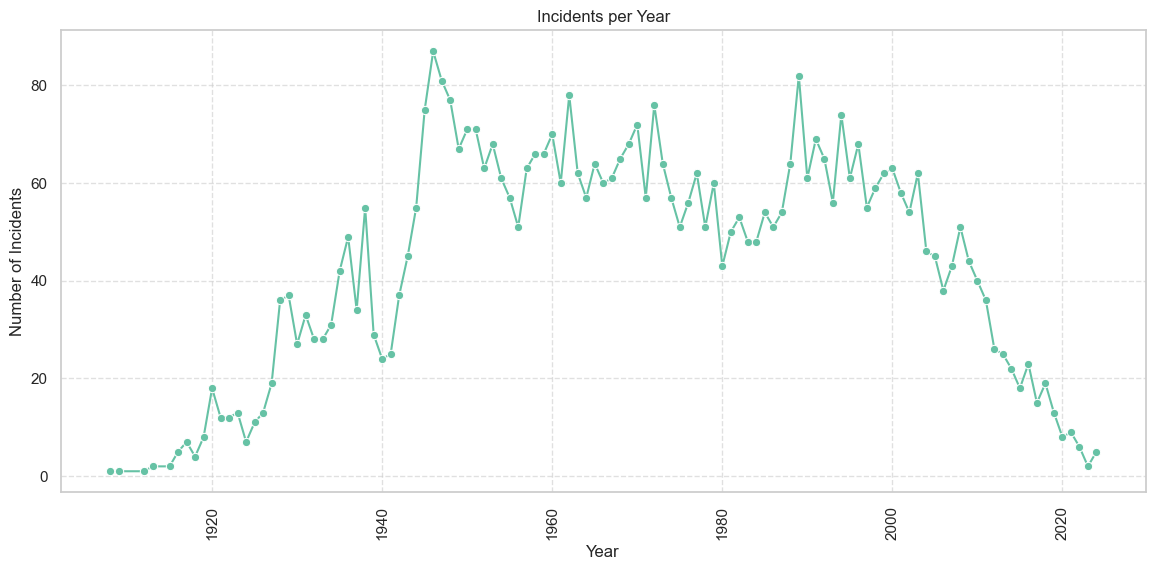

In [200]:
# 1. Incidents per Year
plt.figure(figsize=(14,6))
yearly_incidents = df['Year'].value_counts().sort_index().reset_index()
yearly_incidents.columns = ['Year', 'Incidents']

sns.lineplot(data=yearly_incidents, x='Year', y='Incidents', marker='o')
plt.title('Incidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)  # Show every year on x-axis
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_11556\1194709546.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_incidents, x='Month', y='Incidents', palette='Blues_d')


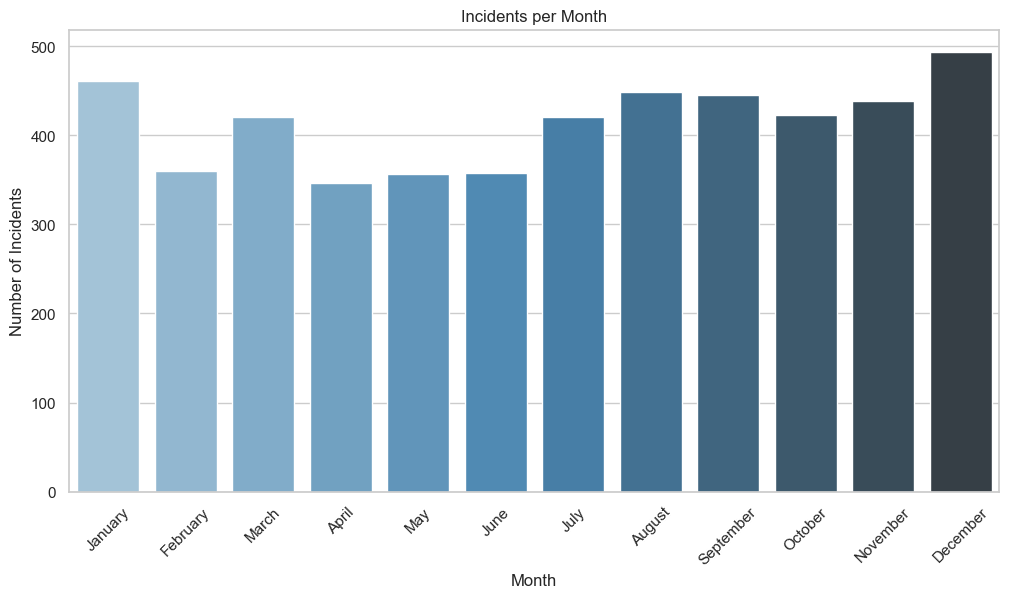

In [201]:
# 2. Incidents per Month
plt.figure(figsize=(12,6))

# Group by Month
monthly_incidents = df['Month'].value_counts().sort_index().reset_index()
monthly_incidents.columns = ['Month', 'Incidents']

# Map month numbers to names
import calendar
monthly_incidents['Month'] = monthly_incidents['Month'].apply(lambda x: calendar.month_name[int(x)])

# Ensure correct order Jan → Dec
monthly_incidents['Month'] = pd.Categorical(
    monthly_incidents['Month'],
    categories=list(calendar.month_name)[1:],  # skip empty '' at index 0
    ordered=True
)
monthly_incidents = monthly_incidents.sort_values('Month')

# Plot
sns.barplot(data=monthly_incidents, x='Month', y='Incidents', palette='Blues_d')
plt.title('Incidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()


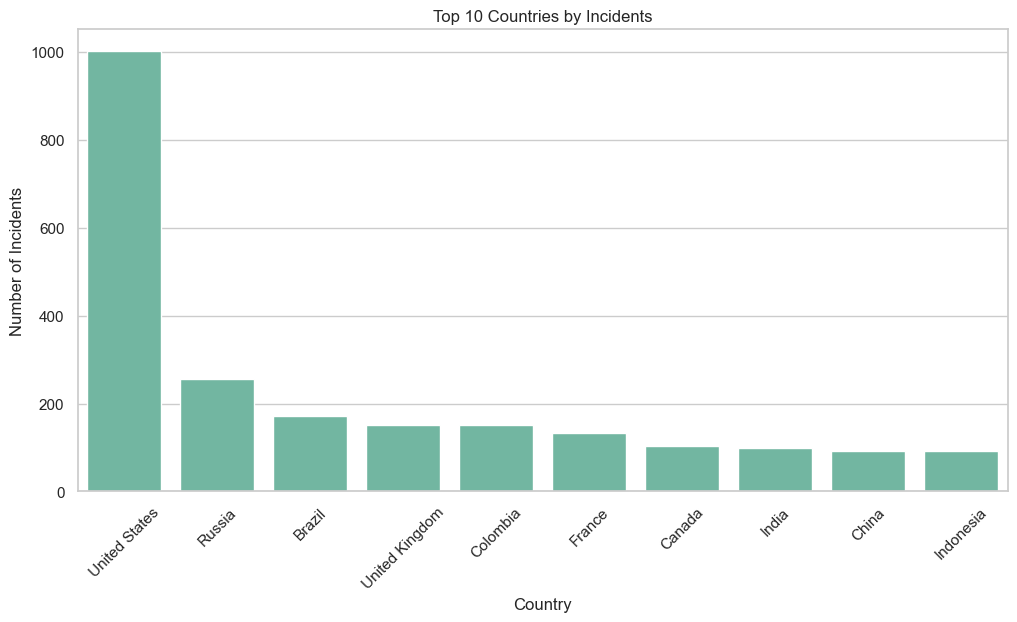

In [202]:
# 3. Top 10 Countries by Incidents
plt.figure(figsize=(12,6))
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries by Incidents')
plt.xlabel('Country')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

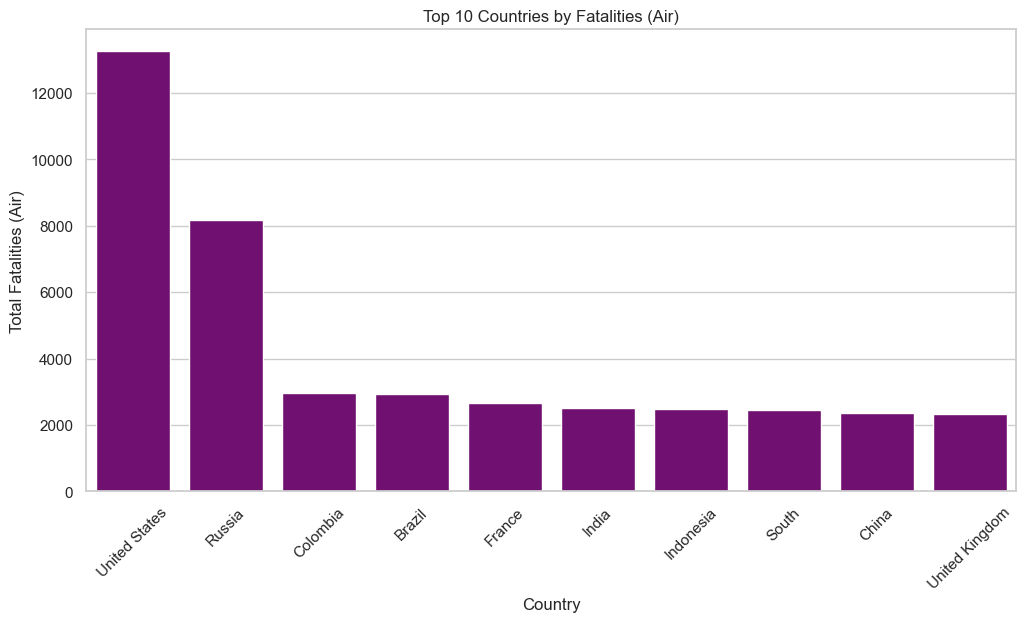

In [203]:
# 4. Top 10 Countries by Fatalities (Air)
plt.figure(figsize=(12,6))
top_countries_fatalities = df.groupby('Country')['Fatalities (Air)'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_countries_fatalities.index, y=top_countries_fatalities.values, color='purple')  #
plt.title('Top 10 Countries by Fatalities (Air)')
plt.xlabel('Country')
plt.ylabel('Total Fatalities (Air)')
plt.xticks(rotation=45)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_11556\2163645725.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Operator Category', data=df, order=df['Operator Category'].value_counts().index, palette='Set1')


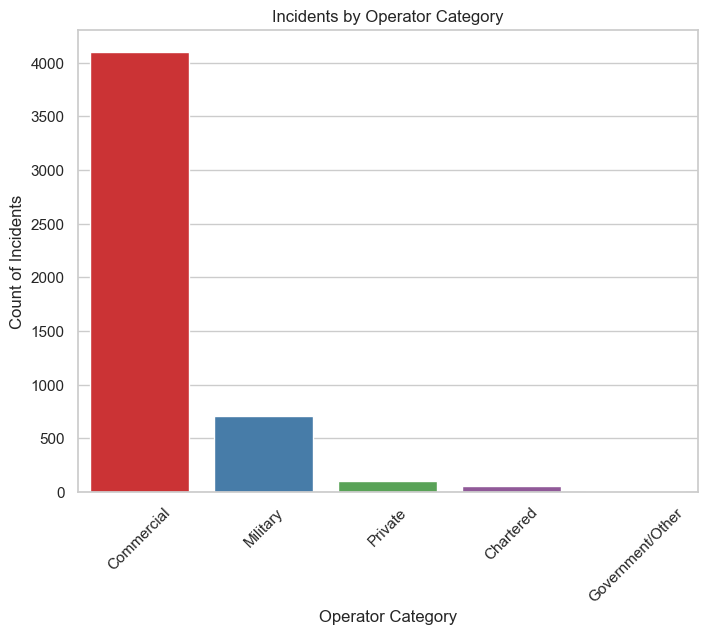

In [204]:
# 5. Operator Category (Commercial vs Military vs Others)
plt.figure(figsize=(8,6))
sns.countplot(x='Operator Category', data=df, order=df['Operator Category'].value_counts().index, palette='Set1')
plt.title('Incidents by Operator Category')
plt.xlabel('Operator Category')
plt.ylabel('Count of Incidents')
plt.xticks(rotation=45)
plt.show()

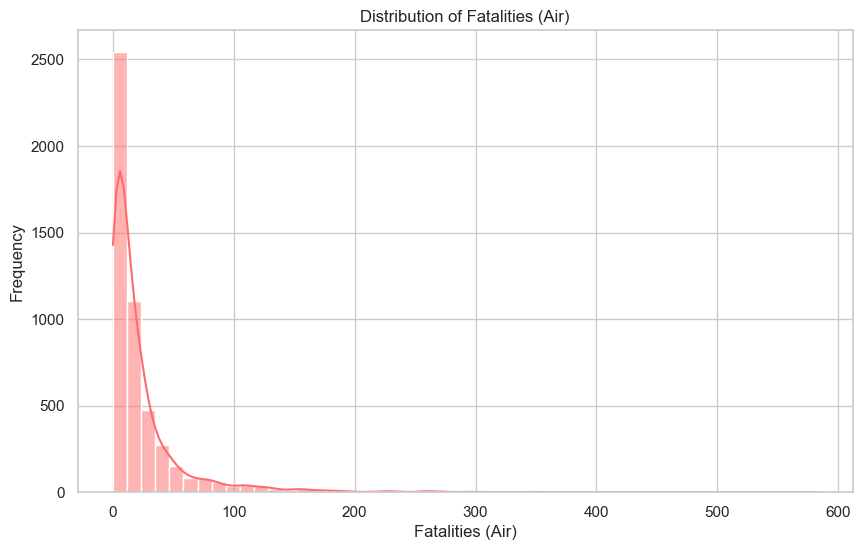

In [205]:
# 6. Distribution of Fatalities (Air)
plt.figure(figsize=(10,6))
sns.histplot(df['Fatalities (Air)'], bins=50, kde=True, color='#FF6B6B')  # Light red
plt.title('Distribution of Fatalities (Air)')
plt.xlabel('Fatalities (Air)')
plt.ylabel('Frequency')
plt.show()

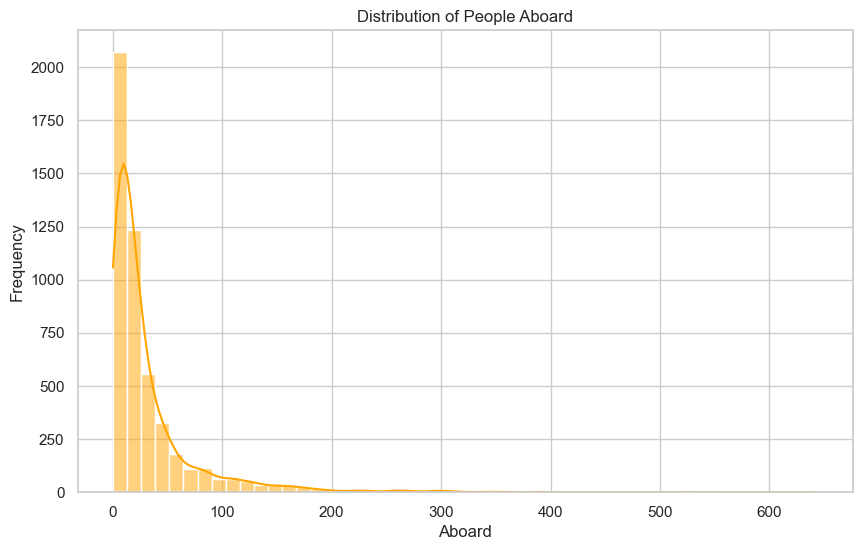

In [206]:
# 7. Distribution of Aboard
plt.figure(figsize=(10,6))
sns.histplot(df['Aboard'], bins=50, kde=True, color='orange')
plt.title('Distribution of People Aboard')
plt.xlabel('Aboard')
plt.ylabel('Frequency')
plt.show()

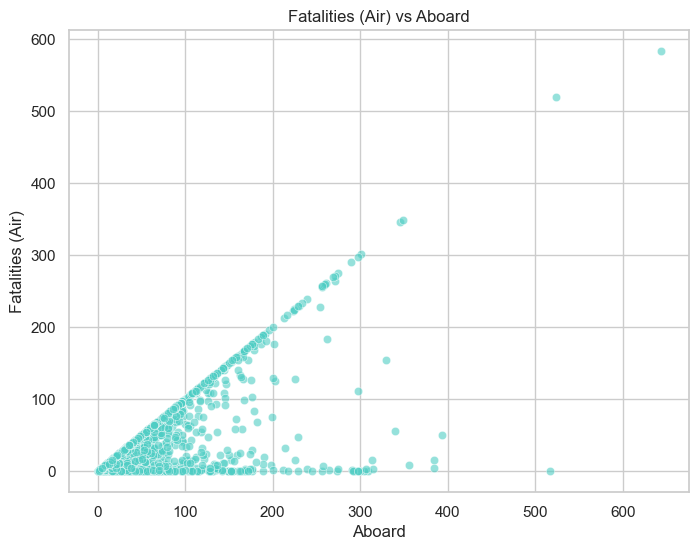

In [207]:
# 8. Fatalities vs Aboard (Correlation)
plt.figure(figsize=(8,6))
sns.scatterplot(x='Aboard', y='Fatalities (Air)', data=df, alpha=0.6, color='#4ECDC4')  
plt.title('Fatalities (Air) vs Aboard')
plt.xlabel('Aboard')
plt.ylabel('Fatalities (Air)')
plt.show()

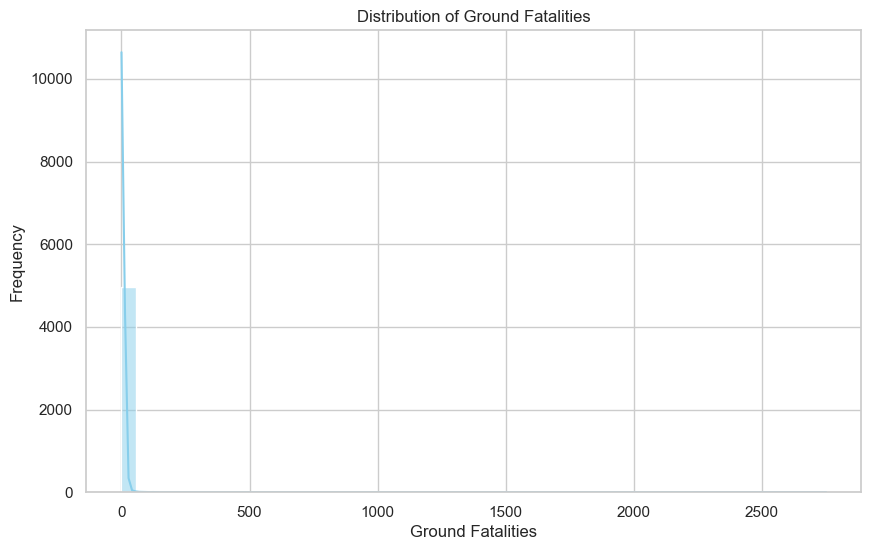

In [208]:
# 9. Ground Fatalities Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Ground'], bins=50, kde=True, color='skyblue', line_kws={'color': 'red'})
plt.title('Distribution of Ground Fatalities')
plt.xlabel('Ground Fatalities')
plt.ylabel('Frequency')
plt.show()

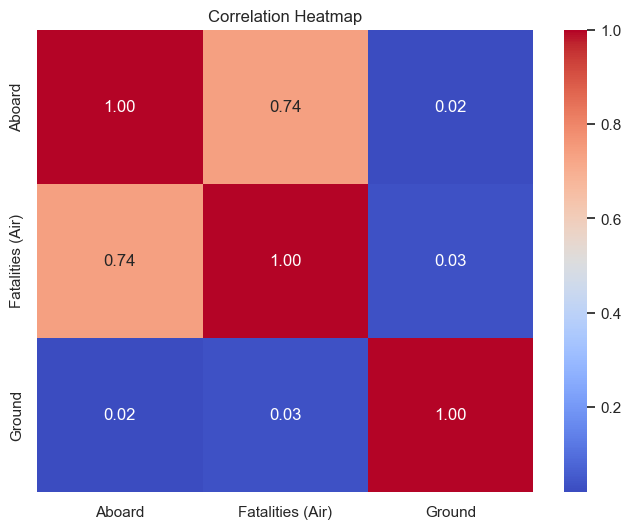

In [209]:
# 10. Correlation Heatmap (Numerical Columns)
plt.figure(figsize=(8,6))
sns.heatmap(df[['Aboard','Fatalities (Air)','Ground']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_11556\1801104284.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="viridis")


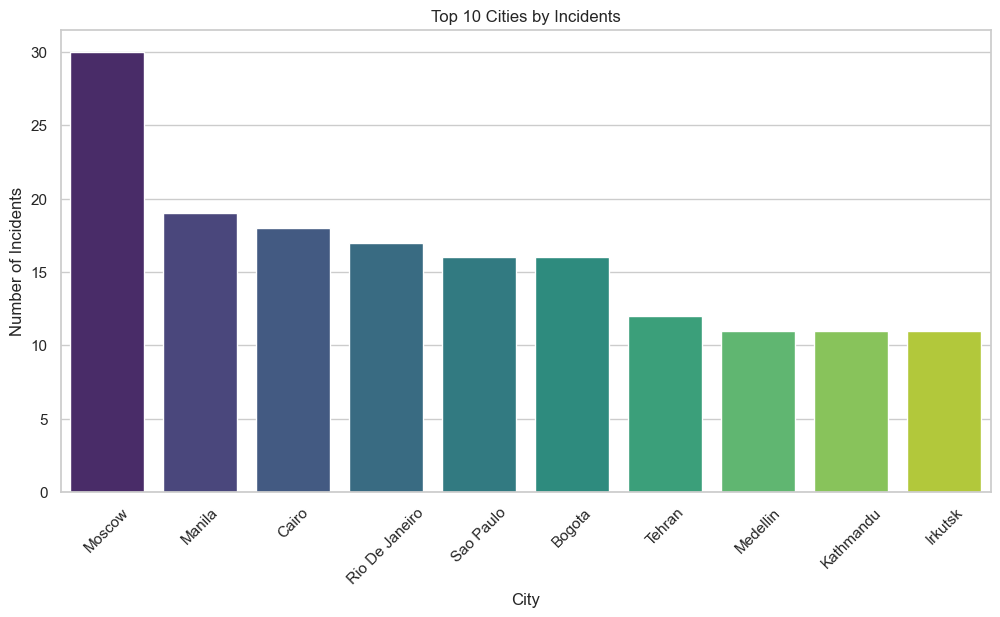

In [210]:
# 11. Top 10 Cities by Incidents
plt.figure(figsize=(12,6))
top_cities = df['City'].value_counts().head(10)
sns.barplot(x=top_cities.index, y=top_cities.values, palette="viridis")
plt.title('Top 10 Cities by Incidents')
plt.xlabel('City')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_11556\2114567474.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.index, y=top_regions.values, palette="rocket")


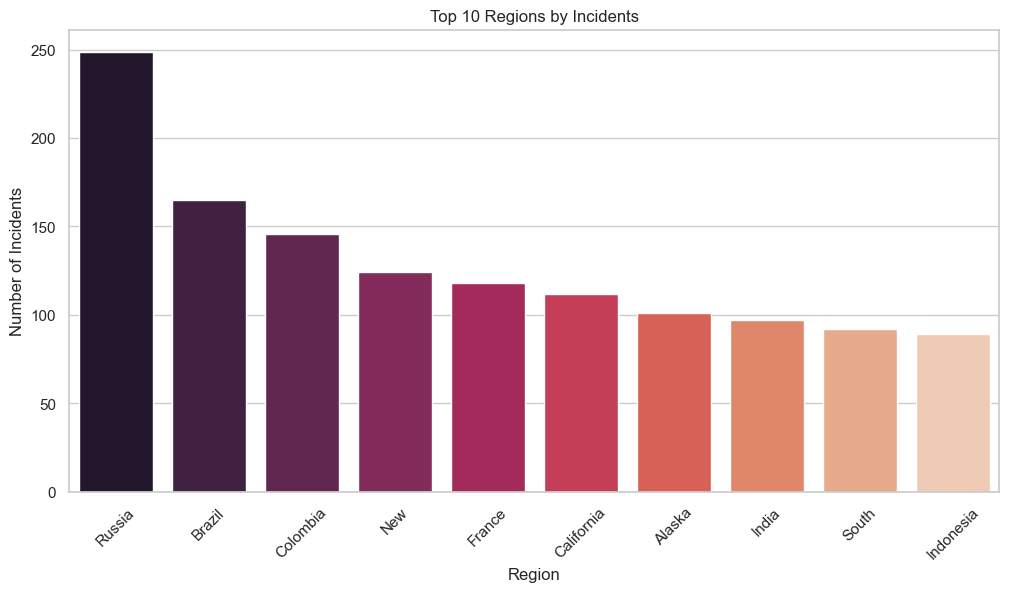

In [211]:
# 12. Top 10 Regions by Incidents
plt.figure(figsize=(12,6))
top_regions = df['Region'].value_counts().head(10)
sns.barplot(x=top_regions.index, y=top_regions.values, palette="rocket")
plt.title('Top 10 Regions by Incidents')
plt.xlabel('Region')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_11556\459065975.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_operators.index, y=top_operators.values, palette="mako")


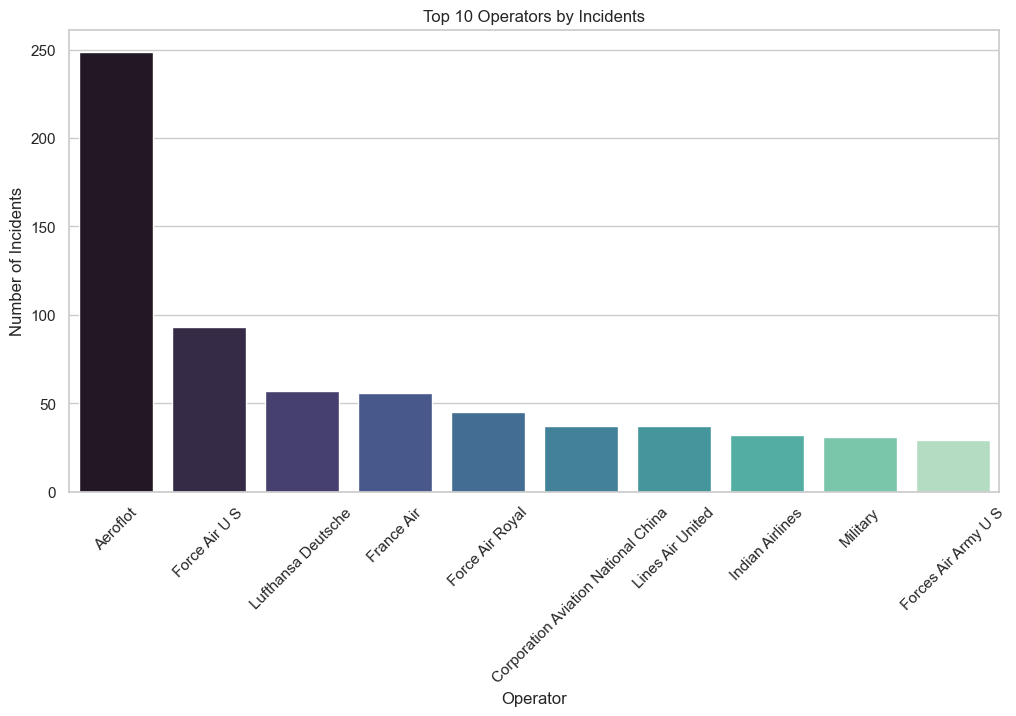

In [212]:
# 13. Top 10 Operators by Incidents
plt.figure(figsize=(12,6))
top_operators = df['Operator'].value_counts().head(10)
sns.barplot(x=top_operators.index, y=top_operators.values, palette="mako")
plt.title('Top 10 Operators by Incidents')
plt.xlabel('Operator')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

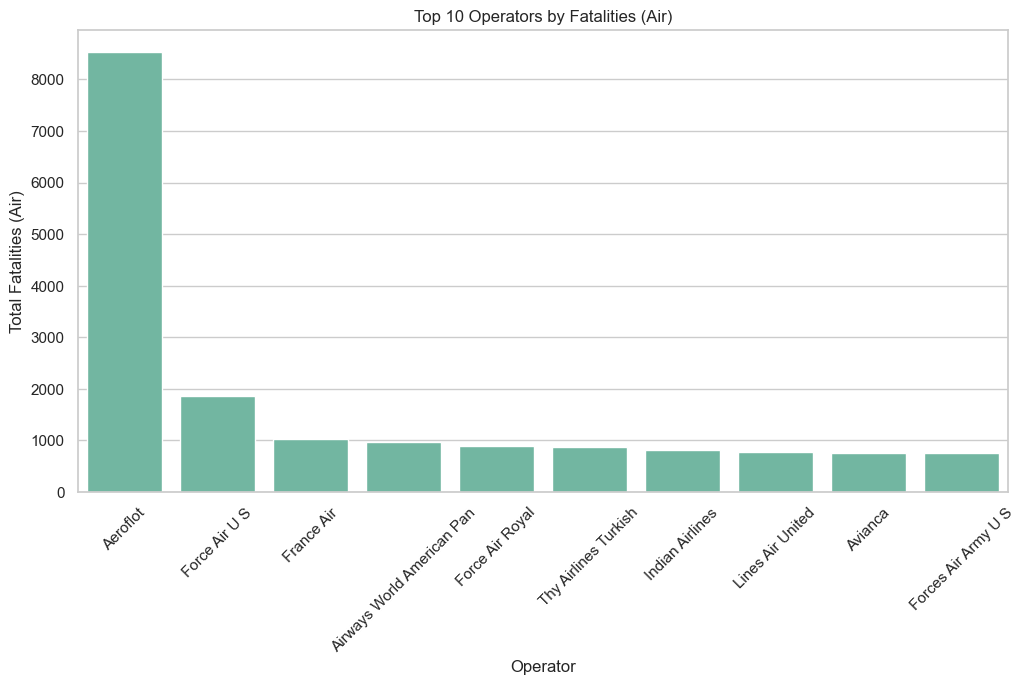

In [213]:
# 14. Top 10 Operators by Fatalities (Air)
plt.figure(figsize=(12,6))
top_operator_fatalities = df.groupby('Operator')['Fatalities (Air)'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_operator_fatalities.index, y=top_operator_fatalities.values)
plt.title('Top 10 Operators by Fatalities (Air)')
plt.xlabel('Operator')
plt.ylabel('Total Fatalities (Air)')
plt.xticks(rotation=45)
plt.show()

In [214]:
df.to_csv("cleaned_aircraft_incidents.csv", index=False)


In [215]:
df.columns

Index(['Year', 'Quarter', 'Month', 'Month Name', 'Day', 'Date', 'Day_of_Week',
       'Country', 'Region', 'City', 'Aircraft Manufacturer', 'Aircraft',
       'Operator', 'Operator Category', 'Aboard', 'Fatalities (Air)',
       'Ground'],
      dtype='object')

In [1]:
df["Year"]

NameError: name 'df' is not defined